# Questions to ask

Probably we should undersample the min_revenues column, and as well, find out, if there are so many companies with revenues, why didn't they raise?? how could we answer this question? the 99% remaining raised money

Should a model be created for companies that raised on a that want to raise on b, and for those that raised on a and b, that want to raise on c?

Is less employees bad, average, good, so that we applie an ordinal encoder?

Should remove names and id's?

# Beginning

In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


In [26]:
# Use this cell to regroup all your imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config; set_config(display='diagram')

In [27]:
from scipy import stats

# sklearn preproc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import make_scorer

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

In [28]:
path_crunch = '../raw_data/crunchbase.csv'

In [29]:
crunch = pd.read_csv(path_crunch)

/var/folders/fg/0mh3ddwn6ls4kf4146hxrxb00000gn/T/ipykernel_12404/3822556600.py:1: DtypeWarning: Columns (4,11,16,17,18,30,31,32,33,36,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  crunch = pd.read_csv(path_crunch)


# FILTERED ALL DF TO KEEP VALUES THAT WERE SCRAPED

There are 136311 values that are == True. Two cells below we see that there are 175103 nan values

In [30]:
crunch = crunch[crunch['scraped']==True]

In [31]:
crunch.columns

Index(['_id', 'acquisitions', 'category', 'country_code', 'crunchbase_rank',
       'descriptions.long', 'descriptions.short', 'email', 'employee_range',
       'employees', 'industries', 'investors', 'legal_name', 'min_revenues',
       'name', 'phone', 'salesforce_id', 'scraped', 'scraped_light', 'series',
       'series.angel', 'series.convertible_note', 'series.corporate_round',
       'series.debt_financing', 'series.equity_crowdfunding', 'series.grant',
       'series.initial_coin_offering', 'series.non_equity_assistance',
       'series.post_ipo_debt', 'series.post_ipo_equity', 'series.pre_seed',
       'series.private_equity', 'series.secondary_market', 'series.seed',
       'series.series_a', 'series.series_b', 'series.series_c',
       'series.series_d', 'series.series_e', 'series.series_f',
       'series.series_g', 'series.series_h', 'series.series_unknown',
       'series.total', 'series.undisclosed', 'socials.facebook',
       'socials.linkedin', 'socials.twitter', 'techs

# DROPPED COLUMNS I DON'T NEED

In [32]:
crunch = crunch[['_id', 'country_code', 'employee_range', 
                 'industries', 'investors', 'min_revenues', 'series.total', 'traffic.monthly']]

In [33]:
crunch.columns

Index(['_id', 'country_code', 'employee_range', 'industries', 'investors',
       'min_revenues', 'series.total', 'traffic.monthly'],
      dtype='object')

# CLEANED INDUSTRIES & TRANSFORMED IT IN A LIST
But i will see how i will put the transformed industries in a set

### In the following i replace all nan values for '[]' , since i can't extract nan's and it will give me an error
However, since i am already extracting values within a '[]' i can replace the nan's by that

<B>I WILL SEE IF I CAN FILTER AND REMOVE ALL NANS, INSTEAD OF REPLACING LIKE IN THE FOLLOWING CELL

In [34]:
crunch.industries.isna().value_counts()

False    134787
True       1524
Name: industries, dtype: int64

25 companies that has no info on industries, raised, that i am not taking into account

In [35]:
crunch[crunch.industries.isna()]['series.total'].isna().value_counts()


True     1499
False      25
Name: series.total, dtype: int64

In [36]:
crunch = crunch[crunch['industries'].notna()]

<b> NOW crunch BECAME WHERE INDUSTRIES HAD ZERO NAN'S

In [37]:
extract_dict = lambda row: [lines['name'] for lines in json.loads(row)]

In [38]:
crunch['industries_list']= crunch['industries'].apply(extract_dict)

In [39]:
crunch

,_id,country_code,employee_range,industries,investors,min_revenues,series.total,traffic.monthly,industries_list
0,ca17699b-2f49-91f4-5863-7216fc07a64e,gb,"[501,1000]","[{""_id"":""ae5718dc-8602-c733-e62b-28e6167091ad""...","[{""_id"":""48b6b97e-e5ec-a6d6-1cb0-5d3f74b3f9cd""...",NaN,2.227000e+08,20525524.0,"[Finance, Financial Services, FinTech, Marketp..."
1,792dcc41-3650-4496-68ba-481f52ccd99e,gb,"[11,50]","[{""_id"":""99c5404c-0ff5-8ee5-d334-4b944ddb8cd9""...","[{""_id"":""f5b59f45-3dae-1fb6-4a8a-32388e5d6a45""...",NaN,3.824077e+07,709.0,"[Analytics, Artificial Intelligence, Asset Man..."
2,35d239af-cf06-4f04-9387-64a079b641cd,gb,"[501,1000]","[{""_id"":""275ddcbc-27de-ff4f-4e50-6dc26ebf9570""...","[{""_id"":""8b8d96f8-9dfe-b27a-8f57-7d266a051dc9""...",NaN,2.617301e+08,7464935.0,"[E-Commerce, Fitness, Lifestyle, Retail, Sport..."
3,bb06c586-aac4-4657-39d1-1e428f3f08da,gb,"[101,250]","[{""_id"":""68250c3a-6cf5-86fb-281e-9072ae2d4fe8""...","[{""_id"":""a42ecb7f-c057-5a3d-ee4a-690ba8133013""...",NaN,6.986406e+07,210454.0,"[Banking, Finance, Financial Services, FinTech]"
4,99c2b07b-bbf5-dcac-f768-7b905e940c0e,gb,"[251,500]","[{""_id"":""16ad1d6c-c7ee-b6b5-701d-32c79a19dfae""...","[{""_id"":""c3cffb5d-9b45-d78e-3688-65926897f259""...",NaN,1.142175e+09,95169.0,"[Biopharma, Biotechnology, Genetics, Health Di..."
...,...,...,...,...,...,...,...,...,...
311409,a70808ad-93c0-4ad2-b859-699a25c79ed8,it,"[1,10]","[{""_id"":""ad091ee0-0259-f129-7777-10f65213584d""...",NaN,0.0,NaN,NaN,"[Accounting, Consulting, Legal]"
311410,c3bc2993-9072-419e-99a3-08d51802dfc5,it,"[1,10]","[{""_id"":""e362ac36-2e59-c58d-08fe-e5c45f13bc64""...",NaN,NaN,NaN,NaN,"[Graphic Design, Marketing, Web Development]"
311411,8c003064-a0f0-4d79-9ddc-46854a957894,it,"[11,50]","[{""_id"":""9b7bff94-c36c-b8d4-8789-69670454fe84""...",NaN,1000000.0,NaN,NaN,"[Direct Marketing, Marketing]"
311412,1bab4fea-ea50-4bc1-a28a-91d6de49f921,it,"[1,10]","[{""_id"":""d29852ab-4bbf-95f5-6087-563ff127de71""...",NaN,NaN,NaN,NaN,"[Brand Marketing, Personal Branding]"


## NOW THE TURN FOR INVESTORS

Before i replaced investors, now will remove all nans

AS FOLLOWS, THERE ARE SOME PLACES WHERE THERE ARE NO INVESTORS, HOWEVER 432 COMPANIES RAISED, SO HOW DID THEY DO THAT, WITH WHOM?

In [40]:
crunch[crunch['investors'].isna()]['series.total'].notna().value_counts()

False    130961
True        432
Name: series.total, dtype: int64

AND FROM INVESTORS WHERE THERE ARE VALUES, THERE IS THE SAME AMOUNT OF RAISED, TOTAL OF 3394 COMPANIES

In [41]:
crunch[crunch['investors'].notna()]['series.total'].notna().value_counts()

True    3394
Name: series.total, dtype: int64

REPLACE IN THE FOLLOWING BY 'NO INDUSTRIES YET' INSTEAD OF '[]'

In [42]:
crunch['investors'].replace(np.nan, '[]', inplace=True)


In [43]:
crunch['investors_list']= crunch['investors'].apply(extract_dict)

In [44]:
crunch.head()

,_id,country_code,employee_range,industries,investors,min_revenues,series.total,traffic.monthly,industries_list,investors_list
0,ca17699b-2f49-91f4-5863-7216fc07a64e,gb,"[501,1000]","[{""_id"":""ae5718dc-8602-c733-e62b-28e6167091ad""...","[{""_id"":""48b6b97e-e5ec-a6d6-1cb0-5d3f74b3f9cd""...",NaN,2.227000e+08,20525524.0,"[Finance, Financial Services, FinTech, Marketp...","[Cubit Investments, BRM Capital, Spark Capital..."
1,792dcc41-3650-4496-68ba-481f52ccd99e,gb,"[11,50]","[{""_id"":""99c5404c-0ff5-8ee5-d334-4b944ddb8cd9""...","[{""_id"":""f5b59f45-3dae-1fb6-4a8a-32388e5d6a45""...",NaN,3.824077e+07,709.0,"[Analytics, Artificial Intelligence, Asset Man...","[Parkwalk Advisors, Techstars, Global Brain Co..."
2,35d239af-cf06-4f04-9387-64a079b641cd,gb,"[501,1000]","[{""_id"":""275ddcbc-27de-ff4f-4e50-6dc26ebf9570""...","[{""_id"":""8b8d96f8-9dfe-b27a-8f57-7d266a051dc9""...",NaN,2.617301e+08,7464935.0,"[E-Commerce, Fitness, Lifestyle, Retail, Sport...",[General Atlantic]
3,bb06c586-aac4-4657-39d1-1e428f3f08da,gb,"[101,250]","[{""_id"":""68250c3a-6cf5-86fb-281e-9072ae2d4fe8""...","[{""_id"":""a42ecb7f-c057-5a3d-ee4a-690ba8133013""...",NaN,6.986406e+07,210454.0,"[Banking, Finance, Financial Services, FinTech]","[Oxford Capital Partners, Samos Investments, E..."
4,99c2b07b-bbf5-dcac-f768-7b905e940c0e,gb,"[251,500]","[{""_id"":""16ad1d6c-c7ee-b6b5-701d-32c79a19dfae""...","[{""_id"":""c3cffb5d-9b45-d78e-3688-65926897f259""...",NaN,1.142175e+09,95169.0,"[Biopharma, Biotechnology, Genetics, Health Di...","[IP Group Plc, Lansdowne Partners, Invesco, Il..."


In [45]:
crunch['investors_list']

0         [Cubit Investments, BRM Capital, Spark Capital...
1         [Parkwalk Advisors, Techstars, Global Brain Co...
2                                        [General Atlantic]
3         [Oxford Capital Partners, Samos Investments, E...
4         [IP Group Plc, Lansdowne Partners, Invesco, Il...
                                ...                        
311409                                                   []
311410                                                   []
311411                                                   []
311412                                                   []
311413                                                   []
Name: investors_list, Length: 134787, dtype: object

In [46]:
complete_list_of_investors = []

In [47]:
for index, list_investors in enumerate(crunch['investors_list']): 
    for investor in list_investors:
        complete_list_of_investors.append(investor)

In [48]:
len(complete_list_of_investors)

14288

In [49]:
set_investors = set(complete_list_of_investors)

In [50]:
len(set_investors)

5506

In [51]:
set_investors

{'Rainfall Ventures',
 'Techstars Allied Space Accelerator',
 'TRINE',
 'Tommy Ahlers',
 'Bristol Private Equity Club',
 'Richard Reed',
 'Wayne Churchill',
 'Volta Global',
 'HSBC Bank',
 'Shell Trading International',
 'Nick Hynes',
 'Adventum offshore',
 'Longwall Venture Partners',
 'Ariane De Rothschild',
 'ENGIE',
 'Ilona Simpson',
 'Jeremy Helsby',
 'Valar Ventures',
 'Nissay Capital',
 'Concentric',
 'François Derbaix',
 'Panakes Partners',
 'Stephen Grabiner',
 'Arran Speirs',
 'iEurope Capital',
 "L'Oreal",
 'Tom Singh',
 'National Institute for Health Research',
 'Enterprise Angels',
 'Darrin Disley',
 'Victor Belogub',
 'DIFC FinTech Hive',
 'Andreas Mihalovits',
 'Charity Bank',
 'Starling Ventures',
 'Rhodium',
 'Motive Partners',
 'MacPaw',
 'Seamus Keating',
 'SungWon Ha',
 'Ventech',
 'Leigh Phillipson',
 'Daniel Masters',
 'Yandex',
 'Melissa Morris',
 'Wheatsheaf Group',
 'New Zealand Venture Investment Fund',
 'Nathalie Gaveau',
 'DSW Ventures',
 'Rasmus Wolff',
 'L

In [575]:
inv_01_dict

{'Venture capital firms': ['Delta-v Capital',
  'Matchstick Ventures',
  'SFC Capital',
  'Twenty Ten Capital',
  'Alliance Venture',
  'Lerer Hippeau',
  'Skip Capital',
  'Tally Capital',
  'General Catalyst',
  'Oreilly AlphaTech Ventures',
  'Tribeca Early Stage Partners',
  'Ignition Partners',
  'R/GA IoT Venture Studio UK',
  'J&T VENTURES',
  'MMC Ventures',
  'BSH Future Home Accelerator Powered by Techstars',
  'Abb Technology Ventures',
  'Park Vale Capital',
  'Scale Venture Partners',
  'NEON Adventures',
  'MathCapital',
  'One Peak Partners',
  'Belltown Ventures',
  'Pollen Street Capital',
  'High-Tech Grunderfonds',
  'Luminor Capital',
  'Kureha Corporation'],
 'Private equity firms': ['Behemoth'],
 'Angel investors': ['Wayne Churchill',
  'Kamal Kirpalani',
  'Lisa Stone',
  'Benjamin Grol',
  'Calum Smeaton',
  'Iain McDonald',
  'Lucas London',
  'Eytan Elbaz',
  'Nicolai Thomson',
  'Anthony Citrano',
  'David Cantu',
  'Peter Rading',
  'Nachi Muthu',
  'Andrew 

In [574]:
inv_01_dict = {
    'Venture capital firms': ['Delta-v Capital', 'Matchstick Ventures', 'SFC Capital', 'Twenty Ten Capital', 'Alliance Venture', 'Lerer Hippeau', 'Skip Capital', 'Tally Capital', 'General Catalyst', 'Oreilly AlphaTech Ventures', 'Tribeca Early Stage Partners', 'Ignition Partners', 'R/GA IoT Venture Studio UK', 'J&T VENTURES', 'MMC Ventures', 'BSH Future Home Accelerator Powered by Techstars', 'Abb Technology Ventures', 'Park Vale Capital', 'Scale Venture Partners', 'NEON Adventures', 'MathCapital', 'One Peak Partners', 'Belltown Ventures', 'Pollen Street Capital', 'High-Tech Grunderfonds', 'Luminor Capital', 'Kureha Corporation'],
    'Private equity firms': ['Behemoth'],
    'Angel investors': ['Wayne Churchill', 'Kamal Kirpalani', 'Lisa Stone', 'Benjamin Grol', 'Calum Smeaton', 'Iain McDonald', 'Lucas London', 'Eytan Elbaz', 'Nicolai Thomson', 'Anthony Citrano', 'David Cantu', 'Peter Rading', 'Nachi Muthu', 'Andrew Diplock', 'Esther Dyson', 'Chris Slater', 'Oliver Jung', 'Alexander Fink', 'James Hind', 'Arnie Sriskandarajah', 'Nick Thomson', 'Dr. Somayeh Taheri', 'David Langer', 'Rob Jackson', 'Mike Jackson'],
    'Corporate venture capital': ['América Móvil', 'Bayer', 'Avnet', 'H&M CO:LAB', 'Grupo ItNet', 'PayU', 'VeriSign', 'Centrica'],
    'Family offices': ['Kendall Family Foundation', 'Invus', 'Henley Business Angels', 'bpd partners', 'UFP Fintech', 'LGT group', 'Mizuho Bank', 'AS Roma', 'Etagra Group', 'Alex Macdonald', 'John Yeomans', 'Alex Saint', 'Artemis Growth Partners', 'TRINE', 'G. K. Goh', 'Caisse de Depot et Placement du Quebec', 'Finn Capital Partners', 'Mercia Asset'],
    'Accelerators': ['Robotunion', 'Hepalink', 'Tech Nation Applied AI', 'WENVEST Capital'],
    'Government agencies': ['Kidney Research UK', 'Biotechnology and Biological Sciences Research Council', 'Statkraft'],
    'Foundations and non-profit organizations': []
}

In [579]:
inv_05_dict

{'Venture capital firms': ['Armada Ventures',
  'Octopus Investments',
  'SHIFT Invest',
  'Ardian',
  'Sapphire Ventures',
  'Bootstrap Europe',
  'Varadero European Special Opportunities',
  'ProVenture',
  'Le Studio VC',
  'Hinge Capital',
  'Portag3 Ventures',
  'Elephants & Ventures',
  'Marchmont Ventures',
  'Puma Private Equity',
  'Tate & Lyle Ventures',
  'Boxer Capital',
  'Deepbridge Capital',
  'Newfund Capital',
  'Startupbootcamp FinTech London',
  'Ballpark Ventures',
  'Axel Springer',
  'Alba Equity',
  'North-East Venture',
  'ICOS Capital Management',
  'Van Tuyl Group',
  'Souter Investments',
  'Rivers Capital Partners',
  'Actis',
  'C Ventures',
  'Greenfield One',
  'OMERS Ventures',
  'Trind Ventures',
  'Acies Ventures',
  '3Rodeo',
  'Williams Advanced Engineering',
  'DRÃ†M VENTURES',
  'March Capital',
  'StartersHub',
  'Seroba Life Sciences',
  'Fertitta Capital',
  'Maven Capital Partners',
  'British Business Investments',
  'Advance Venture Partners'

In [475]:
inv_02_dict = {
    "Angel investors": [
        "Matt Price", 
        "George Galanopoulos", 
        "Stephen Pankhurst", 
        "Geoff Dunnett", 
        "Diwaker Singh", 
        "Alwin Magimay", 
        "Joe DeSena", 
        "Sam Patel", 
        "Mark Denning", 
        "Rupert Loman", 
        "Jon Davidman", 
        "Sally Tennant", 
        "Matt Clifford", 
        "Florian Gschwandtner", 
        "Joe Perkins", 
        "Doug Barrowman", 
        "Nigel Knowles", 
        "Henry Chamberlain"
    ], 
    "Corporate investors": [
        "Amazon Alexa Fund", 
        "Keolis"
    ], 
    "Crowdfunding platforms": [
        "Crowdcube", 
        "Seedrs"
    ], 
    "Family offices": [
        "CHV Capital, Inc.", 
        "Earls Courtiers", 
        "Stroll", 
        "Anonymous Trust"
    ], 
    "Government agencies": [
        "United States Agency for International Development"
    ], 
    "Hedge funds": [
        "Monsas Ltd", 
        "Sabvest Limited"
    ], 
    "Incubators / Accelerators": [
        "Startupbootcamp", 
        "Barclays Accelerator, powered by Techstars - London", 
        "ESA Business Incubation Centre UK", 
        "Qualcomm Robotics Accelerator", 
        "Creative Destruction Lab", 
        "WebStart Bristol", 
        "BMW Innovation Lab", 
        "Startupbootcamp Digital Health Berlin", 
        "Singapore Tourism Accelerator", 
        "HG Ventures", 
        "Techstars Ventures"
    ], 
    "Institutional investors": [
        "Legal & General", 
        "Investcorp", 
        "Wharton Asset Management Company Limited", 
        "Neptune Investment Management", 
        "HGCapital Trust plc"
    ], 
    "Private equity firms": [
        "JRJ Group", 
        "Endeavour Vision", 
        "Lead Ventures", 
        "RedSeed Ventures", 
        "Axivate Capital", 
        "VentureBuilders Capital", 
        "Gilde IT Fund", 
        "Blackhawk Capital", 
        "Rho Capital Partners", 
        "Brainchild Holdings", 
        "MML Capital Partners", 
        "Octopus Labs", 
        "CRE Venture Capital", 
        "Top Technology Ventures"
    ], 
    "Venture capital firms": [
        "Sequoia Capital", 
        "Accel", 
        "Index Ventures", 
        "Balderton Capital", 
        "GV", 
        "Amadeus Capital Partners", 
        "Dawn Capital", 
        "Northzone", 
        "Atomico", 
        "Kima Ventures", 
        "Octopus Ventures", 
        "Beringea", 
        "Omnes Capital", 
        "MMC Ventures", 
        "DN Capital", 
        "Episode 1 Ventures", 
        "Seraphim Capital", 
        "Notion Capital", 
        "Downing Ventures", 
        "SOSV", 
        "Healthbox", 
        "Iris Capital", 
        "Lumia Capital", 
        "Frontline Ventures", 
        "BGF", 
        "AlbionVC", 
        "Draper Esprit", 
        "Global Founders Capital", 
        "Cherry Ventures", 
        "Kre"]

}

In [476]:
inv_03_dict = {
    "Venture capital firms": ["Sequoia Capital", "Accel Partners", "Greylock Partners"],
    "Private equity firms": ["Blackstone Group", "KKR", "Carlyle Group"],
    "Institutional investors": ["Fidelity Investments", "Vanguard Group", "BlackRock"],
    "Incubators / Accelerators": ["Y Combinator", "500 Startups", "Techstars"],
    "Hedge funds": ["Bridgewater Associates", "Renaissance Technologies", "Millennium Management"],
    "Government agencies": ["National Science Foundation", "Department of Energy", "National Institutes of Health"],
    "Family offices": ["Rockefeller Family Office", "Rothschild Family Office", "Du Pont Family Office"],
    "Crowdfunding platforms": ["Kickstarter", "Indiegogo", "GoFundMe"],
    "Corporate investors": ["Google Ventures", "Intel Capital", "Salesforce Ventures"],
    "Angel investors": ["Naval Ravikant", "Jason Calacanis", "Tim Ferriss"]
}


In [444]:
inv_04_dict = {
    'Seed Investors': ['Florian Jansen', 'Jesper Lindhardt', 'David Szekely', 'Henry Rouquairol', 'Vikrant Bhargava', 'Prue Leith', 'Kerry Ritz', 'Richard Taylor', 'Paul Pindar', 'Andrew Colin', 'Andrew Gaule', 'Mark Sebba', 'Daniel James', 'Luke Heron', 'Ashley Cooper', 'Tessa Dollar', 'Tony Jamous'],
    'Angel Investors': ['Simon Wilkinson', 'Mark Sherrington', 'Duncan Painter', 'Cameron Parry', 'Richard Chen', 'Julian Barnett', 'David Tabizel', 'Peter Simon', 'Carl Bauer', 'Nitin Singhal', 'David Evans', 'Rockley Group', 'Chris Ash', 'Andy Porteous', 'Demis Hassabis', 'Maximus Richardson', 'Blaine Vess', 'Robert Dobson', 'Daniel James', 'Luke Heron'],
    'Venture Capitalists': ['Oaktree Capital Management', 'Robert Bosch Venture Capital', 'Runa Capital', 'Outward VC', 'Longitude Capital', 'NCL Technology Ventures', 'Inveready', 'Atlas Venture', 'Trustbridge Partners', 'Maveron', 'Antin Infrastructure Partners', 'MetLife', 'Lionheart Ventures', 'GP Ventures', 'National Australia Bank', 'Baird Capital', 'White Rock Capital', 'MTI', 'Passion Capital', 'Plug and Play', 'Hewlett Packard Enterprise', 'TRPE Capital', 'S2G Ventures', 'Novak Biddle Venture Partners', 'La Famiglia', 'Techstars Berlin Accelerator', 'UCLB', 'SBI Asset Management', 'Startupbootcamp', 'Yabeo Capital', 'Investible', 'Blystad Group', 'Wesley Clover', 'Wisemont Capital', 'Reefknot Investments', 'AngelPad', 'WONIK Investment Partners', 'Squadron Venture Media', 'Qatar Investment Authority', 'Pfizer Venture Investments', 'Inovia Capital', 'Adcock Private Equity', 'Hone Capital', 'UltimateVC', 'GLI Finance', 'Boldstart Ventures'],
    'Private Equity Firms': ['Wharton Asset Management', 'Fox Investments', 'Francisco Partners', 'MacKinnon, Bennett & Company'],
    'Accelerator Programs': ['Techstars Dubai', 'Startup Braga', 'Hangar 51', 'Manchester Enterprise Centre'],
    'Corporate Investors': ['Microsoft', 'IBM', 'Virgin Media Accelerator', 'Sony Music Entertainment', 'British Gas', 'M&G Investments', 'The Royal Bank of Scotland', 'Deutsche Borse', 'Chicago Board Options Exchange'],
    'Government Organizations': ['East of England Development Agency', 'Carbon Trust'],
    'Investment Banks': ['Harper James Solicitors', 'International Investment & Underwriting Limited', 'Monsas Investment Bank'],
    'Family Offices': ['Giorgos Zacharia'],
    'Other Investors': ['Daman Investments', 'Simpleweb', '76 west Holdings', 'East Hill Advisors', 'Luc Van Malderen', 'Federico Pirzio-Biroli', 'Jonas Nordlander', 'IrishAngels', 'Gefen Capital', 'Ben Lin', 'Kite Ventures', 'Wallace...'],
    'Unknown Investor Type': ['David Haye', 'Ahmed Medhat', 'Wolf Hengst', 'Stephan Apel', 'Alexander Azarov', 'Gabriel Jarrosson', 'Robert Sansom']
}

In [445]:
inv_05_dict = {
    'Venture capital firms': ['Armada Ventures', 'Octopus Investments', 'SHIFT Invest', 'Ardian', 'Sapphire Ventures', 'Bootstrap Europe', 'Varadero European Special Opportunities', 'ProVenture', 'Le Studio VC', 'Hinge Capital', 'Portag3 Ventures', 'Elephants & Ventures', 'Marchmont Ventures', 'Puma Private Equity', 'Tate & Lyle Ventures', 'Boxer Capital', 'Deepbridge Capital', 'Newfund Capital', 'Startupbootcamp FinTech London', 'Ballpark Ventures', 'Axel Springer', 'Alba Equity', 'North-East Venture', 'ICOS Capital Management', 'Van Tuyl Group', 'Souter Investments', 'Rivers Capital Partners', 'Actis', 'C Ventures', 'Greenfield One', 'OMERS Ventures', 'Trind Ventures', 'Acies Ventures', '3Rodeo', 'Williams Advanced Engineering', 'DRÃ†M VENTURES', 'March Capital', 'StartersHub', 'Seroba Life Sciences', 'Fertitta Capital', 'Maven Capital Partners', 'British Business Investments', 'Advance Venture Partners', 'Refactor Capital', 'METRO Xcel', 'Sands Capital Ventures'], 
    'Private equity firms': ['Mahindra Partners', 'NatWest Markets', 'Mary Turner'], 
    'Institutional investors': ['IDO Investments', 'Noventi', 'ESM Investment Ltd', 'TELUS Ventures', 'RGAx', 'Luxembourg Stock Exchange'], 
    'Incubators / Accelerators': ['Fusion IP', 'UCD Michael Smurfit Graduate Business School', 'MDR LAB', 'Luxembourg Stock Exchange', 'StartersHub', 'iStarter'], 
    'Hedge funds': ['Chevron Technology Ventures', 'NatWest Markets', 'Deepbridge Capital', 'Souter Investments'], 
    'Government agencies': ['Sustainable Development Technology Canada', 'The National Endowment for the Arts', 'ESA Business Applications', 'British Business Investments'], 
    'Family offices': ['Michael Jackson', 'Rob Barnett', 'IDO Investments', 'Boris Dyakonov', 'Michael Stoddard', 'Mark Cowan', 'John Regan', 'Ian Noel', 'Thomas Balk', 'Donal Smith', 'Phillip Riese', 'Mark Sainsbury'], 
    'Crowdfunding platforms': ['IDO Investments'], 
    'Corporate investors': ['Nissha Co., Ltd.', 'Voice Punch', 'SABIC Ventures', 'American Express Ventures', 'TELUS Ventures', 'Barwell Plc', 'ADC Telecommunications'], 
    'Angel investors': ['J. Kim Fennell', 'Joeri van Geelen', 'Paul Roy', 'Charlotte Street Capital', 'Terry Leahy', 'Kevin Beales', 'Lorin Van Nuland', 'Albert László Barabasi', 'Gabbi Cahane', 'Christiaen van Lanschot', 'Barrow Cadbury Trust', 'Eamon Tuhami', 'Link Group', 'Mark Sainsbury', 'Elio Leoni Sc...']
}


In [446]:
inv_06_dict = {
    'Venture capital firms': [
        'London Seed Capital',
        'Growth Partner',
        'Space3ac',
        'The Mills Fabrica',
        'Blue Star Capital',
        'Breyer Capital',
        'Lombardstreet Ventures',
        'ETCapital',
        'Future Energy Ventures',
        'Piper Private Equity',
        'Cherry Ventures'
    ],
    'Private equity firms': [
        'ValueAct Capital',
        'Parafi Capital',
        'Rockshield Capital',
        'Knightsgate Ventures',
        'Compagnie Nationale à Portefeuille'
    ],
    'Institutional investors': [
        'QBE Ventures',
        'Ibex Investors',
        'Rupert Hambro',
        'BTG Pactual',
        'US Department of Energy',
        'Royal Society Enterprise Fund',
        'PAR Capital Management',
        'Khazanah Nasional'
    ],
    'Incubators / Accelerators': [
        'AI Seed',
        'Frontier IP Group plc',
        'Entrepreneur Venture',
        'ODI Startup Accelerator',
        'Startupbootcamp IoT London',
        'DIFC FinTech Hive',
        'Sussex Place Ventures'
    ],
    'Hedge funds': [
        'Tue Lumbye',
        'Kinesis Investment and Capital',
        'Robin Hill',
        'ArrowMark Partners'
    ],
    'Government agencies': [
        'Capability and Innovation Fund',
        'Northwest Regional Development Agency',
        'InnoSuisse',
        'Scottish Enterprise'
    ],
    'Family offices': [
        'Philip Roberts',
        'Fabio Mondini de Focatiis',
        'Francois Thomas',
        'Andreas Mihalovits',
        'Paul Harper',
        'Sabina Hegarty',
        'Robert W. Duggan',
        'Alto Invest',
        'Amadeo Brenninkmeijer',
        'Russel Coultart',
        'Lord David Alliance'
    ],
    'Crowdfunding platforms': [
        'Revolution',
        'Crowdcube',
        'Seedrs'
    ],
    'Corporate investors': [
        'BAE Systems',
        'Recruit',
        'BP Ventures',
        'Cisco Investments',
        'Samsung Catalyst Fund',
        '21st Century Fox',
        'Infineon Technologies'
    ],
    'Angel investors': [
        'Philip Roberts',
        'Adam Bird',
        'Ted Leonsis',
        'Benjamin Kong',
        'Soo Hoon Hauw',
        'Robin Farmanfarmaian',
        'Guy Johnson',
        'Bill Bungay',
        'Allan Gray',
        'Remy Minute',
        'Yannick Pons',
        'Jim Warwick',
        'Thomas Bucaille',
        'Elwin Capital Partners',
        'Riccardo Zacconi',
        'Gerard Buggy',
        'Matt Bellamy',
        'Matt Robinson',
        'Ian Marchant',
        'Eileen Burbidge',
        'Chris Jones'
    ]
}

In [447]:
inv_07_dict = {
  "Venture capital firms": [
    "Elkstone Capital Partners",
    "SIS Ventures",
    "Triple Point Ventures",
    "Technology Venture Capital",
    "Hubraum",
    "Beast Ventures",
    "A.M.E. Ventures",
    "CoCoon Ignite Ventures",
    "Quester Capital",
    "Binomial Ventures",
    "Maven 11 Capital",
    "Brightbridge Ventures",
    "NEO Ventures",
    "Grandbrook Ltd",
    "DSM Venturing",
    "DN Capital",
    "Next47",
    "SAATCHiNVEST",
    "Techstars Energy Accelerator in Partnership with Statoil",
    "Viola Growth",
    "Techstars Allied Space Accelerator",
    "Play Ventures",
    "PBX Innovations",
    "Quona Capital",
    "Janus Henderson Investors",
    "Maersk Growth",
    "Entrée Capital",
    "Bessemer Venture Partners",
    "InterGlobe Technology Quotient",
    "Growth Capital Ventures",
    "LC Partners",
    "Warburg Pincus",
    "O1ex",
    "3TS Capital Partners",
    "CloudScale Capital Partners",
    "Xeraya Capital",
    "Ahimsa Capital",
    "Archimedia",
    "SignalFire",
    "83North",
    "Department for Business, Energy and Industrial Strategy",
    "Larnabel Ventures",
    "A-Grade Investments",
    "Repair Impact Fund",
    "Sirius Venture Partners",
    "Future Tech Lab",
    "ff Venture Capital",
    "01Ventures",
    "Hamilton Lane",
    "Cornwall & Isles of Scilly Investment Fund",
    "Althelia Funds",
    "Ahren Innovation Capital",
    "Recruit Strategic Partners",
    "MAHR Projects",
    "A/O PropTech",
    "Vintage Investment Partners",
    "Baronsmead Venture Trusts",
    "Rain Lõhmus",
    "Wicklow Capital",
    "Fresco Capital",
    "Arcadis City of 2030 Accelerator, Powered by Techstars",
    "Investiere",
    "Raven Ventures Australia",
    "Tempus Partners",
    "Venrex Investment Management",
    "Longbow Capital",
    "JP Morgan",
    "Sesame Bankhall Group",
    "Autotech Ventures",
    "Gapminder VC",
    "Mark McCamish",
    "Santon Capital Plc",
    "HardGamma Ventures",
    "Hamiton Holdings",
    "ALSA Holdings",
    "4",
  ],
  "Private equity firms": [],
  "Institutional investors": [
    "Finance Yorkshire",
    "OPTrust Private Markets Group",
    "BNP Paribas Investment Partners",
    "Temasek Holdings",
    "Standard Chartered Bank",
    "JP Morgan",
    "U+I",
    "University of Oxford",
    "ST Telemedia",
  ],
  "Incubators / Accelerators": [
    "Nextlaw Labs",
    "Techstars Energy Accelerator in Partnership with Statoil",
    "Techstars Allied Space Accelerator",
    "Arcadis City of 2030 Accelerator, Powered by Techstars",
  ],
  "Hedge funds": [
    "Coatue",
    "Arrowgrass Capital",
  ],
  "Government agencies": [
    "Qatar Science & Technology Park",
    "Department for Business, Energy and Industrial Strategy",
  ],
  "Family offices": [
    "BillerudKorsnÃ¤s Venture"]
}

In [450]:
inv_08_dict = {
    'Venture capital firms': ['Highland Capital Partners', 'Angelrush Ventures', 'DTCP', 'Augmentum Fintech'],
    'Private equity firms': [],
    'Institutional investors': ['IDIA Capital Investissement', 'Kinetic Capital', 'Hard Yaka'],
    'Incubators / Accelerators': ['Almaworks', 'Pontaq', 'Vitamin London'],
    'Hedge funds': [],
    'Government agencies': [],
    'Family offices': [],
    'Crowdfunding platforms': [],
    'Corporate investors': [],
    'Angel investors': ['Ari Keşişoğlu', 'Tim Hugh', 'Marcin Kurc', 'Jason Weeks', 'Ibrahim SOUA', 'Errol Damelin', 'John Weiss', 'Duncan Grierson', "Hugh O'Driscoll", 'Andurance Ventures']
}


In [451]:
inv_09_dict = investors = {
    'Venture capital firms': [
        'Panakes Partners',
        'Fred Destin',
        'HCVC',
        'Eleven Ventures',
        'a16z crypto',
        'Tudor Investments',
        'RYSE Asset Management'
    ],
    'Private equity firms': [
        'Hargreave Hale'
    ],
    'Institutional investors': [
        'European regional development fund (ERDF)',
        'The Department of Energy & Climate Change (DECC)',
        'Greater Manchester Combined Authority',
        'Stanford University Venture Fund',
        'LGT Capital Partners',
        'Enterprise M3 Growth Fund',
        'SAGANA'
    ],
    'Incubators / Accelerators': [
        'Insurtech Gateway',
        'Digital Science'
    ],
    'Hedge funds': [
        'Pantera Capital',
        'Trilogy Ventures China',
        'Tudor Investments'
    ],
    'Government agencies': [
        'European regional development fund (ERDF)',
        'The Department of Energy & Climate Change (DECC)',
        'Greater Manchester Combined Authority'
    ],
    'Family offices': [
        'Robert Swain'
    ],
    'Crowdfunding platforms': [
        'BE Group'
    ],
    'Corporate investors': [
        'Andre Crawford-Brunt',
        'Declan Falvey',
        'Scrum Software',
        'O2h Ventures'
    ],
    'Angel investors': [
        'Touker Suleyman',
        'Karen Hanton',
        'Tariq Lingawi',
        'Ricardo Schaefer',
        'Ab Banerjee',
        'Freddy May',
        'Julie Silvester',
        'Ned Cranborne',
        'Amit Jhawar',
        'Guy Feld',
        'Giles Brook'
    ]
}


In [452]:
inv_10_dict = {
    "Venture capital firms": ["IDIA Capital Investissement", "Highland Capital Partners", "Angelrush Ventures", "DTCP", "Augmentum Fintech", "HCVC", "Trilogy Ventures China", "Eleven Ventures", "a16z crypto", "LGT Capital Partners", "Champion Hill Labs", "MVM Life Science Partners", "Spring Capital"],
    "Private equity firms": [],
    "Institutional investors": ["European regional development fund (ERDF)", "The Department of Energy & Climate Change (DECC)", "Greater Manchester Combined Authority", "Stanford University Venture Fund", "Enterprise M3 Growth Fund", "SAGANA"],
    "Incubators / Accelerators": ["Insurtech Gateway"],
    "Hedge funds": ["Tudor Investments"],
    "Government agencies": ["European regional development fund (ERDF)", "The Department of Energy & Climate Change (DECC)", "Greater Manchester Combined Authority", "Stanford University Venture Fund", "Enterprise M3 Growth Fund"],
    "Family offices": ["Touker Suleyman", "Hargreave"]
}

In [473]:
inv_11_dict = {
    'Venture capital firms': ['Panakes Partners', 'Fred Destin', 'SI² Fund', 'Trilogy Ventures China', 'Eleven Ventures', 'Hillhouse Capital Group', 'a16z crypto', 'LGT Capital Partners', 'Tudor Investments', 'Enterprise M3 Growth Fund', 'SAGANA', 'O2h Ventures', 'RYSE Asset Management', 'Innova Kapital', 'Valo Ventures'],
    'Private equity firms': ['Hargreave Hale'],
    'Institutional investors': ['European regional development fund (ERDF)', 'The Department of Energy & Climate Change (DECC)', 'Greater Manchester Combined Authority', 'Stanford University Venture Fund', 'BE Group'],
    'Incubators / Accelerators': ['Insurtech Gateway', 'Digital Science', 'Scrum Software'],
    'Hedge funds': ['HCVC'],
    'Government agencies': [],
    'Family offices': ['Louis Beryl', 'Declan Falvey', 'Freddy May', 'Robert Swain', 'Julie Silvester', 'Giles Brook'],
    'Crowdfunding platforms': [],
    'Corporate investors': [],
    'Angel investors': ['Voria Fattahi','Touker Suleyman', 'Karen Hanton', 'Christian Edler', 'Ricardo Schaefer', 'Ab Banerjee', 'Faber', 'Ned Cranborne', 'Amit Jhawar', 'Guy Feld']
}


In [467]:
inv_12_dict = {
    'Venture capital firms': ['TTV Capital', 'DHVC', 'Contriber Ventures', 'DFJ Growth', 'Run Capital Investment Fund', 'KIZOO Technology Capital', '5AM Ventures', 'Inventure', 'Nextech Invest', 'Radius Ventures', 'Susa Ventures', 'Angular Ventures', '1818 Venture Capital', 'Zetta Venture Partners', 'Antler', 'Samos Investments', 'IFG.VC', 'DC Thomson Ventures', 'Universe Capital Partners'],
    'Private equity firms': ['Business Growth Fund', 'OakNorth Bank', 'BlackPine', 'Waterfall Asset Management', 'Thames Trust', 'Pentland Ventures', 'Avenue Capital Group'],
    'Institutional investors': ['APG Asset Management', 'Radius Ventures', 'Industry Ventures', 'HB Investments', 'RPMI Railpen', 'Vertex Ventures HC', 'Hyperion Insurance Group', 'Aviva Group', 'UIL Limited', 'CITIC Securities', 'Valence Media', 'Royal Academy of Engineering', 'Guardian Media Group'],
    'Incubators / Accelerators': ['Seedcamp', 'Sputnik ATX', 'Techstars Adelaide Accelerator', 'Bloomberg Beta', 'SparkLabs Accelerator'],
    'Hedge funds': ['Meltwind Advisory'],
    'Government agencies': ['Digital News Initiative Innovation Fund', 'Fair By Design Fund', 'The Social Entrepreneurs Fund (TSEF)', 'Scottish Investment Bank', 'Capital Cell'],
    'Family offices': ['Ilia Perekopsky', 'Chester Investments', 'Kirby Winfield', 'Andrew Black', 'Patrick Barwise', 'Richard Fearn', 'Lloyd Amsdon', 'Nick Mason', 'Charlie Kemper', 'Alister Jordan', 'Marco Starace', 'Peter Keen', 'Anthony Bourne'],
    'Crowdfunding platforms': ['Global Top Round', 'Potential VC'],
    'Corporate investors': ['Celgene', 'Advent Venture Partners', 'Aviva Ventures', 'Illumina', 'JLL Spark', 'Toyota Tsusho', 'Honeywell Capital Management', 'Ascential Plc', 'Mediqventures'],
    'Angel investors': ['CyberSmart Angels', 'Mark Risher', 'Peter Bazalgette', 'Stephane Kurgan', 'Michael Lynton', 'Mark Davies', 'James B Gambrell', 'Derek Lovelock', 'Robert Swann', 'Deborah Quazzo', 'Cross Atlantic Capital Partners', 'David Rowan', 'Phillip Morley', 'Sam Kingston', 'Adrian Lloyd', 'Future Care Capital', 'Nikolay Logachev', 'BaseKit', 'Paul Nikkel', 'Marcus Segal', 'Charles Black', 'David Collins', 'Inventages Venture Capital Investment Inc.', 'Greyrock Investments', 'Oxford Capital Partners', 'Future Perfect Ventures', 'BetaAngels Management', 'Ambient Sound Investments', 'PUK Ventures', 'Troy Collins', 'Henosis Capital', 'Adeyemi Ajao', 'Bogdan Vlad']
}


In [468]:
inv_13_dict = {
    'Venture capital firms': ['Park House Ventures', 'iTech Capital', 'TCV', 'Mosaic Ventures', 'TrueSight Ventures', 'SeedIL Ventures', 'Matrix Partners', 'Wamda Capital', 'Episode 1', 'Felix Capital', 'Oak Investment Partners', '88 Capital', 'Venture INC S.A.', 'Zebra Ventures', 'Force Over Mass Capital', 'Kindred Ventures', 'Blackbird Ventures'],
    'Private equity firms': ['Huda Associates', 'West Hill Capital', 'Encore Capital', 'Arch Capital Group', 'Middleton Enterprises', 'Octavian Ventures', 'Opea Holding', 'Como Venture', 'Permira Debt Managers'],
    'Institutional investors': ['Cosmopolitan', 'The Phone Co-op', 'Banco Santander', 'BNY Mellon', 'QIC', 'Liberty Global', 'HSBC', 'Deutsche Bank'],
    'Incubators / Accelerators': ['Validé', 'Angel Investment Network', 'Angels in MedCity', 'MassChallenge', 'Data Pitch', 'Blueprint Health'],
    'Hedge funds': ['QVT Financial', 'AllegisCyber', '31Ventures'],
    'Government agencies': ['Biomedical Advanced Research and Development Authority (BARDA)', 'Silk Road Fund'],
    'Family offices': ['Charles Henri De Marignac', 'Westminster Growth Capital', 'Candy Ventures', 'K Nominees', 'CASSIUS Family', 'Avellinia Capital'],
    'Crowdfunding platforms': ['YYX Capital'],
    'Corporate investors': ['Redbus Group', 'Cisco', 'Publicis Groupe', 'Delivery Hero', 'SingEx', 'Antimicrobial resistance', 'Bupa', 'MicroPort Orthopedics', 'Modern Energy Management', 'The Francis Crick Institute'],
    'Angel investors': ['Azeem Azhar', 'Walter Badillo', 'Ryan Petersen', 'Nikita Fahrenholz', 'Robert Neveu', 'Damien Harrington', 'John Hegarty', 'Vijay Pandurangan', 'Simon Arnell', 'Julian Mash', 'Patrick Traynor', 'Pamir Gelenbe', 'Herb Kim', 'Jules Sukhabut', 'Lucas Cranach', 'Moshe Hogeg', 'Michelle Paisley', 'Ursel Barnes', 'Peter Barry', 'Serge Chiaramonte', 'Robert Gall', 'Jonathan Goodwin', 'Jerry Murdock', 'Andrew Griffith', 'Sharaf Yamani', 'Nishul Saperia', 'Paul Forster', 'Nilan Peiris', 'Kevin Glynn', 'Matteo Gamba', 'Rudi Airisto', 'Scott Roza', 'David Ritchie', 'Glenn Elliott']
}


In [469]:
inv_14_dict = {
    'Venture capital firms': ['Rising Tide Europe', 'Real Ventures', 'Jon Moulton', 'QED Investors', 'Elevator Ventures', 'MCI Capital SA', 'Undisclosed -', 'IA Ventures', 'Vinci Venture Capital', 'Index Ventures', 'Athos Capital', 'Accel', 'Galvanise Capital', 'New Leaf Venture Partners', 'LGT Venture Philanthropy', 'Accel-KKR', 'Alchemist Accelerator', 'Makers Fund', 'EOS Ventures', 'Uncork Capital', 'Greylock', 'Framework Ventures', 'Moneta VC', 'Magnus Rausing'],
    'Private equity firms': ['Delta Partners Capital Limited', 'Calibrate Management', 'EPIC Private Equity', 'Intermediate Capital Group'],
    'Institutional investors': ['Tokyo Electric Power', 'Intelsat', 'Independent News & Media', 'GS Caltex', 'NTT DoCoMo', 'BP Marsh & Partners', 'Salix Pharmaceuticals', 'E.ON'],
    'Incubators / Accelerators': ['Crankstart Foundation', 'WeWork Creator Fund', 'main incubator', 'Techstars Hub71', 'Alchemist Accelerator', 'B&Y Venture Partners', 'CodeBase'],
    'Hedge funds': ['Malek Meslemani', 'MARCorp Financial', 'Undisclosed -', 'Parrot', 'Arie Capital'],
    'Government agencies': ['British Business Bank Investments', 'UK Trade & Investment (UKTI)', 'Arch Grants'],
    'Family offices': ['Lord David Young', 'Michael Norton', 'Calvin Ayre', 'Serendipity Capital', 'John Lazar', 'RIT Capital Partners', 'Keith Mills', 'Murray Goldman', 'Hank Vigil', 'Berti Investments', 'Haim Perry'],
    'Crowdfunding platforms': ['InvestingZone'],
    'Corporate investors': ['Dubai Angel Investors', 'Rocket Internet', 'GS Caltex', 'Akamai Technologies', 'Macquarie Capital', 'Mastercard'],
    'Angel investors': ['Michael Norton', 'Anthony Gutman', 'Cormac Neill', 'Barnaby Cardwell', 'James Balmain', 'Siraj Khaliq', 'Abdullah Al-Shaheen', 'Carl Uminski', 'François Derbaix', 'Andy Honess', 'Adrian Harvey', 'James Lindenbaum', 'Peter Collins', 'Robert Senior', 'Jacki Zehner', 'Jean-David Blanc', 'James C. Blair', 'Bill Liao', 'Qamar Aziz', 'Aynsley Damery', 'Jorg Mohaupt', 'Sean Park', 'Simon Nixon', 'Muzammil Patel', 'Greg Griffiths', 'Paul Kendrick']
}


In [470]:
inv_15_dict = {
    'Venture capital firms': ['BlackFin Capital Partners', 'Sequoia Capital India', 'Clocktower Technology Ventures', 'Burda Principal Investments', 'Pontifax', 'Ada Ventures', 'Dawn Capital', 'Bregal Sagemount', 'Tenaya Capital', 'Endeit Capital', 'Sutter Hill Ventures', 'True Ventures', 'Apax Partners', 'Frontier Venture Capital', 'Tybourne Capital Management', 'Ethos Private Equity', 'Hofan Venture', 'Oltre Venture', 'Summit Partners', 'Aescap Venture', 'Cambridge Innovation Capital', 'Caixa Capital', 'GM Investment Fund'],
    'Private equity firms': ['Hartham Group', 'Baconsult', 'Pacific & Orient Properties', 'Bregal Sagemount', 'Primera Impact', 'Phoenix Equity Partners', 'Anvil Partners', 'Rosemont Group Capital Partners'],
    'Institutional investors': ['Technogym', 'Sky UK', 'Air Liquide', 'Euroclear', 'BlueBay Asset Management', 'Pacific Century Group', 'Pearson'],
    'Incubators / Accelerators': ['Pi Campus', 'Fashion Technology Accelerator Milan', 'DigitalHealth.London Accelerator', 'NCSC Cyber Accelerator'],
    'Hedge funds': ['Alan Howard', 'Nokota Management'],
    'Government agencies': ['SBRI Healthcare', 'University of Bristol Enterprise Fund', 'Highlands and Islands Enterprise'],
    'Family offices': ['Vladas Jurkevičius', 'Richard Tudor', 'Robert Suss'],
    'Crowdfunding platforms': ['Angels 5K', 'Uni.Fund'],
    'Corporate investors': ['Sky UK', 'Arm Accelerator', 'Foxconn Technology Group', 'ASICS Ventures Corporation', 'Clearstream'],
    'Angel investors': ['John Anthony Knight', 'Alan White', 'Edward Rumble', "Jim O'Neill", 'Rafael Corrales', 'Tazz Gault', 'Leonora Valvo', 'Nick Pendleton', 'Robyn Scott', 'Nick Fry', 'David Dutton', 'Russell Sheffield', 'Charles Sharland', 'Stephen Russell', 'Jamie Kirkwood', 'John Vechey', 'Gary Gauba', 'Ben Holmes', 'Janette Faherty', 'Rory Fleming', 'Eduard Panteleev', 'Alexander Lazarev', 'David Giampaolo', 'Daniel Quai', 'Jacob Schram', 'Miles Reidy', 'Ramesh Haridas', 'Paul Teather', 'tokentus investment AG', 'Oleg Tscheltzoff', 'Barry Ross', 'Dave Stewart', 'Glen Toomes', 'JT Wong', 'Tim Schoonmaker', 'John Paul', 'Innovacom', 'Carlos Espinal', 'Terra Magnum Capital Partners ("TMCP")', 'Chris Fung', 'Knight Venture Capital', 'Cogito Capital Partners', 'Leigh Phillipson', 'Alex Rogers', 'Clive Kahn', 'Matt Varughese', 'Stephanie Allen', 'ORI...']
}


In [471]:
inv_16_dict = {
    'Venture capital firms': [
        'BlackFin Capital Partners',
        'Peterson Ventures',
        'Keiretsu Forum Northwest',
        'EV Private Equity',
        'NJF Capital',
        'Outrun Ventures',
        'Green Sands Equity',
        'Draper Esprit',
        'Hg',
        'Talara Capital Management',
        'AAF Management Ltd.',
        'GAIA Impact Fund',
        'Little Venice Partners',
        'Morningside Venture Partners',
        'ePlanet Capital',
        'Multicoin Capital',
        'Touchstone Innovations',
        'Winton Ventures',
        'Start Capital',
        'Moore Strategic Ventures',
        'Playfair Capital',
        'Finance Birmingham',
        'Allectus Capital',
        'Agronomics',
        'Golden Sunflower Capital',
        'Gera Venture Capital',
        'ETF Partners',
        'Intesa Sanpaolo',
        'Techno Venture Management',
        'Portugal Ventures',
        'Susquehanna Growth Equity',
        'APEX Ventures',
        'Endeavor Catalyst',
        'JMI Equity',
        'Cowen Healthcare Investments',
        'K1 Investment Management',
        'Breega',
        'Formation 8',
        'Oxford Sciences Innovation',
        'MerianChrysalis',
        'Ascot Group',
        'Fasanara Capital',
        'SV Angel'
    ],
    'Private equity firms': [
        'Kohlberg Kravis Roberts'
    ],
    'Institutional investors': [
        'Cazenove Capital',
        'ING Ventures',
        'Banque Populaire du Rwanda',
        'Ingka Group',
        'Yorkshire Bank',
        'European Bank for Reconstruction and Development',
        'JPMorgan Partners (JPMP)',
        'Banco Sabadell',
        'Vodafone'
    ],
    'Incubators / Accelerators': [
        'Barclays Accelerator, Powered by Techstars - Tel Aviv',
        'Touchstone Innovations',
        'SGInnovate'
    ],
    'Hedge funds': [
        'Blackstone Tactical Opportunities',
        'Contrarian Ventures',
        'Crown Ocean Capital',
        'Bull Partners',
        'CR&P Holding',
        'Leste'
    ],
    'Government agencies': [
        'Government of the Republic of Rwanda',
        'DARPA',
        'Cabinet Office - GOV.UK'
    ],
    'Family offices': [
        'Faik Ulutaş',
        'Michael Collins',
        'Steve Jones',
        'Stanley Family Foundation'
    ],
    'Crowdfunding platforms': [
        'Seedrs'
    ],
    'Corporate investors': [
        'Reliance Industries',
        'MTG Co., Ltd.',
        'Heraeus',
        'Samsung NEXT',
        'NHS England',
        'AMC Networks'
    ],
    'Angel investors': [
        'Grima Ventures',
        'Rob Durkin',
        'Paul Bragiel',
        'Katherine Ireland',
        'Nick McKeown',
        'MissionOG',
        'Euguen Buckley',
        'Prashant Shah',
        'Scott Button',
        'Marcus Watson',
        'Mike Kichline',
        'Robert Linney',
        'Steve Parish',
        'Nihal Mehta',
        'Bill Roedy',
        'Bruce Carnegie-Brown',
        'Paul Higgs',
        'Duncan Jennings',
        'Chris M. Willliams',
        'Niklas Ostberg',
        'Kent Gardner']
}

In [472]:
inv_17_dict = {
    'Venture capital firms': ['Blume Ventures', 'Hiro Capital', 'Big Start Ventures', 'GS Growth', 'VentureBuilders Capital', 'AV8 Ventures', 'LocalGlobe', 'Blockchain Capital', 'Brainchild Holdings', 'Garuda Ventures', 'Picus Capital'],
    'Private equity firms': ['Investcorp'],
    'Institutional investors': ['Legal & General', 'United States Agency for International Development', 'Tokyo Commodity Exchange', 'Eurovestech', 'Neptune Investment Management'],
    'Incubators / Accelerators': ['Barclays Accelerator, powered by Techstars - London', 'ESA Business Incubation Centre UK', 'Qualcomm Robotics Accelerator', 'Creative Destruction Lab', 'WebStart Bristol', 'BMW Innovation Lab', 'Startupbootcamp Digital Health Berlin', 'Singapore Tourism Accelerator'],
    'Hedge funds': ['JRJ Group', 'Sarum Partners', 'J Capital', 'Aspire Capital Partners LLC', 'RedSeed Ventures', 'Rho Capital Partners', 'Zeus Capital'],
    'Government agencies': ['United States Agency for International Development'],
    'Family offices': ['Matt Price', 'Wealth Club', 'Steve Wilks', 'Rob Weisz', 'George Galanopoulos', 'Laurence Molke', 'Andreas Ehn', 'David Lucas', 'Richard Collier Keywood', 'Seamus Keating'],
    'Crowdfunding platforms': ['Glossier', 'Medicash'],
    'Corporate investors': ['CHI & Partners', 'Capital & Counties Properties', 'Time Out Group plc', 'Reach plc', 'NCSOFT', 'HMV Group', 'Ascot Underwriting', 'Xiaomi', 'Ping An Ventures', 'Experian Ventures', 'Thomson Reuters', 'Amazon Alexa Fund', 'Pentax Medical'],
    'Angel investors': ['Sigma Capital Group', 'Matt Price', 'Hiro Capital', 'George Galanopoulos', 'Steven Brown', 'Phil Bunker', 'Uzay Kozak', 'Harry Briggs', 'AquaSpark', 'Lead Ventures', 'Axivate Capital', 'Adam Sadiq', 'Carlo Gualandri', 'Taiho Ventures', 'Super Ventures', 'Geoff Dunnett', 'Daniel Zajarias-Fainsod', 'Joss Kent', 'Tom Hulme', 'Nick Kingsbury', 'Orion Henry', 'Alwin Magimay', 'Joe DeSena', 'Sam Patel', 'Mark Denning', 'Ed Freyfogle', 'Mike Gibbons', 'Alex Letts', 'Kamal Haider', 'Stefan Glänzer', 'Stephen Beynon', 'Andy Wilson', 'Florian Gschwandtner', 'Davor Hebel', 'Charlie Songhurst', 'Joe Perkins', 'Doug Barrowman', 'Ric Traynor', 'Michael Stoppelman']
}


In [481]:
for i in range(1,18):
    for k, v in f"inv_{i}_dict".items():
        

SyntaxError: incomplete input (510392478.py, line 3)

In [484]:
all_dicts = []
for i in range(1,18):
    all_dicts.append(f"inv_{i}_dict")

In [489]:
for ele in all_dicts:
    print(ele)

inv_1_dict
inv_2_dict
inv_3_dict
inv_4_dict
inv_5_dict
inv_6_dict
inv_7_dict
inv_8_dict
inv_9_dict
inv_10_dict
inv_11_dict
inv_12_dict
inv_13_dict
inv_14_dict
inv_15_dict
inv_16_dict
inv_17_dict


In [ ]:
inv_1

In [612]:
super_listo = [inv_01_dict, inv_02_dict, inv_03_dict, inv_04_dict, inv_05_dict, inv_06_dict, inv_07_dict, inv_08_dict, 
inv_09_dict, inv_10_dict, inv_11_dict, inv_12_dict, inv_13_dict, inv_14_dict, inv_15_dict,
inv_16_dict, inv_17_dict]

In [508]:
confirming = []
for ele in super_listo:
    for k in ele.keys():
        confirming.append(k)


In [510]:
resultados = set(confirming)

In [523]:
resultados

{'Accelerator Programs',
 'Accelerators',
 'Angel Investors',
 'Angel investors',
 'Corporate Investors',
 'Corporate investors',
 'Corporate venture capital',
 'Crowdfunding platforms',
 'Family Offices',
 'Family offices',
 'Foundations and non-profit organizations',
 'Government Organizations',
 'Government agencies',
 'Hedge funds',
 'Incubators / Accelerators',
 'Institutional investors',
 'Investment Banks',
 'Other Investors',
 'Private Equity Firms',
 'Private equity firms',
 'Seed Investors',
 'Unknown Investor Type',
 'Venture Capitalists',
 'Venture capital firms'}

In [526]:
list_of_keys = ['Incubators / Accelerators',
'Angel Investors',
'Corporate Investors',
'Corporate Venture Capital (CVC)',
'Crowdfunding Platforms',
'Family Offices',
'Foundations and Non-Profit Organizations',
'Government Agencies/Organizations',
'Hedge Funds',
'Institutional Investors',
'Investment Banks',
'Private Equity Firms',
'Seed Investors',
'Venture Capitalists',
 'Other Investors']

In [609]:
madre = {
    
}


In [610]:
for ele in list_of_keys:
    madre[ele] = []

In [611]:
madre

{'Incubators / Accelerators': [],
 'Angel Investors': [],
 'Corporate Investors': [],
 'Corporate Venture Capital (CVC)': [],
 'Crowdfunding Platforms': [],
 'Family Offices': [],
 'Foundations and Non-Profit Organizations': [],
 'Government Agencies/Organizations': [],
 'Hedge Funds': [],
 'Institutional Investors': [],
 'Investment Banks': [],
 'Private Equity Firms': [],
 'Seed Investors': [],
 'Venture Capitalists': [],
 'Other Investors': []}

In [613]:
for dictionary in super_listo:
    for k, v in dictionary.items():
        for ele in v:
            current_key = my_filt_dicts[k]
            madre[current_key].append(ele)

In [614]:
madre

{'Incubators / Accelerators': ['Robotunion',
  'Hepalink',
  'Tech Nation Applied AI',
  'WENVEST Capital',
  'Startupbootcamp',
  'Barclays Accelerator, powered by Techstars - London',
  'ESA Business Incubation Centre UK',
  'Qualcomm Robotics Accelerator',
  'Creative Destruction Lab',
  'WebStart Bristol',
  'BMW Innovation Lab',
  'Startupbootcamp Digital Health Berlin',
  'Singapore Tourism Accelerator',
  'HG Ventures',
  'Techstars Ventures',
  'Y Combinator',
  '500 Startups',
  'Techstars',
  'Techstars Dubai',
  'Startup Braga',
  'Hangar 51',
  'Manchester Enterprise Centre',
  'Fusion IP',
  'UCD Michael Smurfit Graduate Business School',
  'MDR LAB',
  'Luxembourg Stock Exchange',
  'StartersHub',
  'iStarter',
  'AI Seed',
  'Frontier IP Group plc',
  'Entrepreneur Venture',
  'ODI Startup Accelerator',
  'Startupbootcamp IoT London',
  'DIFC FinTech Hive',
  'Sussex Place Ventures',
  'Nextlaw Labs',
  'Techstars Energy Accelerator in Partnership with Statoil',
  'Techs

In [618]:
summing_base = 0
for dictionary in super_listo:
    for k, v in dictionary.items():
        summing_base += len(v)

In [621]:
set([1,2, 3]).difference(set([1,4,5]))

{2, 3}

In [619]:
summing_base

1347

In [616]:
summing = 0
for k, v in madre.items():
    summing += len(v)

In [617]:
summing

1347

In [623]:
#for dictionary in super_listo:
    for k, v in dictionary.items():
        current_key = my_filt_dicts[k]
        madre[current_key].append(v)

IndentationError: unexpected indent (1369946560.py, line 2)

In [624]:
all_values = []
for dictionary in super_listo:
    for k, v in dictionary.items():
        for ele in v:
            all_values.append(ele)

In [626]:
len(all_values)

1347

In [630]:
mis_resultados = set_investors.difference(set(all_values))

In [631]:
for ele in mis_resultados:
    print(ele)

Flow Capital
Toyota AI Ventures
Paramount
IPF Partners
Brand Capital
Urs Wietisbach
Maze X
Terumo Corporation
Fenway Summer Ventures
Helios Investment Partners
CMS Medical Venture Investment
SevenMile Capital Partners
EIT Digital Accelerator
Karl-Georg Altenburg
Venturra Capital
January Ventures
Lanting Capital
Alpina Partners
David Gardner
Mark Antipof
UpHonest Capital
Foursome Investments
Tennant Capital Partners
Cahill Goron &Reindel
GVA Capital
ConsenSys Ventures
NPIF - FW Capital Debt Finance
Anglia Capital Group
DMZ
ConsenSys
Robert Marcus
Mangrove Capital Partners
Spice Capital / OTEO Investment
DPD group
Richard Laxer
Social Leverage
Providence Investment Company Limited
Johann "Hansi" Hansmann
Impact Ventures UK
Martin Hess
Amoi Capital
Wacker Chemie
LRG Capital Group
Robert Dighero
NM Capital
IW Capital
Cambridge Enterprise
Daniel Waterhouse
Branded Hospitality Ventures
Velocity Technology Partners
Able Partners
Jacopo Paoletti
Family Angel Management Fund
Renren
Konstantin S

In [622]:
madre

{'Incubators / Accelerators': ['Robotunion',
  'Hepalink',
  'Tech Nation Applied AI',
  'WENVEST Capital',
  'Startupbootcamp',
  'Barclays Accelerator, powered by Techstars - London',
  'ESA Business Incubation Centre UK',
  'Qualcomm Robotics Accelerator',
  'Creative Destruction Lab',
  'WebStart Bristol',
  'BMW Innovation Lab',
  'Startupbootcamp Digital Health Berlin',
  'Singapore Tourism Accelerator',
  'HG Ventures',
  'Techstars Ventures',
  'Y Combinator',
  '500 Startups',
  'Techstars',
  'Techstars Dubai',
  'Startup Braga',
  'Hangar 51',
  'Manchester Enterprise Centre',
  'Fusion IP',
  'UCD Michael Smurfit Graduate Business School',
  'MDR LAB',
  'Luxembourg Stock Exchange',
  'StartersHub',
  'iStarter',
  'AI Seed',
  'Frontier IP Group plc',
  'Entrepreneur Venture',
  'ODI Startup Accelerator',
  'Startupbootcamp IoT London',
  'DIFC FinTech Hive',
  'Sussex Place Ventures',
  'Nextlaw Labs',
  'Techstars Energy Accelerator in Partnership with Statoil',
  'Techs

In [564]:
set(bla)

{'Angel Investors',
 'Corporate Investors',
 'Corporate Venture Capital (CVC)',
 'Crowdfunding Platforms',
 'Family Offices',
 'Foundations and Non-Profit Organizations',
 'Government Agencies/Organizations',
 'Hedge Funds',
 'Incubators / Accelerators',
 'Institutional Investors',
 'Investment Banks',
 'Other Investors',
 'Private Equity Firms',
 'Seed Investors',
 'Venture Capitalists'}

In [557]:
for ele in madre['Incubators / Accelerators']:
    for l in ele:
        for i in l:
            for a in i:
                print(a)

R
o
b
o
t
u
n
i
o
n
H
e
p
a
l
i
n
k
T
e
c
h
 
N
a
t
i
o
n
 
A
p
p
l
i
e
d
 
A
I
W
E
N
V
E
S
T
 
C
a
p
i
t
a
l
R
o
b
o
t
u
n
i
o
n
H
e
p
a
l
i
n
k
T
e
c
h
 
N
a
t
i
o
n
 
A
p
p
l
i
e
d
 
A
I
W
E
N
V
E
S
T
 
C
a
p
i
t
a
l
Robotunion
Hepalink
Tech Nation Applied AI
WENVEST Capital
['Robotunion', 'Hepalink', 'Tech Nation Applied AI', 'WENVEST Capital', [...]]
S
t
a
r
t
u
p
b
o
o
t
c
a
m
p
B
a
r
c
l
a
y
s
 
A
c
c
e
l
e
r
a
t
o
r
,
 
p
o
w
e
r
e
d
 
b
y
 
T
e
c
h
s
t
a
r
s
 
-
 
L
o
n
d
o
n
E
S
A
 
B
u
s
i
n
e
s
s
 
I
n
c
u
b
a
t
i
o
n
 
C
e
n
t
r
e
 
U
K
Q
u
a
l
c
o
m
m
 
R
o
b
o
t
i
c
s
 
A
c
c
e
l
e
r
a
t
o
r
C
r
e
a
t
i
v
e
 
D
e
s
t
r
u
c
t
i
o
n
 
L
a
b
W
e
b
S
t
a
r
t
 
B
r
i
s
t
o
l
B
M
W
 
I
n
n
o
v
a
t
i
o
n
 
L
a
b
S
t
a
r
t
u
p
b
o
o
t
c
a
m
p
 
D
i
g
i
t
a
l
 
H
e
a
l
t
h
 
B
e
r
l
i
n
S
i
n
g
a
p
o
r
e
 
T
o
u
r
i
s
m
 
A
c
c
e
l
e
r
a
t
o
r
H
G
 
V
e
n
t
u
r
e
s
T
e
c
h
s
t
a
r
s
 
V
e
n
t
u
r
e
s
Y
 
C
o
m
b
i
n
a
t
o
r
5
0
0
 
S
t
a
r
t
u
p
s
T
e
c
h
s
t
a
r
s
T
e
c
h
s
t
a


In [535]:
my_filt_dicts['Angel investors']

'Angel Investors'

In [524]:
my_filt_dicts = {
     'Accelerator Programs': 'Incubators / Accelerators',
     'Accelerators': 'Incubators / Accelerators',
     'Angel Investors': 'Angel Investors',
     'Angel investors': 'Angel Investors',
     'Corporate Investors': 'Corporate Investors',
     'Corporate investors': 'Corporate Investors',
     'Corporate venture capital': 'Corporate Venture Capital (CVC)',
     'Crowdfunding platforms': 'Crowdfunding Platforms',
     'Family Offices': 'Family Offices',
     'Family offices': 'Family Offices',
     'Foundations and non-profit organizations': 'Foundations and Non-Profit Organizations',
     'Government Organizations': 'Government Agencies/Organizations',
     'Government agencies': 'Government Agencies/Organizations',
     'Hedge funds': 'Hedge Funds',
     'Incubators / Accelerators': 'Incubators / Accelerators',
     'Institutional investors': 'Institutional Investors',
     'Investment Banks': 'Investment Banks',
     'Other Investors': 'Other Investors',
     'Private Equity Firms': 'Private Equity Firms',
     'Private equity firms': 'Private Equity Firms',
     'Seed Investors': 'Seed Investors',
     'Unknown Investor Type': 'Other Investors',
     'Venture Capitalists': 'Venture Capitalists',
     'Venture capital firms': 'Venture Capitalists'
}

In [519]:
vamos = pd.DataFrame(resultados, columns=['dictios'])

In [525]:
vamos.replace({"dictios": my_filt_dicts})

,dictios
0,Incubators / Accelerators
1,Hedge Funds
2,Family Offices
3,Government Agencies/Organizations
4,Other Investors
5,Foundations and Non-Profit Organizations
6,Incubators / Accelerators
7,Crowdfunding Platforms
8,Institutional Investors
9,Private Equity Firms


In [520]:
vamos

,dictios
0,Accelerator Programs
1,Hedge funds
2,Family offices
3,Government agencies
4,Other Investors
5,Foundations and non-profit organizations
6,Accelerators
7,Crowdfunding platforms
8,Institutional investors
9,Private equity firms


In [488]:
super_dict = []
for dictio in all_dicts:
    for k, v in dictio.items():
        super_dict.append(v)
        
        

AttributeError: 'str' object has no attribute 'items'

In [494]:
super_inv_dict = {}

In [497]:
super_inv_dict = inv_01_dict

In [498]:
super_inv_dict

{'Venture capital firms': ['Delta-v Capital',
  'Matchstick Ventures',
  'SFC Capital',
  'Twenty Ten Capital',
  'Alliance Venture',
  'Lerer Hippeau',
  'Skip Capital',
  'Tally Capital',
  'General Catalyst',
  'Oreilly AlphaTech Ventures',
  'Tribeca Early Stage Partners',
  'Ignition Partners',
  'R/GA IoT Venture Studio UK',
  'J&T VENTURES',
  'MMC Ventures',
  'BSH Future Home Accelerator Powered by Techstars',
  'Abb Technology Ventures',
  'Park Vale Capital',
  'Scale Venture Partners',
  'NEON Adventures',
  'MathCapital',
  'One Peak Partners',
  'Belltown Ventures',
  'Pollen Street Capital',
  'High-Tech Grunderfonds',
  'Luminor Capital',
  'Kureha Corporation'],
 'Private equity firms': ['Behemoth'],
 'Angel investors': ['Wayne Churchill',
  'Kamal Kirpalani',
  'Lisa Stone',
  'Benjamin Grol',
  'Calum Smeaton',
  'Iain McDonald',
  'Lucas London',
  'Eytan Elbaz',
  'Nicolai Thomson',
  'Anthony Citrano',
  'David Cantu',
  'Peter Rading',
  'Nachi Muthu',
  'Andrew 

In [499]:
for dictio in super_listo:
    for k, v in dictio.items():
        super_inv_dict[k].append(v)

KeyError: 'Corporate investors'

In [496]:
super_inv_dict

{'Venture capital firms': ['Blume Ventures',
  'Hiro Capital',
  'Big Start Ventures',
  'GS Growth',
  'VentureBuilders Capital',
  'AV8 Ventures',
  'LocalGlobe',
  'Blockchain Capital',
  'Brainchild Holdings',
  'Garuda Ventures',
  'Picus Capital'],
 'Private equity firms': ['Investcorp'],
 'Angel investors': ['Sigma Capital Group',
  'Matt Price',
  'Hiro Capital',
  'George Galanopoulos',
  'Steven Brown',
  'Phil Bunker',
  'Uzay Kozak',
  'Harry Briggs',
  'AquaSpark',
  'Lead Ventures',
  'Axivate Capital',
  'Adam Sadiq',
  'Carlo Gualandri',
  'Taiho Ventures',
  'Super Ventures',
  'Geoff Dunnett',
  'Daniel Zajarias-Fainsod',
  'Joss Kent',
  'Tom Hulme',
  'Nick Kingsbury',
  'Orion Henry',
  'Alwin Magimay',
  'Joe DeSena',
  'Sam Patel',
  'Mark Denning',
  'Ed Freyfogle',
  'Mike Gibbons',
  'Alex Letts',
  'Kamal Haider',
  'Stefan Glänzer',
  'Stephen Beynon',
  'Andy Wilson',
  'Florian Gschwandtner',
  'Davor Hebel',
  'Charlie Songhurst',
  'Joe Perkins',
  'Doug

In [474]:
set_investors

{'Delta-v Capital',
 'Behemoth',
 'Flow Capital',
 'Paramount',
 'Wayne Churchill',
 'Matchstick Ventures',
 'IPF Partners',
 'SFC Capital',
 'Twenty Ten Capital',
 'Kamal Kirpalani',
 'Alliance Venture',
 'Lisa Stone',
 'América Móvil',
 'Helios Investment Partners',
 'Kendall Family Foundation',
 'Lerer Hippeau',
 'Skip Capital',
 'CMS Medical Venture Investment',
 'Karl-Georg Altenburg',
 'January Ventures',
 'Tally Capital',
 'General Catalyst',
 'Oreilly AlphaTech Ventures',
 'Tribeca Early Stage Partners',
 'Lanting Capital',
 'Kidney Research UK',
 'Ignition Partners',
 'Bayer',
 'R/GA IoT Venture Studio UK',
 'Avnet',
 'Anglia Capital Group',
 'H&M CO:LAB',
 'Robotunion',
 'Benjamin Grol',
 'Invus',
 'Calum Smeaton',
 'DPD group',
 'Iain McDonald',
 'Lucas London',
 'Eytan Elbaz',
 'Johann "Hansi" Hansmann',
 'Impact Ventures UK',
 'Grupo ItNet',
 'Martin Hess',
 'Biotechnology and Biological Sciences Research Council',
 'Statkraft',
 'NM Capital',
 'Daniel Waterhouse',
 'Brand

In [385]:
for ele in set_investors:
    print(ele)

Delta-v Capital
Behemoth
Flow Capital
Paramount
Wayne Churchill
Matchstick Ventures
IPF Partners
SFC Capital
Twenty Ten Capital
Kamal Kirpalani
Alliance Venture
Lisa Stone
América Móvil
Helios Investment Partners
Kendall Family Foundation
Lerer Hippeau
Skip Capital
CMS Medical Venture Investment
Karl-Georg Altenburg
January Ventures
Tally Capital
General Catalyst
Oreilly AlphaTech Ventures
Tribeca Early Stage Partners
Lanting Capital
Kidney Research UK
Ignition Partners
Bayer
R/GA IoT Venture Studio UK
Avnet
Anglia Capital Group
H&M CO:LAB
Robotunion
Benjamin Grol
Invus
Calum Smeaton
DPD group
Iain McDonald
Lucas London
Eytan Elbaz
Johann "Hansi" Hansmann
Impact Ventures UK
Grupo ItNet
Martin Hess
Biotechnology and Biological Sciences Research Council
Statkraft
NM Capital
Daniel Waterhouse
Branded Hospitality Ventures
Velocity Technology Partners
J&T VENTURES
Family Angel Management Fund
MMC Ventures
BSH Future Home Accelerator Powered by Techstars
DDF
Hanwha Holdings
Accenture
Hepalin

In [395]:
some_numbers = list(range(1,11))

In [396]:
some_numbers

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [439]:
list_ten_inv = []
for index, value in enumerate(set_investors):
    if index >4999 and index <5507:
        list_ten_inv.append(value)

In [440]:
list_ten_inv

['BlackFin Capital Partners',
 'Hartham Group',
 'Idinvest Partners',
 'John Anthony Knight',
 'Alan White',
 'Edward Rumble',
 'Sequoia Capital India',
 "Jim O'Neill",
 'Baconsult',
 'Rafael Corrales',
 'Tazz Gault',
 'Alan Howard',
 'Vladas Jurkevičius',
 'Technogym',
 'Leonora Valvo',
 'Nick Pendleton',
 'Robyn Scott',
 'Nick Fry',
 'Burda Principal Investments',
 'David Dutton',
 'Russell Sheffield',
 'Clocktower Technology Ventures',
 'Angels 5K',
 'Pontifax',
 'Ada Ventures',
 'Kenny Fraser',
 'Iratel Ventures',
 'Kaidi Ruusalepp',
 'Dawn Capital',
 'Emerson Collective',
 'Houghton Lane',
 'Pi Campus',
 'Innovacom',
 'Sky UK',
 'Round Hill Ventures',
 'CEED Tech',
 'Hi Inov - Dentressangle',
 'Arm Accelerator',
 'Damian Kissane',
 'Pacific & Orient Properties',
 'Ben Holmes',
 'Sound Ventures',
 'Uni.Fund',
 'Gary Gauba',
 'Humanity United',
 'Nokota Management',
 'Rancilio Cube',
 'Suez Ventures',
 'Enterprise 100',
 'Martlet Capital',
 'Richard Tudor',
 'Bregal Sagemount',
 'St

In [438]:
list_nine_inv

['Michael Norton',
 'WIV Wein International',
 'Rising Tide Europe',
 'Anthony Gutman',
 'Delta Partners Capital Limited',
 'Tokyo Electric Power',
 'Independent News & Media',
 'Cormac Neill',
 'Intelsat',
 'Real Ventures',
 'Crankstart Foundation',
 'Jon Moulton',
 'Michael Marshall',
 'Jacob De Geer',
 'Calibrate Management',
 'Barnaby Cardwell',
 'James Balmain',
 'Siraj Khaliq',
 'Abdullah Al-Shaheen',
 'QED Investors',
 'Carl Uminski',
 'François Derbaix',
 'Dubai Angel Investors',
 'Rocket Internet',
 'Calvin Ayre',
 'Elevator Ventures',
 'Andy Honess',
 'Adrian Harvey',
 'MARCorp Financial',
 'Malek Meslemani',
 'Dunce Capital',
 'Lopo Champalimaud',
 'Newark Venture Partners',
 'MCI Capital SA',
 'Pelican Capital',
 'Capnamic Ventures',
 'Lord David Young',
 'Undisclosed -',
 'MVI (MENA Venture Investments)',
 'IA Ventures',
 'NextHash',
 '5Y Capital',
 'Vinci Venture Capital',
 'Ricky Thomas',
 'Winona Capital Management',
 'Bryn Satherley',
 'Paul Heydon',
 'Sebastian Siemia

In [436]:
list_eight_inv

['CyberSmart Angels',
 'Mark Risher',
 'Business Growth Fund',
 'Peter Bazalgette',
 'Stephane Kurgan',
 'APG Asset Management',
 'TTV Capital',
 'DHVC',
 'Cerebrum Tech Partners',
 'Kulczyk Investments',
 'OakNorth Bank',
 'Max Capital',
 'Michael Lynton',
 'Meltwind Advisory',
 'Five Seasons Ventures',
 'Mark Davies',
 'James B Gambrell',
 'Ilia Perekopsky',
 'Derek Lovelock',
 'Contriber Ventures',
 'Chester Investments',
 'SAP.iO',
 'BlackPine',
 'Shorooq Partners',
 'Grupa Pracuj',
 'DFJ Growth',
 'Run Capital Investment Fund',
 'Isfield Investments',
 'Robert Swann',
 'Deborah Quazzo',
 'Cross Atlantic Capital Partners',
 'KIZOO Technology Capital',
 'Waterfall Asset Management',
 'Kirby Winfield',
 'Henry Catchpole',
 'Automattic',
 '5AM Ventures',
 'Andrew Black',
 'Sputnik ATX',
 'Seedcamp',
 'David Rowan',
 'Celgene',
 'Advent Venture Partners',
 'Phillip Morley',
 'Inventure',
 'InnoCells',
 'Nextech Invest',
 'Radius Ventures',
 'KAP Partners',
 'Sam Kingston',
 'Industry V

In [434]:
this_part_is_missing = ['Ari Keşişoğlu',
 'IDIA Capital Investissement',
 'Highland Capital Partners',
 'Tim Hugh',
 'Marcin Kurc',
 'Jason Weeks',
 'Angelrush Ventures',
 'Ibrahim SOUA',
 'Errol Damelin',
 'DTCP',
 'Almaworks',
 'Pontaq',
 'John Weiss',
 'Duncan Grierson',
 'Kinetic Capital',
 'Hard Yaka',
 'Vitamin London',
 "Hugh O'Driscoll",
 'Augmentum Fintech',
 'Andurance Ventures',
 'Touker Suleyman',
 'European regional development fund (ERDF)',
 'The Department of Energy & Climate Change (DECC)',
 'Hargreave Hale',
 'Panakes Partners',
 'Pantera Capital',
 'Fred Destin',
 'SI² Fund',
 'Tariq Lingawi',
 'Greater Manchester Combined Authority',
 'Louis Beryl',
 'Andre Crawford-Brunt',
 'HCVC',
 'Adjuvo',
 'Karen Hanton',
 'Trilogy Ventures China',
 'Christian Edler',
 'Eleven Ventures',
 'Insurtech Gateway',
 'Hillhouse Capital Group',
 'Stanford University Venture Fund',
 'Ricardo Schaefer',
 'Declan Falvey',
 'a16z crypto',
 'Digital Science',
 'Ab Banerjee',
 'BE Group',
 'LGT Capital Partners',
 'Faber',
 'Tudor Investments',
 'Freddy May',
 'Robert Swain',
 'Enterprise M3 Growth Fund',
 'Julie Silvester',
 'SAGANA',
 'Scrum Software',
 'Ned Cranborne',
 'O2h Ventures',
 'Amit Jhawar',
 'RYSE Asset Management',
 'Guy Feld',
 'Giles Brook',
 'Samsung Ventures',
 'James Meekings',
 'Oliver Bolitho',
 'Champion Hill Labs',
 'Osaka Gas',
 'MVM Life Science Partners',
 'Harry Jones',
 'Spring Capital',
 'KDDI Open Innovation Fund',
 'Euronext',
 'ITOCHU Corporation',
 'Voria Fattahi',
 'Ian Dyke',
 'XBOTPARK Jijin',
 'Roberto Nicastro',
 'Marc Bell Ventures',
 'Peter Linthwaite',
 'Andy Murray',
 'SOSV',
 'Colin Gillespie',
 'Lancaster Capital',
 'Neil Woodford',
 'Danny Hadar',
 'LVMH',
 'Simon McDermott',
 'Rishi Passi',
 'International Biotechnology Trust',
 'Richard Brennan',
 'Peter Baumgart',
 'Dick Williams',
 'Peter Birch',
 'London Development Agency (LDA)',
 'Oliver Black',
 'Bryan Meehan',
 'SBA Group of Companies',
 'JAL Ventures',
 'Rune Bromer',
 'Collider',
 'Eamon Jubbawy',
 'Bonit Capital',
 'Joseph Rowntree Foundation',
 'Innovations New Ventures',
 'Envestnet Yodlee Incubator',
 'Ithaca Investments',
 'Norrsken VC',
 'Terry Eger',
 'INSEADAlum Ventures',
 'AXA Group',
 'Upscale',
 'Band of Angels',
 'Impact Generation Partners',
 'Darling Ventures',
 'Keith Willey',
 'Innova Kapital',
 'Valo Ventures',
 'Grima Ventures']

In [433]:
list_seven_inv

['Ari Keşişoğlu',
 'IDIA Capital Investissement',
 'Highland Capital Partners',
 'Tim Hugh',
 'Marcin Kurc',
 'Jason Weeks',
 'Angelrush Ventures',
 'Ibrahim SOUA',
 'Errol Damelin',
 'DTCP',
 'Almaworks',
 'Pontaq',
 'John Weiss',
 'Duncan Grierson',
 'Kinetic Capital',
 'Hard Yaka',
 'Vitamin London',
 "Hugh O'Driscoll",
 'Augmentum Fintech',
 'Andurance Ventures',
 'Touker Suleyman',
 'European regional development fund (ERDF)',
 'The Department of Energy & Climate Change (DECC)',
 'Hargreave Hale',
 'Panakes Partners',
 'Pantera Capital',
 'Fred Destin',
 'SI² Fund',
 'Tariq Lingawi',
 'Greater Manchester Combined Authority',
 'Louis Beryl',
 'Andre Crawford-Brunt',
 'HCVC',
 'Adjuvo',
 'Karen Hanton',
 'Trilogy Ventures China',
 'Christian Edler',
 'Eleven Ventures',
 'Insurtech Gateway',
 'Hillhouse Capital Group',
 'Stanford University Venture Fund',
 'Ricardo Schaefer',
 'Declan Falvey',
 'a16z crypto',
 'Digital Science',
 'Ab Banerjee',
 'BE Group',
 'LGT Capital Partners',
 

In [431]:
list_six_inv

['Udo MÃ¼ller',
 'Peter Brodnicki',
 'Nextlaw Labs',
 'Elkstone Capital Partners',
 'Coatue',
 'SIS Ventures',
 'Tuesday Capital',
 'Triple Point Ventures',
 'Technology Venture Capital',
 'Hubraum',
 'Beast Ventures',
 'John Fingleton',
 'A.M.E. Ventures',
 'Finance Yorkshire',
 'Can Serter',
 'BillerudKorsnÃ¤s Venture',
 'GaÃ«l de Boissard',
 'CoCoon Ignite Ventures',
 'Quester Capital',
 'Binomial Ventures',
 'Social Starts',
 'Maven 11 Capital',
 'Arrowgrass Capital',
 'Brightbridge Ventures',
 'ATPI',
 'Watrium AS',
 'NEO Ventures',
 'OPTrust Private Markets Group',
 'Grandbrook Ltd',
 'Robin McIlvenny',
 'DSM Venturing',
 'Union Square Ventures',
 'DN Capital',
 'Next47',
 'SAATCHiNVEST',
 'Bombardier, Inc',
 'Techstars Energy Accelerator in Partnership with Statoil',
 'PMV Pharmaceuticals',
 'Alpine Meridian Ventures',
 'Asia PropTech',
 'Leopard Rock Capital Partners',
 'Emilian Popa',
 'Compagnia Bresciana Investimenti',
 'Heavybit',
 'Mark Tayler',
 'FTV Capital',
 'Berlin Me

In [429]:
list_five_inv

['QBE Ventures',
 'ValueAct Capital',
 'AI Seed',
 'Capability and Innovation Fund',
 'Ibex Investors',
 'Philip Roberts',
 'Fabio Mondini de Focatiis',
 'Francois Thomas',
 'Andreas Mihalovits',
 'Paul Harper',
 'London Seed Capital',
 'Sabina Hegarty',
 'Frontier IP Group plc',
 'Parafi Capital',
 'Growth Partner',
 'Rupert Hambro',
 'Mark Pearson',
 'Tue Lumbye',
 'Futaba',
 'Kinesis Investment and Capital',
 'Revolution',
 'Adam Bird',
 'Space3ac',
 'Nio Pomilia',
 'Recruit',
 'BAE Systems',
 'The Mills Fabrica',
 'Spire Ventures',
 'BP Ventures',
 'BTG Pactual',
 'Veg Capital',
 'Portuguese venture capital groups',
 'Bob Angus',
 'Robert W. Duggan',
 'SYSTEMIQ',
 "Let's Go Holdings",
 'Lowercase Capital',
 'Rockshield Capital',
 'Ted Leonsis',
 'Camden Partners',
 'Cisco Investments',
 'Evotec',
 'Benjamin Kong',
 'Soo Hoon Hauw',
 'Gryphion Capital Investments',
 'Robin Farmanfarmaian',
 'LVC',
 'SLJ Investment Partners',
 'Northwest Regional Development Agency',
 'Entrepreneur V

In [427]:
list_four_inv

['Nissha Co., Ltd.',
 'Chevron Technology Ventures',
 'Armada Ventures',
 'NightDragon Security',
 'Mahindra Partners',
 'Michael Jackson',
 'Octopus Investments',
 'Rob Barnett',
 'Voice Punch',
 'Michael Enright',
 'Fusion IP',
 'SHIFT Invest',
 'J. Kim Fennell',
 'Ardian',
 'Sapphire Ventures',
 'Bootstrap Europe',
 'Varadero European Special Opportunities',
 'IDO Investments',
 'Noventi',
 'ProVenture',
 'Coral Reef IO',
 'Le Studio VC',
 'Hinge Capital',
 'NatWest Markets',
 'Foresight 4 VCT plc',
 'Boris Dyakonov',
 'Vventures Investment',
 'H&M Clothing Company',
 'Chris Ohlund',
 'Portag3 Ventures',
 'SABIC Ventures',
 'Elephants & Ventures',
 'Marchmont Ventures',
 'University of Aberdeen',
 'Puma Private Equity',
 'Mark Cowan',
 'Tate & Lyle Ventures',
 'Michael Stoddard',
 'Joeri van Geelen',
 'UCD Michael Smurfit Graduate Business School',
 'The National Endowment for the Arts',
 'Sustainable Development Technology Canada',
 'Paul Roy',
 'Boxer Capital',
 'Floreat',
 'Open 

In [423]:
len(list_three_inv)

500

i THINK I REPEATED LIST 2 TWO TIMES

In [425]:
list_three_inv

['Simon Wilkinson',
 'Oaktree Capital Management',
 'Robert Bosch Venture Capital',
 'Runa Capital',
 'Outward VC',
 'Mark Sherrington',
 'Longitude Capital',
 'NCL Technology Ventures',
 'Inveready',
 'Florian Jansen',
 'Jesper Lindhardt',
 'Ken Hertz',
 'National Australia Bank',
 'Daniel Recanati',
 'Daman Investments',
 'Simpleweb',
 'Antin Infrastructure Partners',
 'MetLife',
 'Wharton Asset Management',
 'Lionheart Ventures',
 'Duncan Painter',
 'GP Ventures',
 'Trustbridge Partners',
 'Cameron Parry',
 'Robert Sansom',
 'Atlas Venture',
 'Richard Chen',
 'Julian Barnett',
 'David Szekely',
 'Henry Rouquairol',
 'Visa',
 'Merrill Lynch',
 'DASAN Networks',
 'David Tabizel',
 'Peter Simon',
 'Maveron',
 'Giant Leap Fund',
 'Microsoft',
 'Enterprise Equity',
 'Farview Equity Partners',
 'Vikrant Bhargava',
 'Justin Mateen',
 'Morgan Stanley',
 'Harper James Solicitors',
 'Angel Tech Investors (ATI)',
 'S2G Ventures',
 'Novak Biddle Venture Partners',
 'La Famiglia',
 'Techstars Be

In [420]:
len(list_two_inv)

500

In [421]:
list_two_inv

['Blume Ventures',
 'Legal & General',
 'JRJ Group',
 'Falk Strascheg Holding',
 'Sarum Partners',
 'Sigma Capital Group',
 'Investcorp',
 'Matt Price',
 'Wealth Club',
 'Steve Wilks',
 'Rob Weisz',
 'Hiro Capital',
 'CHI & Partners',
 'George Galanopoulos',
 'United States Agency for International Development',
 'J Capital',
 'Aspire Capital Partners LLC',
 'Steven Brown',
 'Big Start Ventures',
 'Merciaâ€™s EIS funds',
 'Glossier',
 'Cedric Sellin',
 'Barclays Accelerator, powered by Techstars - London',
 'Capital & Counties Properties',
 'Wharton Asset Management Company Limited',
 'Day One Ventures',
 'Endeavour Vision',
 'Coinbase Ventures',
 'ESA Business Incubation Centre UK',
 'Stephen Pankhurst',
 'Tokyo Commodity Exchange',
 'Xiangyang Yang',
 'Phil Bunker',
 'StageDotO',
 'Uzay Kozak',
 'Harry Briggs',
 'GS Growth',
 'AquaSpark',
 'Lead Ventures',
 'RedSeed Ventures',
 'Laurence Molke',
 'Axivate Capital',
 'Adam Sadiq',
 'Carlo Gualandri',
 'Taiho Ventures',
 'Super Venture

In [417]:
len(list_one_inv)

500

In [418]:
list_one_inv

['Delta-v Capital',
 'Behemoth',
 'Flow Capital',
 'Paramount',
 'Wayne Churchill',
 'Matchstick Ventures',
 'IPF Partners',
 'SFC Capital',
 'Twenty Ten Capital',
 'Kamal Kirpalani',
 'Alliance Venture',
 'Lisa Stone',
 'América Móvil',
 'Helios Investment Partners',
 'Kendall Family Foundation',
 'Lerer Hippeau',
 'Skip Capital',
 'CMS Medical Venture Investment',
 'Karl-Georg Altenburg',
 'January Ventures',
 'Tally Capital',
 'General Catalyst',
 'Oreilly AlphaTech Ventures',
 'Tribeca Early Stage Partners',
 'Lanting Capital',
 'Kidney Research UK',
 'Ignition Partners',
 'Bayer',
 'R/GA IoT Venture Studio UK',
 'Avnet',
 'Anglia Capital Group',
 'H&M CO:LAB',
 'Robotunion',
 'Benjamin Grol',
 'Invus',
 'Calum Smeaton',
 'DPD group',
 'Iain McDonald',
 'Lucas London',
 'Eytan Elbaz',
 'Johann "Hansi" Hansmann',
 'Impact Ventures UK',
 'Grupo ItNet',
 'Martin Hess',
 'Biotechnology and Biological Sciences Research Council',
 'Statkraft',
 'NM Capital',
 'Daniel Waterhouse',
 'Brand

In [414]:
list(split(range(len(set_investors)-1), 10))

NameError: name 'split' is not defined

In [413]:
for ele in some_numbers:
    print(ele*(5505/5))

1101.0
2202.0
3303.0
4404.0
5505.0
6606.0
7707.0
8808.0
9909.0
11010.0


In [402]:
the_ranges = [int(ele*(5000/10)) for ele in some_numbers]

In [403]:
the_ranges

[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]

In [399]:
for index, value in enumerate(some_numbers):
    print(index, value)

0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9
9 10


In [386]:
for ele in set_investors:
    print(ele)

TypeError: 'set' object is not subscriptable

In [52]:
crunch.drop(columns = ['investors', 'industries'], inplace=True)

### DROPPED COLUMNS AGAIN

In [53]:
crunch

,_id,country_code,employee_range,min_revenues,series.total,traffic.monthly,industries_list,investors_list
0,ca17699b-2f49-91f4-5863-7216fc07a64e,gb,"[501,1000]",NaN,2.227000e+08,20525524.0,"[Finance, Financial Services, FinTech, Marketp...","[Cubit Investments, BRM Capital, Spark Capital..."
1,792dcc41-3650-4496-68ba-481f52ccd99e,gb,"[11,50]",NaN,3.824077e+07,709.0,"[Analytics, Artificial Intelligence, Asset Man...","[Parkwalk Advisors, Techstars, Global Brain Co..."
2,35d239af-cf06-4f04-9387-64a079b641cd,gb,"[501,1000]",NaN,2.617301e+08,7464935.0,"[E-Commerce, Fitness, Lifestyle, Retail, Sport...",[General Atlantic]
3,bb06c586-aac4-4657-39d1-1e428f3f08da,gb,"[101,250]",NaN,6.986406e+07,210454.0,"[Banking, Finance, Financial Services, FinTech]","[Oxford Capital Partners, Samos Investments, E..."
4,99c2b07b-bbf5-dcac-f768-7b905e940c0e,gb,"[251,500]",NaN,1.142175e+09,95169.0,"[Biopharma, Biotechnology, Genetics, Health Di...","[IP Group Plc, Lansdowne Partners, Invesco, Il..."
...,...,...,...,...,...,...,...,...
311409,a70808ad-93c0-4ad2-b859-699a25c79ed8,it,"[1,10]",0.0,NaN,NaN,"[Accounting, Consulting, Legal]",[]
311410,c3bc2993-9072-419e-99a3-08d51802dfc5,it,"[1,10]",NaN,NaN,NaN,"[Graphic Design, Marketing, Web Development]",[]
311411,8c003064-a0f0-4d79-9ddc-46854a957894,it,"[11,50]",1000000.0,NaN,NaN,"[Direct Marketing, Marketing]",[]
311412,1bab4fea-ea50-4bc1-a28a-91d6de49f921,it,"[1,10]",NaN,NaN,NaN,"[Brand Marketing, Personal Branding]",[]


In [108]:
test = crunch.dropna()

In [109]:
test.shape #IF I WOULD DROP ALL NAN'S FROM CRUNCH, I WOULD ONLY HAVE 1 VALUE

(1, 8)

In [54]:
crunch.shape

(134787, 8)

# TREATING EMPLOYEE_RANGE

In [55]:
crunch['employee_range'].isna().value_counts()

False    134778
True          9
Name: employee_range, dtype: int64

ONLY ONE COMPANY FROM THE 9 THAT HAVE NO INFO ON EMPLOYEE_RANGE, RAISED

In [56]:
crunch[crunch['employee_range'].isna()]['series.total'].notna().value_counts()

False    8
True     1
Name: series.total, dtype: int64

<B> FILTERED ALL LINES, TO HAVE 100% OF DATA IN EMPLOYEE_RANGE

In [57]:
crunch = crunch[crunch['employee_range'].notna()]

In [58]:
crunch.shape

(134778, 8)

In [59]:
employee_transf = lambda x: int(np.mean([ int(a) for a in x[1:-1].split(',')]))

In [60]:
crunch['employee_range']= crunch['employee_range'].apply(employee_transf)

/var/folders/fg/0mh3ddwn6ls4kf4146hxrxb00000gn/T/ipykernel_12404/1407235912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crunch['employee_range']= crunch['employee_range'].apply(employee_transf)


In [61]:
crunch.head()

,_id,country_code,employee_range,min_revenues,series.total,traffic.monthly,industries_list,investors_list
0,ca17699b-2f49-91f4-5863-7216fc07a64e,gb,750,NaN,2.227000e+08,20525524.0,"[Finance, Financial Services, FinTech, Marketp...","[Cubit Investments, BRM Capital, Spark Capital..."
1,792dcc41-3650-4496-68ba-481f52ccd99e,gb,30,NaN,3.824077e+07,709.0,"[Analytics, Artificial Intelligence, Asset Man...","[Parkwalk Advisors, Techstars, Global Brain Co..."
2,35d239af-cf06-4f04-9387-64a079b641cd,gb,750,NaN,2.617301e+08,7464935.0,"[E-Commerce, Fitness, Lifestyle, Retail, Sport...",[General Atlantic]
3,bb06c586-aac4-4657-39d1-1e428f3f08da,gb,175,NaN,6.986406e+07,210454.0,"[Banking, Finance, Financial Services, FinTech]","[Oxford Capital Partners, Samos Investments, E..."
4,99c2b07b-bbf5-dcac-f768-7b905e940c0e,gb,375,NaN,1.142175e+09,95169.0,"[Biopharma, Biotechnology, Genetics, Health Di...","[IP Group Plc, Lansdowne Partners, Invesco, Il..."


# TREATING INDUSTRIES LIST

In [63]:
industries_01_backup = {
"Education": [ "Charter Schools", "Children", "Continuing Education", "Corporate Training", "E-Learning", "EdTech", "Education", "Higher Education", "Tutoring", "Universities", "Vocational Education" ],
"Business_Products_And_Services": [ "Accounting", "Advice", "Alumni", "Association", "B2B", "B2C", "Billing", "Brand Marketing", "Business Development", "Call Center", "Career Planning", "Charity", "Consulting", "Contact Management", "Coworking", "Creative Agency", "CRM", "Customer Service", "Digital Marketing", "Direct Sales", "Email Marketing", "Enterprise", "Freelance", "Information Services", "Innovation Management", "Intellectual Property", "Interior Design", "Knowledge Management", "Laundry and Dry-cleaning", "Lead Generation", "Legal", "Local", "Local Advertising", "Local Business", "Loyalty Programs", "Management Consulting", "Market Research", "Marketing", "Non Profit", "Outsourcing", "Price Comparison", "Procurement", "Product Management", "Product Research", "Professional Services", "Public Relations", "Quality Assurance", "Reservations", "Sales", "Self-Storage", "Service Industry", "Small and Medium Businesses", "Social Entrepreneurship", "Social Impact", "Social Media Management", "Social Media Marketing", "Subscription Service", "Supply Chain Management", "Ticketing", "Trade Shows", "Transaction Processing", "Translation Service", "Virtual Workforce", "Warehousing", "Wholesale" ],
"Software": ["A/B Testing", "Analytics", "Application Performance Management", "Archiving Service", "Big Data", "Business Information Systems", "Business Intelligence", "CivicTech", "Cloud Computing", "Cloud Data Services", "Cloud Infrastructure", "Cloud Management", "Cloud Security", "Cloud Storage", "Collaboration", "Consumer Software", "Data Center", "Data Center Automation", "Data Integration", "Data Mining", "Data Storage", "Data Visualization", "Database", "Desktop Apps", "Developer APIs", "Developer Platform", "Developer Tools", "Document Management", "Domain Registrar", "E-Commerce Platforms", "E-Signature", "Electronic Design Automation (EDA)", "Email", "Embedded Software", "Embedded Systems", "Enterprise Applications", "Enterprise Resource Planning (ERP)", "Enterprise Software", "File Sharing", "Graphic Design", "IaaS", "Information Technology", "IT Management", "Legal Tech", "Linux", "Management Information Systems", "Marketing Automation", "Meeting Software", "MMO Games", "Online Games", "Open Source", "Operating Systems", "PaaS", "PC Games", "Photo Editing", "Presentation Software", "Productivity Tools", "Project Management", "Reading Apps", "SaaS", "Sales Automation", "Scheduling", "Serious Games", "Software", "Software Engineering", "Usability Testing", "UX Design", "Video Editing", "Virtualization", "Web Design", "Web Development", "Web Hosting"],
"Media_Traditional": ["Ad Exchange", "Ad Network", "Ad Retargeting", "Ad Server", "Ad Targeting", "Advertising", "Advertising Platforms", "Animation", "Art", "Blogging Platforms", "Broadcasting", "Digital Entertainment", "Digital Media", "EBooks", "Film", "Film Production", "Independent Music", "Internet Radio", "Journalism", "Media and Entertainment", "Music", "Music Label", "Music Streaming", "News", "Outdoor Advertising", "Podcast", "Politics", "Publishing", "TV", "TV Production"],
"Agriculture": ["Agriculture", "AgTech", "Animal Feed", "Aquaculture", "Cannabis", "Farmers Market", "Farming", "Forestry", "Fruit", "Hydroponics", "Organic"],
"Transportation": ["Air Transportation", "Automotive", "Autonomous Vehicles", "Car Sharing", "Delivery", "Delivery Service", "Electric Vehicle", "Fleet Management", "Freight Service", "Last Mile Transportation", "Logistics", "Marine Transportation", "Parking", "Public Transportation", "Railroad", "Recreational Vehicles", "Ride Sharing", "Same Day Delivery", "Shipping", "Space Travel", "Taxi Service", "Transportation", "Water Transportation"],
"Healthcare": ['Alternative Medicine', 'Bioinformatics', 'Biopharma', 'Biotechnology', 'Child Care', 'Clinical Trials', 'Cosmetic Surgery', 'Dental', 'Elder Care', 'Elderly', 'Electronic Health Record (EHR)', 'Emergency Medicine', 'Funerals', 'Genetics', 'Health', 'Health Care', 'Health Diagnostics', 'Home Health Care', 'Hospital', 'Life Science', 'Medical', 'Medical Device', 'Neuroscience', 'Nursing and Residential Care', 'Personal Health', 'Pharmaceutical', 'Quantified Self', 'Rehabilitation', 'Therapeutics', 'Veterinary', 'Wellness'],
"Mobile_And_Telecommunications": ['Android', 'App Marketing', 'Apps', 'Augmented Reality', 'Communications Infrastructure', 'GPS', 'iOS', 'Location Based Services', 'Messaging', 'Mobile', 'Mobile Advertising', 'Mobile Apps', 'Mobile Devices', 'NFC', 'QR Codes', 'Satellite Communication', 'SMS', 'Telecommunications', 'Unified Communications', 'Video Conferencing', 'VoIP', 'Wireless'],
"Financial": ["Angel Investment", "Asset Management", "Auto Insurance", "Banking", "Bitcoin", "Blockchain", "Consumer Lending", "Credit", "Credit Cards", "Crowdfunding", "Cryptocurrency", "Debit Cards", "Debt Collections", "Emerging Markets", "Ethereum", "Finance", "Financial Exchanges", "Financial Services", "FinTech", "Funding Platform", "Health Insurance", "Hedge Funds", "Impact Investing", "Insurance", "InsurTech", "Leasing", "Lending", "Life Insurance", "Mobile Payments", "Payments", "Personal Finance", "Prediction Markets", "Property Insurance", "Real Estate Investment", "Retirement", "Risk Management", "Trading Platform", "Venture Capital", "Wealth Management"],
"Artificial_Intelligence": ["Artificial Intelligence", "Computer Vision", "Facial Recognition", "Gamification", "Human Computer Interaction", "Image Recognition", "Intelligent Systems", "Language Learning", "Machine Learning", "MOOC", "Motion Capture", "Natural Language Processing", "Personalization", "Predictive Analytics", "Quantum Computing", "Real Time", "Robotics", "Semantic Search", "Semantic Web", "Simulation", "Smart Building", "Smart Cities", "Smart Home", "Speech Recognition", "Text Analytics", "Virtual Assistant", "Virtual Reality", "Visual Search"],
"Retail_NonInternetMobile": ['Auctions', 'Beauty', 'Classifieds', 'Collaborative Consumption', 'Consumer', 'Consumer Goods', 'Cosmetics', 'Coupons', 'DIY', 'E-Commerce', 'Eyewear', 'Fashion', "Fast-Moving Consumer Goods", 'Flowers', 'Gift', 'Gift Card', 'Jewelry', 'Lingerie', 'Local Shopping', "Men's", 'Musical Instruments', 'Rental', 'Retail', 'Shoes', 'Shopping', 'Social Shopping', 'Sporting Goods', 'Toys', "Women's"],
"Electronics": ['Audio', 'Consumer Electronics', 'Digital Signage', 'Electronics', 'Laser', 'Lighting', 'Optical Communication', 'RFID', 'Semiconductor', 'Sensor', 'Wearables'],
"Food_And_Beverages": ['Baby', 'Bakery', 'Catering', 'Coffee', 'Confectionery', 'Cooking', 'Craft Beer', 'Dietary Supplements', 'Food and Beverage', 'Food Delivery', 'Food Processing', 'Grocery', 'Nutraceutical', 'Nutrition', 'Organic Food', 'Pet', 'Recipes', 'Restaurants', 'Seafood', 'Snack Food', 'Tea', 'Wine And Spirits', 'Winery'],
"Energy_And_Utilities": ["Battery", "Biomass Energy", "Clean Energy", "CleanTech", "Electrical Distribution", "Energy", "Energy Efficiency", "Energy Management", "Energy Storage", "Fossil Fuels", "Fuel", "Fuel Cell", "Infrastructure", "Natural Resources", "Nuclear", "Oil and Gas", "Power Grid", "Renewable Energy", "Solar", "Water", "Wind Energy"],
"Risk_And_Security": ['Biometrics', 'Compliance', 'Cyber Security', 'Fraud Detection', 'Homeland Security', 'Identity Management', 'Intrusion Detection', 'Law Enforcement', 'Military', 'Network Security', 'Physical Security', 'Privacy', 'Public Safety', 'Reputation', 'Security'],
"Computer_Hardware_And_Services": ['CAD', 'Computer', 'Hardware', 'IT Infrastructure', 'Network Hardware', 'Point of Sale', 'Private Cloud', 'Retail Technology', 'Technical Support'],
"Real_Estate": ["Commercial Real Estate", "Property Development", "Property Management", "Real Estate", "Rental Property", "Residential", "Timeshare", "Travel Accommodations", "Vacation Rental"],
"Internet": ["Communities", "Consumer Applications", "Consumer Reviews", "Content", "Content Creators", "Content Delivery Network", "Content Discovery", "Content Marketing", "Crowdsourcing", "ICT", "Internet", "Internet of Things", "ISP", "Mapping Services", "Marketplace", "Navigation", "Online Auctions", "Online Portals", "Peer to Peer", "Photo Sharing", "Private Social Networking", "Product Search", "Q&A", "Search Engine", "SEM", "SEO", "Sharing Economy", "Social", "Social Bookmarking", "Social Media", "Social Media Advertising", "Social Network", "Social News", "Video", "Video Advertising", "Video Chat", "Video on Demand", "Video Streaming", "Virtual World", "Web Apps", "Web Browsers"],
"HR_People_Needs": ['Employee Benefits', 'Employment', 'Family', 'Human Resources', 'Parenting', 'Personal Branding', 'Personal Development', 'Professional Networking', 'Recruiting', 'Skill Assessment', 'Social Recruiting', 'Staffing Agency', 'Training'],
"Environmental_Services_and_Equipment": ['Environmental Consulting', 'Environmental Engineering', 'Green Building', 'Green Consumer Goods', 'GreenTech', 'Janitorial Service', 'Landscaping', 'Marine Technology', 'Packaging Services', 'Parks', 'Pollution Control', 'Printing', 'Recycling', 'Sustainability', 'Waste Management', 'Water Purification']
}

In [66]:
industries_01 = {
"Education": [ "Charter Schools", "Children", "Continuing Education", "Corporate Training", "E-Learning", "EdTech", "Education", "Higher Education", "Tutoring", "Universities", "Vocational Education" ],
"Business_Products_And_Services": [ "Accounting", "Advice", "Alumni", "Association", "B2B", "B2C", "Billing", "Brand Marketing", "Business Development", "Call Center", "Career Planning", "Charity", "Consulting", "Contact Management", "Coworking", "Creative Agency", "CRM", "Customer Service", "Digital Marketing", "Direct Sales", "Email Marketing", "Enterprise", "Freelance", "Information Services", "Innovation Management", "Intellectual Property", "Interior Design", "Knowledge Management", "Laundry and Dry-cleaning", "Lead Generation", "Legal", "Local", "Local Advertising", "Local Business", "Loyalty Programs", "Management Consulting", "Market Research", "Marketing", "Non Profit", "Outsourcing", "Price Comparison", "Procurement", "Product Management", "Product Research", "Professional Services", "Public Relations", "Quality Assurance", "Reservations", "Sales", "Self-Storage", "Service Industry", "Small and Medium Businesses", "Social Entrepreneurship", "Social Impact", "Social Media Management", "Social Media Marketing", "Subscription Service", "Supply Chain Management", "Ticketing", "Trade Shows", "Transaction Processing", "Translation Service", "Virtual Workforce", "Warehousing", "Wholesale" ],
"Software": ["A/B Testing", "Analytics", "Application Performance Management", "Archiving Service", "Big Data", "Business Information Systems", "Business Intelligence", "CivicTech", "Cloud Computing", "Cloud Data Services", "Cloud Infrastructure", "Cloud Management", "Cloud Security", "Cloud Storage", "Collaboration", "Consumer Software", "Data Center", "Data Center Automation", "Data Integration", "Data Mining", "Data Storage", "Data Visualization", "Database", "Desktop Apps", "Developer APIs", "Developer Platform", "Developer Tools", "Document Management", "Domain Registrar", "E-Commerce Platforms", "E-Signature", "Electronic Design Automation (EDA)", "Email", "Embedded Software", "Embedded Systems", "Enterprise Applications", "Enterprise Resource Planning (ERP)", "Enterprise Software", "File Sharing", "Graphic Design", "IaaS", "Information Technology", "IT Management", "Legal Tech", "Linux", "Management Information Systems", "Marketing Automation", "Meeting Software", "MMO Games", "Online Games", "Open Source", "Operating Systems", "PaaS", "PC Games", "Photo Editing", "Presentation Software", "Productivity Tools", "Project Management", "Reading Apps", "SaaS", "Sales Automation", "Scheduling", "Serious Games", "Software", "Software Engineering", "Usability Testing", "UX Design", "Video Editing", "Virtualization", "Web Design", "Web Development", "Web Hosting"],
"Media_Traditional": ["Ad Exchange", "Ad Network", "Ad Retargeting", "Ad Server", "Ad Targeting", "Advertising", "Advertising Platforms", "Animation", "Art", "Blogging Platforms", "Broadcasting", "Digital Entertainment", "Digital Media", "EBooks", "Film", "Film Production", "Independent Music", "Internet Radio", "Journalism", "Media and Entertainment", "Music", "Music Label", "Music Streaming", "News", "Outdoor Advertising", "Podcast", "Politics", "Publishing", "TV", "TV Production"],
"Agriculture": ["Agriculture", "AgTech", "Animal Feed", "Aquaculture", "Cannabis", "Farmers Market", "Farming", "Forestry", "Fruit", "Hydroponics", "Organic"],
"Transportation": ["Air Transportation", "Automotive", "Autonomous Vehicles", "Car Sharing", "Delivery", "Delivery Service", "Electric Vehicle", "Fleet Management", "Freight Service", "Last Mile Transportation", "Logistics", "Marine Transportation", "Parking", "Public Transportation", "Railroad", "Recreational Vehicles", "Ride Sharing", "Same Day Delivery", "Shipping", "Space Travel", "Taxi Service", "Transportation", "Water Transportation"],
"Healthcare": ['Alternative Medicine', 'Bioinformatics', 'Biopharma', 'Biotechnology', 'Child Care', 'Clinical Trials', 'Cosmetic Surgery', 'Dental', 'Elder Care', 'Elderly', 'Electronic Health Record (EHR)', 'Emergency Medicine', 'Funerals', 'Genetics', 'Health', 'Health Care', 'Health Diagnostics', 'Home Health Care', 'Hospital', 'Life Science', 'Medical', 'Medical Device', 'Neuroscience', 'Nursing and Residential Care', 'Personal Health', 'Pharmaceutical', 'Quantified Self', 'Rehabilitation', 'Therapeutics', 'Veterinary', 'Wellness'],
"Mobile_And_Telecommunications": ['Android', 'App Marketing', 'Apps', 'Augmented Reality', 'Communications Infrastructure', 'GPS', 'iOS', 'Location Based Services', 'Messaging', 'Mobile', 'Mobile Advertising', 'Mobile Apps', 'Mobile Devices', 'NFC', 'QR Codes', 'Satellite Communication', 'SMS', 'Telecommunications', 'Unified Communications', 'Video Conferencing', 'VoIP', 'Wireless'],
"Financial": ["Angel Investment", "Asset Management", "Auto Insurance", "Banking", "Bitcoin", "Blockchain", "Consumer Lending", "Credit", "Credit Cards", "Crowdfunding", "Cryptocurrency", "Debit Cards", "Debt Collections", "Emerging Markets", "Ethereum", "Finance", "Financial Exchanges", "Financial Services", "FinTech", "Funding Platform", "Health Insurance", "Hedge Funds", "Impact Investing", "Insurance", "InsurTech", "Leasing", "Lending", "Life Insurance", "Mobile Payments", "Payments", "Personal Finance", "Prediction Markets", "Property Insurance", "Real Estate Investment", "Retirement", "Risk Management", "Trading Platform", "Venture Capital", "Wealth Management"],
"Artificial_Intelligence": ["Artificial Intelligence", "Computer Vision", "Facial Recognition", "Gamification", "Human Computer Interaction", "Image Recognition", "Intelligent Systems", "Language Learning", "Machine Learning", "MOOC", "Motion Capture", "Natural Language Processing", "Personalization", "Predictive Analytics", "Quantum Computing", "Real Time", "Robotics", "Semantic Search", "Semantic Web", "Simulation", "Smart Building", "Smart Cities", "Smart Home", "Speech Recognition", "Text Analytics", "Virtual Assistant", "Virtual Reality", "Visual Search"],
"Retail_NonInternetMobile": ['Auctions', 'Beauty', 'Classifieds', 'Collaborative Consumption', 'Consumer', 'Consumer Goods', 'Cosmetics', 'Coupons', 'DIY', 'E-Commerce', 'Eyewear', 'Fashion', "Fast-Moving Consumer Goods", 'Flowers', 'Gift', 'Gift Card', 'Jewelry', 'Lingerie', 'Local Shopping', "Men's", 'Musical Instruments', 'Rental', 'Retail', 'Shoes', 'Shopping', 'Social Shopping', 'Sporting Goods', 'Toys', "Women's"],
"Electronics": ['Audio', 'Consumer Electronics', 'Digital Signage', 'Electronics', 'Laser', 'Lighting', 'Optical Communication', 'RFID', 'Semiconductor', 'Sensor', 'Wearables'],
"Food_And_Beverages": ['Baby', 'Bakery', 'Catering', 'Coffee', 'Confectionery', 'Cooking', 'Craft Beer', 'Dietary Supplements', 'Food and Beverage', 'Food Delivery', 'Food Processing', 'Grocery', 'Nutraceutical', 'Nutrition', 'Organic Food', 'Pet', 'Recipes', 'Restaurants', 'Seafood', 'Snack Food', 'Tea', 'Wine And Spirits', 'Winery'],
"Energy_And_Utilities": ["Battery", "Biomass Energy", "Clean Energy", "CleanTech", "Electrical Distribution", "Energy", "Energy Efficiency", "Energy Management", "Energy Storage", "Fossil Fuels", "Fuel", "Fuel Cell", "Infrastructure", "Natural Resources", "Nuclear", "Oil and Gas", "Power Grid", "Renewable Energy", "Solar", "Water", "Wind Energy"],
"Risk_And_Security": ['Biometrics', 'Compliance', 'Cyber Security', 'Fraud Detection', 'Homeland Security', 'Identity Management', 'Intrusion Detection', 'Law Enforcement', 'Military', 'Network Security', 'Physical Security', 'Privacy', 'Public Safety', 'Reputation', 'Security'],
"Computer_Hardware_And_Services": ['CAD', 'Computer', 'Hardware', 'IT Infrastructure', 'Network Hardware', 'Point of Sale', 'Private Cloud', 'Retail Technology', 'Technical Support'],
"Real_Estate": ["Commercial Real Estate", "Property Development", "Property Management", "Real Estate", "Rental Property", "Residential", "Timeshare", "Travel Accommodations", "Vacation Rental"],
"Internet": ["Communities", "Consumer Applications", "Consumer Reviews", "Content", "Content Creators", "Content Delivery Network", "Content Discovery", "Content Marketing", "Crowdsourcing", "ICT", "Internet", "Internet of Things", "ISP", "Mapping Services", "Marketplace", "Navigation", "Online Auctions", "Online Portals", "Peer to Peer", "Photo Sharing", "Private Social Networking", "Product Search", "Q&A", "Search Engine", "SEM", "SEO", "Sharing Economy", "Social", "Social Bookmarking", "Social Media", "Social Media Advertising", "Social Network", "Social News", "Video", "Video Advertising", "Video Chat", "Video on Demand", "Video Streaming", "Virtual World", "Web Apps", "Web Browsers"],
"HR_People_Needs": ['Employee Benefits', 'Employment', 'Family', 'Human Resources', 'Parenting', 'Personal Branding', 'Personal Development', 'Professional Networking', 'Recruiting', 'Skill Assessment', 'Social Recruiting', 'Staffing Agency', 'Training'],
"Environmental_Services_and_Equipment": ['Environmental Consulting', 'Environmental Engineering', 'Green Building', 'Green Consumer Goods', 'GreenTech', 'Janitorial Service', 'Landscaping', 'Marine Technology', 'Packaging Services', 'Parks', 'Pollution Control', 'Printing', 'Recycling', 'Sustainability', 'Waste Management', 'Water Purification']
}


In [67]:
industries_02 = {
    'Education': ['Primary Education', 'STEM Education', 'Secondary Education'],
    'Business_Products_And_Services': ['Assisted Living', 'Business Travel', 'Commercial', 'Facilities Support Services', 'Facility Management', 'Franchise', 'Lead Management', 'Office Administration', 'Shipping Broker'],
    'Software': ['3D Technology', 'Affiliate Marketing', 'Application Specific Integrated Circuit (ASIC)', 'CMS', 'Console Games', 'Direct Marketing', 'Flash Storage', 'Foundries', 'Industrial Automation', 'Industrial Design', 'Industrial Engineering', 'Information and Communications Technology (ICT)', 'Micro Lending', 'Product Design', 'Task Management', 'Vertical Search', 'Video Games'],
    'Media_Traditional': ['Audiobooks', 'Celebrity', 'Comics', 'Concerts', 'Fantasy Sports', 'Film Distribution', 'Guides', 'Music Education', 'Music Venues', 'Performing Arts', 'Photography', 'Presentations', 'Radio', 'Television'],
    'Agriculture': ['Horticulture', 'Livestock', 'Mining', 'Mining Technology', 'Timber'],
    'Transportation': ['Adventure Travel', 'Courier Service', 'Diving', 'In-Flight Entertainment', 'Sailing', 'Tour Operator', 'Travel', 'Travel Agency'],
    'Healthcare': ['Assistive Technology', 'Fitness', 'Hospitality', 'Hotel', 'Medical', 'Medical Device', 'Medical Professionals', 'Mental Health', 'Pharmaceutical', 'Physical Therapy', 'Psychology', 'Social Assistance'],
    'Mobile_And_Telecommunications': ['Communication Hardware', 'Mobile', 'Telecommunications'],
    'Financial': ['Commercial Insurance', 'Consumer Research', 'Credit', 'Financial Services', 'Investment Management', 'Venture Capital'],
    'Artificial_Intelligence': ['Machine Learning', 'Natural Language Processing'],
    'Retail_NonInternetMobile': ['Collectibles', 'Gift Exchange'],
    'Electronics': ['Advanced Materials', 'Application Specific Integrated Circuit (ASIC)', 'Communication Hardware', 'Consumer Electronics', 'Consumer Research', 'Electronics', 'Foundries', 'Industrial Automation', 'Industrial Design', 'Industrial Engineering', 'Industrial Manufacturing', 'Mechanical Design', 'Mechanical Engineering', 'Micro Lending', 'Product Design', 'Test and Measurement'],
    'Food_And_Beverages': ['Brewing', 'Biofuel', 'Boating', 'Distillery', 'Farming', 'Food Processing'],
    'Energy_And_Utilities': ['Oil and Gas', 'Renewable Energy', 'Utilities'],
    'Risk_And_Security': ['Commercial Insurance', 'National Security'],
    'Computer_Hardware_And_Services': ['Application Specific Integrated Circuit (ASIC)', 'Building Maintenance', 'Building Material', 'Computer', 'Computer Hardware', 'Foundries', 'Industrial Automation', 'Industrial Design', 'Industrial Engineering', 'Office Administration', 'Test and Measurement', 'Windows'],
    'Real_Estate': ['Commercial Real Estate', 'Homeless Shelter', 'Home and Garden', 'Home Decor', 'Home Improvement', 'Home Renovation', 'Home Services', 'Hospitality', 'Hotel', 'Housekeeping Service', 'Real Estate', 'Resorts'],
    'Internet': ['Affiliate Marketing', 'Blogging Platforms', 'Browser Extensions', 'CMS', 'Casual Games', 'Cause Marketing', 'Classifieds', 'Collectibles', 'Consumer Internet', 'Crowdfunding', 'Curated Web', 'Dating', 'Direct Marketing', 'Drones', 'E-Commerce', 'EdTech', 'Event Management', 'Fantasy Sports', 'File Sharing', 'Foundries', 'Games', 'Gaming', 'Guides', 'Handmade', 'Internet Marketing', 'Lead Management', 'Online Forums', 'Product Design', 'Sponsorship', 'Task Management', 'Video Games'],    
    "HR_People_Needs": ["Assisted Living", 'Celebrity', 'Distillery', 'Equestrian', 'Foundries', 'Furniture', 'Guides', 'Handmade', 'Leisure', 'Lifestyle'],    
    "Environmental_Services_and_Equipment": ['Geospatial', 'Recycling']
}

In [70]:
result_keys = set(industries_01.keys()).union(set(industries_02.keys()))


In [71]:
print(len(result_keys))
print(len(industries_01.keys()))
print(len(industries_02.keys()))

20
20
20


In [72]:
result_keys

{'Agriculture',
 'Artificial_Intelligence',
 'Business_Products_And_Services',
 'Computer_Hardware_And_Services',
 'Education',
 'Electronics',
 'Energy_And_Utilities',
 'Environmental_Services_and_Equipment',
 'Financial',
 'Food_And_Beverages',
 'HR_People_Needs',
 'Healthcare',
 'Internet',
 'Media_Traditional',
 'Mobile_And_Telecommunications',
 'Real_Estate',
 'Retail_NonInternetMobile',
 'Risk_And_Security',
 'Software',
 'Transportation'}

In [64]:
counter_backup = 0
for ele in industries_01_backup.values():
    print(ele)
    counter_backup += len(ele)
    print()

['Charter Schools', 'Children', 'Continuing Education', 'Corporate Training', 'E-Learning', 'EdTech', 'Education', 'Higher Education', 'Tutoring', 'Universities', 'Vocational Education']

['Accounting', 'Advice', 'Alumni', 'Association', 'B2B', 'B2C', 'Billing', 'Brand Marketing', 'Business Development', 'Call Center', 'Career Planning', 'Charity', 'Consulting', 'Contact Management', 'Coworking', 'Creative Agency', 'CRM', 'Customer Service', 'Digital Marketing', 'Direct Sales', 'Email Marketing', 'Enterprise', 'Freelance', 'Information Services', 'Innovation Management', 'Intellectual Property', 'Interior Design', 'Knowledge Management', 'Laundry and Dry-cleaning', 'Lead Generation', 'Legal', 'Local', 'Local Advertising', 'Local Business', 'Loyalty Programs', 'Management Consulting', 'Market Research', 'Marketing', 'Non Profit', 'Outsourcing', 'Price Comparison', 'Procurement', 'Product Management', 'Product Research', 'Professional Services', 'Public Relations', 'Quality Assurance', '

In [74]:
counter_backup

519

In [73]:
counter_ind2 = 0
for ele in industries_02.values():
    print(ele)
    counter_ind2 += len(ele)
    print()

['Primary Education', 'STEM Education', 'Secondary Education']

['Assisted Living', 'Business Travel', 'Commercial', 'Facilities Support Services', 'Facility Management', 'Franchise', 'Lead Management', 'Office Administration', 'Shipping Broker']

['3D Technology', 'Affiliate Marketing', 'Application Specific Integrated Circuit (ASIC)', 'CMS', 'Console Games', 'Direct Marketing', 'Flash Storage', 'Foundries', 'Industrial Automation', 'Industrial Design', 'Industrial Engineering', 'Information and Communications Technology (ICT)', 'Micro Lending', 'Product Design', 'Task Management', 'Vertical Search', 'Video Games']

['Audiobooks', 'Celebrity', 'Comics', 'Concerts', 'Fantasy Sports', 'Film Distribution', 'Guides', 'Music Education', 'Music Venues', 'Performing Arts', 'Photography', 'Presentations', 'Radio', 'Television']

['Horticulture', 'Livestock', 'Mining', 'Mining Technology', 'Timber']

['Adventure Travel', 'Courier Service', 'Diving', 'In-Flight Entertainment', 'Sailing', 'Tour 

In [69]:
counter_ind2

175

In [309]:
for sector, industry_list in industries_02.items():
    industries_01[sector] = list(set(industries_01[sector]).union(set(industry_list)))

In [76]:
counter = 0
for ele in industries_01.values():
    print(ele)
    counter += len(ele)
    print()

['Charter Schools', 'Children', 'Continuing Education', 'Corporate Training', 'E-Learning', 'EdTech', 'Education', 'Higher Education', 'Tutoring', 'Universities', 'Vocational Education']

['Accounting', 'Advice', 'Alumni', 'Association', 'B2B', 'B2C', 'Billing', 'Brand Marketing', 'Business Development', 'Call Center', 'Career Planning', 'Charity', 'Consulting', 'Contact Management', 'Coworking', 'Creative Agency', 'CRM', 'Customer Service', 'Digital Marketing', 'Direct Sales', 'Email Marketing', 'Enterprise', 'Freelance', 'Information Services', 'Innovation Management', 'Intellectual Property', 'Interior Design', 'Knowledge Management', 'Laundry and Dry-cleaning', 'Lead Generation', 'Legal', 'Local', 'Local Advertising', 'Local Business', 'Loyalty Programs', 'Management Consulting', 'Market Research', 'Marketing', 'Non Profit', 'Outsourcing', 'Price Comparison', 'Procurement', 'Product Management', 'Product Research', 'Professional Services', 'Public Relations', 'Quality Assurance', '

In [77]:
counter

519

In [78]:
industries_01

{'Education': ['Charter Schools',
  'Children',
  'Continuing Education',
  'Corporate Training',
  'E-Learning',
  'EdTech',
  'Education',
  'Higher Education',
  'Tutoring',
  'Universities',
  'Vocational Education'],
 'Business_Products_And_Services': ['Accounting',
  'Advice',
  'Alumni',
  'Association',
  'B2B',
  'B2C',
  'Billing',
  'Brand Marketing',
  'Business Development',
  'Call Center',
  'Career Planning',
  'Charity',
  'Consulting',
  'Contact Management',
  'Coworking',
  'Creative Agency',
  'CRM',
  'Customer Service',
  'Digital Marketing',
  'Direct Sales',
  'Email Marketing',
  'Enterprise',
  'Freelance',
  'Information Services',
  'Innovation Management',
  'Intellectual Property',
  'Interior Design',
  'Knowledge Management',
  'Laundry and Dry-cleaning',
  'Lead Generation',
  'Legal',
  'Local',
  'Local Advertising',
  'Local Business',
  'Loyalty Programs',
  'Management Consulting',
  'Market Research',
  'Marketing',
  'Non Profit',
  'Outsourcing

In [326]:
crunch[crunch['industries_list'] == '[]']['industries_list']

Series([], Name: industries_list, dtype: object)

In [330]:
crunch[crunch['industries_cleaned'] == True]['industries_cleaned']

Series([], Name: industries_cleaned, dtype: object)

In [338]:
my_test_of_list = [2]

In [340]:
for ele in my_test_of_list:
    if ele:
        print("valid")

valid


In [79]:
counter_empty_ele = 0
for index, colname in enumerate(crunch['industries_list']):
    for ele in colname:
        if not ele:
            counter_empty_ele +=1

In [80]:
counter_empty_ele

0

In [81]:
all_industries_list = []

In [82]:
for index, colname in enumerate(crunch['industries_list']):
    for ele in colname:
        all_industries_list.append(ele)

In [83]:
len(all_industries_list)

381945

In [84]:
reduced_ind_list = set(all_industries_list)

In [85]:
len(reduced_ind_list)

737

In [86]:
one_last_time = set(industries_01.values())

TypeError: unhashable type: 'list'

In [87]:
omg = []

In [88]:
for ele in industries_01.values():
    for l in ele:
        omg.append(l)

In [89]:
len(omg)

519

In [90]:
len(set(omg))

519

In [91]:
difference = list(reduced_ind_list.difference(set(omg)))

In [92]:
industries_01.keys()

dict_keys(['Education', 'Business_Products_And_Services', 'Software', 'Media_Traditional', 'Agriculture', 'Transportation', 'Healthcare', 'Mobile_And_Telecommunications', 'Financial', 'Artificial_Intelligence', 'Retail_NonInternetMobile', 'Electronics', 'Food_And_Beverages', 'Energy_And_Utilities', 'Risk_And_Security', 'Computer_Hardware_And_Services', 'Real_Estate', 'Internet', 'HR_People_Needs', 'Environmental_Services_and_Equipment'])

In [93]:
difference

['Communication Hardware',
 'Collectibles',
 'Men&s;s',
 'Underserved Children',
 'Freemium',
 'Housekeeping Service',
 'Home Improvement',
 'First Aid',
 'Facility Management',
 'Audiobooks',
 'Celebrity',
 'Multi-level Marketing',
 'Information and Communications Technology (ICT)',
 'Music Education',
 'Young Adults',
 'College Recruiting',
 'Social Assistance',
 'Biofuel',
 'Lifestyle',
 'Virtual Desktop',
 'Field Support',
 'Gift Registry',
 'Foundries',
 'Mechanical Design',
 'STEM Education',
 'Volley Ball',
 'Flash Sale',
 'Tour Operator',
 'Virtual Goods',
 'Lead Management',
 'Civil Engineering',
 'Mining',
 'Skiing',
 'Primary Education',
 'eSports',
 'Google Glass',
 'Xbox',
 'Collection Agency',
 'Industrial Design',
 'Hockey',
 'Resorts',
 'Adult',
 'Ediscovery',
 'Hospitality',
 'Task Management',
 'Millennials',
 'Photography',
 'Textiles',
 'Social CRM',
 'Event Management',
 'Tennis',
 'Building Material',
 'Home Decor',
 'Video Games',
 'Assistive Technology',
 'Horti

In [94]:
industries_01

{'Education': ['Charter Schools',
  'Children',
  'Continuing Education',
  'Corporate Training',
  'E-Learning',
  'EdTech',
  'Education',
  'Higher Education',
  'Tutoring',
  'Universities',
  'Vocational Education'],
 'Business_Products_And_Services': ['Accounting',
  'Advice',
  'Alumni',
  'Association',
  'B2B',
  'B2C',
  'Billing',
  'Brand Marketing',
  'Business Development',
  'Call Center',
  'Career Planning',
  'Charity',
  'Consulting',
  'Contact Management',
  'Coworking',
  'Creative Agency',
  'CRM',
  'Customer Service',
  'Digital Marketing',
  'Direct Sales',
  'Email Marketing',
  'Enterprise',
  'Freelance',
  'Information Services',
  'Innovation Management',
  'Intellectual Property',
  'Interior Design',
  'Knowledge Management',
  'Laundry and Dry-cleaning',
  'Lead Generation',
  'Legal',
  'Local',
  'Local Advertising',
  'Local Business',
  'Loyalty Programs',
  'Management Consulting',
  'Market Research',
  'Marketing',
  'Non Profit',
  'Outsourcing

In [95]:
[
"Diabetes", 
        "First Aid", 
        "mHealth", 
        "Outpatient Care"
    ]

['Diabetes', 'First Aid', 'mHealth', 'Outpatient Care']

In [96]:
total_sectors_n_industries = {'Education': ['Secondary Education',
  'Children',
  'E-Learning',
  'Universities',
  'Charter Schools',
  'Corporate Training',
  'Education',
  'Tutoring',
  'Higher Education',
  'Vocational Education',
  'Primary Education',
  'EdTech',
  'Continuing Education',
  'STEM Education',
  'Textbook', 'EdTech', 'Ediscovery', 'College Recruiting'],
 'Business_Products_And_Services': ['Office Administration',
  'Social Media Marketing',
  'Assisted Living',
  'Commercial',
  'Price Comparison',
  'Local Advertising',
  'Social Impact',
  'Shipping Broker',
  'Charity',
  'Call Center',
  'Lead Generation',
  'Career Planning',
  'Enterprise',
  'Transaction Processing',
  'Information Services',
  'Laundry and Dry-cleaning',
  'Market Research',
  'Brand Marketing',
  'Freelance',
  'Translation Service',
  'Service Industry',
  'Local',
  'Subscription Service',
  'Supply Chain Management',
  'Loyalty Programs',
  'Contact Management',
  'Creative Agency',
  'Association',
  'Wholesale',
  'Franchise',
  'Social Media Management',
  'Warehousing',
  'B2C',
  'Coworking',
  'CRM',
  'Business Travel',
  'Management Consulting',
  'Direct Sales',
  'Small and Medium Businesses',
  'Virtual Workforce',
  'Facility Management',
  'Consulting',
  'Email Marketing',
  'Marketing',
  'Ticketing',
  'Reservations',
  'Trade Shows',
  'Legal',
  'Self-Storage',
  'Public Relations',
  'Customer Service',
  'Local Business',
  'B2B',
  'Non Profit',
  'Accounting',
  'Outsourcing',
  'Alumni',
  'Interior Design',
  'Business Development',
  'Lead Management',
  'Advice',
  'Procurement',
  'Knowledge Management',
  'Innovation Management',
  'Digital Marketing',
  'Intellectual Property',
  'Sales',
  'Quality Assurance',
  'Product Management',
  'Billing',
  'Professional Services',
  'Social Entrepreneurship',
  'Product Research',
  'Facilities Support Services',
  'Collection Agency',
  'Risk_And_Security',
  'Real_Estate',
  'Incubators',
  'Commercial Lending',
  'Penetration Testing'],
 'Software': ['Consumer Software',
  'Meeting Software',
  'IaaS',
  'Product Design',
  'Virtualization',
  'Industrial Automation',
  'Application Specific Integrated Circuit (ASIC)',
  'Management Information Systems',
  'Document Management',
  'Affiliate Marketing',
  'Enterprise Applications',
  'Web Development',
  'Project Management',
  'Domain Registrar',
  'Console Games',
  'Graphic Design',
  'CivicTech',
  'Desktop Apps',
  'PC Games',
  'Web Design',
  'Email',
  'Industrial Design',
  'Legal Tech',
  'Foundries',
  'Direct Marketing',
  'Big Data',
  '3D Technology',
  'Developer APIs',
  'Developer Tools',
  'CMS',
  'Video Editing',
  'Information and Communications Technology (ICT)',
  'PaaS',
  'Web Hosting',
  'Business Intelligence',
  'Operating Systems',
  'Data Center',
  'Video Games',
  'Embedded Software',
  'Application Performance Management',
  'Software Engineering',
  'Enterprise Resource Planning (ERP)',
  'Software',
  'Linux',
  'MMO Games',
  'A/B Testing',
  'Cloud Management',
  'Task Management',
  'Reading Apps',
  'UX Design',
  'Electronic Design Automation (EDA)',
  'Micro Lending',
  'Cloud Data Services',
  'Marketing Automation',
  'Cloud Storage',
  'Collaboration',
  'Data Mining',
  'Data Storage',
  'Information Technology',
  'Photo Editing',
  'Flash Storage',
  'Online Games',
  'File Sharing',
  'Presentation Software',
  'Cloud Infrastructure',
  'Database',
  'SaaS',
  'Data Center Automation',
  'Scheduling',
  'Sales Automation',
  'Cloud Security',
  'Developer Platform',
  'Industrial Engineering',
  'Cloud Computing',
  'Enterprise Software',
  'Archiving Service',
  'Business Information Systems',
  'Data Visualization',
  'Data Integration',
  'E-Signature',
  'E-Commerce Platforms',
  'Open Source',
  'Serious Games',
  'Productivity Tools',
  'Usability Testing',
  'Vertical Search',
  'Analytics',
  'IT Management',
  'Embedded Systems',
  'App Discovery',
  'Computer_Hardware_And_Services',
  'DSP',
  'Twitter',
  'Architecture',
  'Drone Management',
  'Industrial',
  '3D Printing',
  'WebOS',
  'DRM',
  'GPU',
  'Spam Filtering',
  'Content Syndication'],
 'Media_Traditional': ['Presentations',
  'News',
  'Photography',
  'Ad Network',
  'Radio',
  'Internet Radio',
  'Journalism',
  'Podcast',
  'Ad Server',
  'Celebrity',
  'EBooks',
  'Music Education',
  'Comics',
  'Outdoor Advertising',
  'Ad Exchange',
  'Art',
  'Ad Retargeting',
  'Ad Targeting',
  'Digital Entertainment',
  'TV Production',
  'Advertising',
  'Animation',
  'Independent Music',
  'Broadcasting',
  'Blogging Platforms',
  'Music Venues',
  'Advertising Platforms',
  'TV',
  'Music',
  'Music Streaming',
  'Publishing',
  'Fantasy Sports',
  'Politics',
  'Film',
  'Concerts',
  'Film Distribution',
  'Guides',
  'Film Production',
  'Media and Entertainment',
  'Digital Media',
  'Music Label',
  'Performing Arts',
  'Television',
  'Audiobooks',
  'Advertising', 
  'Newspapers', 
  'Television'],
 'Agriculture': ['Fruit',
  'Farmers Market',
  'Agriculture',
  'Animal Feed',
  'Aquaculture',
  'Timber',
  'AgTech',
  'Livestock',
  'Mining Technology',
  'Hydroponics',
  'Forestry',
  'Farming',
  'Cannabis',
  'Horticulture',
  'Mining',
  'Organic',
  'farming'],
 'Transportation': ['Car Sharing',
  'Logistics',
  'Sailing',
  'Air Transportation',
  'Shipping',
  'Diving',
  'Space Travel',
  'Water Transportation',
  'Parking',
  'Ride Sharing',
  'Travel',
  'Delivery',
  'Delivery Service',
  'Marine Transportation',
  'Autonomous Vehicles',
  'Taxi Service',
  'Fleet Management',
  'Automotive',
  'Same Day Delivery',
  'Last Mile Transportation',
  'Travel Agency',
  'In-Flight Entertainment',
  'Public Transportation',
  'Adventure Travel',
  'Tour Operator',
  'Electric Vehicle',
  'Transportation',
  'Railroad',
  'Courier Service',
  'Freight Service',
  'Recreational Vehicles',
  'Ports and Harbors', 
  'Vending and Concessions', 
  'Limousine Service', 
  'Ferry Service'],
 'Healthcare': ['Veterinary',
  'Electronic Health Record (EHR)',
  'Pharmaceutical',
  'Genetics',
  'Neuroscience',
  'Biotechnology',
  'Quantified Self',
  'Elderly',
  'Physical Therapy',
  'Health',
  'Health Care',
  'Biopharma',
  'Child Care',
  'Social Assistance',
  'Life Science',
  'Medical',
  'Clinical Trials',
  'Bioinformatics',
  'Hospital',
  'Rehabilitation',
  'Wellness',
  'Alternative Medicine',
  'Health Diagnostics',
  'Elder Care',
  'Medical Professionals',
  'Psychology',
  'Mental Health',
  'Hotel',
  'Emergency Medicine',
  'Fitness',
  'Home Health Care',
  'Dental',
  'Hospitality',
  'Personal Health',
  'Cosmetic Surgery',
  'Medical Device',
  'Therapeutics',
  'Funerals',
  'Assistive Technology',
  'Nursing and Residential Care',
  'Diabetes', 'First Aid', 'mHealth', 'Outpatient Care'],
 'Mobile_And_Telecommunications': ['App Marketing',
  'Mobile Devices',
  'iOS',
  'QR Codes',
  'Location Based Services',
  'Mobile Apps',
  'Apps',
  'Messaging',
  'VoIP',
  'Satellite Communication',
  'Android',
  'Telecommunications',
  'GPS',
  'Wireless',
  'Communication Hardware',
  'Communications Infrastructure',
  'Mobile',
  'Mobile Advertising',
  'Augmented Reality',
  'Video Conferencing',
  'Unified Communications',
  'NFC',
  'SMS',
  'Mobile Payments',
  'Wired Telecommunications',
  'Windows Phone'],
 'Financial': ['Asset Management',
  'Insurance',
  'Mobile Payments',
  'Retirement',
  'Funding Platform',
  'InsurTech',
  'Credit Cards',
  'Credit',
  'Consumer Research',
  'Financial Exchanges',
  'Angel Investment',
  'Risk Management',
  'Impact Investing',
  'Trading Platform',
  'Crowdfunding',
  'Health Insurance',
  'Emerging Markets',
  'Venture Capital',
  'Investment Management',
  'Bitcoin',
  'Debt Collections',
  'FinTech',
  'Consumer Lending',
  'Banking',
  'Debit Cards',
  'Life Insurance',
  'Hedge Funds',
  'Personal Finance',
  'Prediction Markets',
  'Lending',
  'Financial Services',
  'Leasing',
  'Ethereum',
  'Cryptocurrency',
  'Commercial Insurance',
  'Payments',
  'Blockchain',
  'Property Insurance',
  'Finance',
  'Auto Insurance',
  'Wealth Management',
  'Real Estate Investment',
  'Virtual Currency',
  'Freemium',
  'Stock Exchanges',
  'Credit Bureau',
  'Multi-level Marketing'],
 'Artificial_Intelligence': ['Text Analytics',
  'Smart Building',
  'Machine Learning',
  'Motion Capture',
  'Language Learning',
  'Quantum Computing',
  'Gamification',
  'Predictive Analytics',
  'Simulation',
  'Artificial Intelligence',
  'Speech Recognition',
  'Robotics',
  'Semantic Search',
  'Virtual Assistant',
  'Human Computer Interaction',
  'Natural Language Processing',
  'MOOC',
  'Virtual Reality',
  'Smart Cities',
  'Computer Vision',
  'Facial Recognition',
  'Personalization',
  'Smart Home',
  'Semantic Web',
  'Visual Search',
  'Real Time',
  'Image Recognition',
  'Intelligent Systems',
  'chatbots'],
 'Retail_NonInternetMobile': ['Toys',
  'Fast-Moving Consumer Goods',
  'Coupons',
  'Classifieds',
  'Jewelry',
  'Musical Instruments',
  'Beauty',
  'Social Shopping',
  'E-Commerce',
  'DIY',
  'Cosmetics',
  'Gift Card',
  'Sporting Goods',
  "Men's",
  'Consumer Goods',
  'Collectibles',
  'Gift Exchange',
  'Lingerie',
  'Collaborative Consumption',
  'Flowers',
  'Eyewear',
  'Consumer',
  'Shoes',
  'Auctions',
  'Fashion',
  'Rental',
  'Local Shopping',
  'Shopping',
  "Women's",
  'Gift',
  'Retail',
  'Gift Registry'],
 'Electronics': ['Advanced Materials',
  'Laser',
  'Industrial Design',
  'Foundries',
  'Sensor',
  'RFID',
  'Industrial Engineering',
  'Wearables',
  'Micro Lending',
  'Audio',
  'Product Design',
  'Industrial Automation',
  'Industrial Manufacturing',
  'Application Specific Integrated Circuit (ASIC)',
  'Mechanical Design',
  'Test and Measurement',
  'Consumer Research',
  'Electronics',
  'Semiconductor',
  'Mechanical Engineering',
  'Communication Hardware',
  'Consumer Electronics',
  'Optical Communication',
  'Digital Signage',
  'Lighting',
  'Google Glass'],
 'Food_And_Beverages': ['Recipes',
  'Tea',
  'Coffee',
  'Biofuel',
  'Boating',
  'Grocery',
  'Nutrition',
  'Baby',
  'Dietary Supplements',
  'Farming',
  'Winery',
  'Organic Food',
  'Pet',
  'Seafood',
  'Snack Food',
  'Nutraceutical',
  'Distillery',
  'Food Processing',
  'Wine And Spirits',
  'Confectionery',
  'Craft Beer',
  'Bakery',
  'Catering',
  'Restaurants',
  'Cooking',
  'Food and Beverage',
  'Brewing',
  'Food Delivery',
  'Food Trucks'],
 'Energy_And_Utilities': ['Wind Energy',
  'Fuel Cell',
  'Energy Efficiency',
  'Fuel',
  'Energy',
  'Battery',
  'Biomass Energy',
  'Natural Resources',
  'Fossil Fuels',
  'Electrical Distribution',
  'Infrastructure',
  'Energy Storage',
  'Solar',
  'Utilities',
  'Energy Management',
  'Clean Energy',
  'CleanTech',
  'Oil and Gas',
  'Renewable Energy',
  'Water',
  'Nuclear',
  'Power Grid',
  'Solar', 'Wind Energy'],
 'Risk_And_Security': ['Commercial Insurance',
  'Biometrics',
  'Military',
  'Law Enforcement',
  'National Security',
  'Identity Management',
  'Intrusion Detection',
  'Public Safety',
  'Physical Security',
  'Homeland Security',
  'Privacy',
  'Reputation',
  'Compliance',
  'Network Security',
  'Security',
  'Cyber Security',
  'Fraud Detection',
  'Underserved Children', 'Darknet', 'Humanitarian'],
 'Computer_Hardware_And_Services': ['Office Administration',
  'Building Material',
  'Building Maintenance',
  'Industrial Design',
  'Foundries',
  'Windows',
  'Industrial Engineering',
  'IT Infrastructure',
  'Industrial Automation',
  'Retail Technology',
  'Application Specific Integrated Circuit (ASIC)',
  'Computer',
  'Computer Hardware',
  'Technical Support',
  'Private Cloud',
  'Network Hardware',
  'Hardware',
  'Point of Sale',
  'CAD',
  'Test and Measurement',
  'Field-Programmable Gate Array (FPGA)',
  'Nanotechnology'],
 'Real_Estate': ['Rental Property',
  'Property Management',
  'Housekeeping Service',
  'Homeless Shelter',
  'Property Development',
  'Residential',
  'Vacation Rental',
  'Home and Garden',
  'Home Services',
  'Hotel',
  'Home Improvement',
  'Resorts',
  'Timeshare',
  'Travel Accommodations',
  'Hospitality',
  'Real Estate',
  'Home Decor',
  'Home Renovation',
  'Commercial Real Estate',
  'Vacation Rentals'],
 'Internet': ['Dating',
  'Event Management',
  'ISP',
  'Classifieds',
  'Task Management',
  'Internet of Things',
  'E-Commerce',
  'Social Bookmarking',
  'Virtual World',
  'Browser Extensions',
  'Content Creators',
  'Content Delivery Network',
  'Games',
  'Product Design',
  'SEM',
  'Consumer Reviews',
  'Marketplace',
  'Social News',
  'Video Advertising',
  'Video Chat',
  'Social Media',
  'Content Discovery',
  'ICT',
  'Online Forums',
  'Consumer Applications',
  'Affiliate Marketing',
  'Casual Games',
  'File Sharing',
  'Web Apps',
  'Drones',
  'Mapping Services',
  'Crowdfunding',
  'Social',
  'Content Marketing',
  'Curated Web',
  'Communities',
  'Video',
  'Online Portals',
  'Blogging Platforms',
  'Lead Management',
  'Internet',
  'Video on Demand',
  'Foundries',
  'Private Social Networking',
  'Fantasy Sports',
  'Product Search',
  'Sharing Economy',
  'Video Streaming',
  'Gaming',
  'Direct Marketing',
  'Content',
  'Crowdsourcing',
  'Social Network',
  'Collectibles',
  'Search Engine',
  'Online Auctions',
  'Peer to Peer',
  'CMS',
  'Guides',
  'Cause Marketing',
  'Sponsorship',
  'SEO',
  'Consumer Internet',
  'Video Games',
  'Q&A',
  'Photo Sharing',
  'Handmade',
  'Social Media Advertising',
  'Web Browsers',
  'EdTech',
  'Navigation',
  'Internet Marketing',
  'Blogging Platforms',
  'Browser Extensions',
  'Casual Games',
  'Cause Marketing',
  'Classifieds',
  'Consumer Internet',
  'Crowdfunding',
  'Curated Web',
  'Dating',
  'E-Commerce',
  'File Sharing',
  'Games',
  'Internet Marketing',
  'Affiliate Marketing',
  'CMS',
  'Collectibles',
  'Direct Marketing',
  'Drones',
  'Event Management',
  'Fantasy Sports',
  'Foundries',
  'Gaming',
  'Guides',
  'Handmade',
  'Lead Management',
  'Online Forums',
  'Product Design',
  'Sponsorship',
  'Task Management',
  'Video Games'],
 'HR_People_Needs': ['Parenting',
  'Professional Networking',
  'Human Resources',
  'Social Recruiting',
  'Foundries',
  'Assisted Living',
  'Leisure',
  'Celebrity',
  'Skill Assessment',
  'Family',
  'Personal Branding',
  'Lifestyle',
  'Furniture',
  'Training',
  'Personal Development',
  'Employment',
  'Guides',
  'Distillery',
  'Staffing Agency',
  'Recruiting',
  'Equestrian',
  'Handmade',
  'Employee Benefits'],
 'Environmental_Services_and_Equipment': ['Water Purification',
  'Janitorial Service',
  'Printing',
  'Recycling',
  'Waste Management',
  'Green Consumer Goods',
  'Sustainability',
  'Pollution Control',
  'Landscaping',
  'Green Building',
  'Geospatial',
  'GreenTech',
  'Environmental Engineering',
  'Parks',
  'Packaging Services',
  'Marine Technology',
  'Environmental Consulting',
  'Assisted Living',
  'Celebrity',
  'Distillery',
  'Equestrian',
  'Foundries',
  'Furniture']}

In [97]:
total_sectors_n_industries

{'Education': ['Secondary Education',
  'Children',
  'E-Learning',
  'Universities',
  'Charter Schools',
  'Corporate Training',
  'Education',
  'Tutoring',
  'Higher Education',
  'Vocational Education',
  'Primary Education',
  'EdTech',
  'Continuing Education',
  'STEM Education',
  'Textbook',
  'EdTech',
  'Ediscovery',
  'College Recruiting'],
 'Business_Products_And_Services': ['Office Administration',
  'Social Media Marketing',
  'Assisted Living',
  'Commercial',
  'Price Comparison',
  'Local Advertising',
  'Social Impact',
  'Shipping Broker',
  'Charity',
  'Call Center',
  'Lead Generation',
  'Career Planning',
  'Enterprise',
  'Transaction Processing',
  'Information Services',
  'Laundry and Dry-cleaning',
  'Market Research',
  'Brand Marketing',
  'Freelance',
  'Translation Service',
  'Service Industry',
  'Local',
  'Subscription Service',
  'Supply Chain Management',
  'Loyalty Programs',
  'Contact Management',
  'Creative Agency',
  'Association',
  'Whol

In [366]:
 {"Mobile_And_Telecommunications": [
        "Mobile Payments", 
        "Wired Telecommunications", 
        "Windows Phone"
    ],
    "Financial": [
        "Virtual Currency", 
        "Freemium", 
        "Stock Exchanges", 
        "Credit Bureau", 
        "Multi-level Marketing"
    ],
    "Artificial_Intelligence": [
        "Chatbots"
    ],
    "Retail_NonInternetMobile": [
        "Gift Registry"
    ],
    "Electronics": [
        "Google Glass"
    ],
    "Food_And_Beverages": [
        "Food Trucks"
    ],
    "Energy_And_Utilities": [
        "Solar", 
        "Wind Energy"
    ],
    "Risk_And_Security": [
        "Underserved Children", 
        "Darknet", 
        "Humanitarian"
    ],
    "Computer_Hardware_And_Services": [
        "Field-Programmable Gate Array (FPGA)", 
        "Nanotechnology"
    ],
    "Real_Estate": [
        "Vacation Rentals"
    ],
    "Internet": [
        "Blogging Platforms", 
        "Browser Extensions", 
        "Casual Games", 
        "Cause Marketing", 
        "Classifieds", 
        "Consumer Internet", 
        "Crowdfunding", 
        "Curated Web", 
        "Dating", 
        "E-Commerce", 
        "File Sharing", 
        "Games", 
        "Internet Marketing", 
        "Affiliate Marketing", 
        "CMS", 
        "Collectibles", 
        "Direct Marketing", 
        "Drones", 
        "Event Management", 
        "Fantasy Sports", 
        "Foundries", 
        "Gaming", 
        "Guides", 
        "Handmade", 
        "Lead Management", 
        "Online Forums", 
        "Product Design", 
        "Sponsorship", 
        "Task Management", 
        "Video Games"
    ],
    "HR_People_Needs": [
        "Assisted Living", 
        "Celebrity", 
        "Distillery", 
        "Equestrian", 
        "Foundries", 
        "Furniture"]
 }

{'Mobile_And_Telecommunications': ['Mobile Payments',
  'Wired Telecommunications',
  'Windows Phone'],
 'Financial': ['Virtual Currency',
  'Freemium',
  'Stock Exchanges',
  'Credit Bureau',
  'Multi-level Marketing'],
 'Artificial_Intelligence': ['Chatbots'],
 'Retail_NonInternetMobile': ['Gift Registry'],
 'Electronics': ['Google Glass'],
 'Food_And_Beverages': ['Food Trucks'],
 'Energy_And_Utilities': ['Solar', 'Wind Energy'],
 'Risk_And_Security': ['Underserved Children', 'Darknet', 'Humanitarian'],
 'Computer_Hardware_And_Services': ['Field-Programmable Gate Array (FPGA)',
  'Nanotechnology'],
 'Real_Estate': ['Vacation Rentals'],
 'Internet': ['Blogging Platforms',
  'Browser Extensions',
  'Casual Games',
  'Cause Marketing',
  'Classifieds',
  'Consumer Internet',
  'Crowdfunding',
  'Curated Web',
  'Dating',
  'E-Commerce',
  'File Sharing',
  'Games',
  'Internet Marketing',
  'Affiliate Marketing',
  'CMS',
  'Collectibles',
  'Direct Marketing',
  'Drones',
  'Event Mana

In [119]:
"""
for sector, industry in industries_dict_complete.items():
    if sector not in added_dict_industries.keys():
        print(f"this sector is not on the dict: {sector}")
#    for sector_old, industry_old in industries_dict_complete.items():
set(industries_dict_complete).difference(set(added_dict_industries))
set(added_dict_industries).difference(set(industries_dict_complete))
"""

'\nfor sector, industry in industries_dict_complete.items():\n    if sector not in added_dict_industries.keys():\n        print(f"this sector is not on the dict: {sector}")\n#    for sector_old, industry_old in industries_dict_complete.items():\nset(industries_dict_complete).difference(set(added_dict_industries))\nset(added_dict_industries).difference(set(industries_dict_complete))\n'

In [120]:
firsto = set(["Affiliate Marketing",'Blogging Platforms', 'Browser Extensions', 'Casual Games', 'Cause Marketing', 'Classifieds', 'Consumer Internet', 'Crowdfunding', 'Curated Web', 'Dating', 'E-Commerce', 'EdTech', 'File Sharing', 'Games', 'Internet Marketing'])
secondo = set(["Affiliate Marketing", "Browser Extensions", "Casual Games", "CMS", "Collectibles", "Dating", "Direct Marketing", "Drones", "Event Management", "Fantasy Sports", "Foundries", "Gaming", "Guides", "Handmade", "Lead Management", "Online Forums", "Product Design", "Sponsorship", "Task Management", "Video Games"])
resulto = firsto.intersection(secondo)

In [121]:
resulto = firsto | secondo

In [122]:
resulto

{'Affiliate Marketing',
 'Blogging Platforms',
 'Browser Extensions',
 'CMS',
 'Casual Games',
 'Cause Marketing',
 'Classifieds',
 'Collectibles',
 'Consumer Internet',
 'Crowdfunding',
 'Curated Web',
 'Dating',
 'Direct Marketing',
 'Drones',
 'E-Commerce',
 'EdTech',
 'Event Management',
 'Fantasy Sports',
 'File Sharing',
 'Foundries',
 'Games',
 'Gaming',
 'Guides',
 'Handmade',
 'Internet Marketing',
 'Lead Management',
 'Online Forums',
 'Product Design',
 'Sponsorship',
 'Task Management',
 'Video Games'}

In [98]:
cleaning_ind_complete = lambda row: set( [k for k, v in total_sectors_n_industries.items() if set(row).intersection(set(v)) ])


In [99]:
crunch['industries_list'].isna().value_counts()

False    134778
Name: industries_list, dtype: int64

In [100]:
crunch['industries_cleaned'] = crunch['industries_list'].apply(cleaning_ind_complete)

/var/folders/fg/0mh3ddwn6ls4kf4146hxrxb00000gn/T/ipykernel_12404/3699771813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crunch['industries_cleaned'] = crunch['industries_list'].apply(cleaning_ind_complete)


In [101]:
crunch['industries_cleaned']

0                                     {Financial, Internet}
1         {Environmental_Services_and_Equipment, Softwar...
2         {Retail_NonInternetMobile, Internet, Healthcar...
3                                               {Financial}
4              {Computer_Hardware_And_Services, Healthcare}
                                ...                        
311409                     {Business_Products_And_Services}
311410           {Software, Business_Products_And_Services}
311411    {Software, Internet, Business_Products_And_Ser...
311412    {HR_People_Needs, Business_Products_And_Services}
311413    {Internet, Software, Retail_NonInternetMobile,...
Name: industries_cleaned, Length: 134778, dtype: object

# CHANGED Total funds into 1 or 0 if funds True

In [373]:
crunch

,_id,country_code,employee_range,min_revenues,series.total,traffic.monthly,industries_list,investors_list,industries_cleaned,funds_binary
0,ca17699b-2f49-91f4-5863-7216fc07a64e,gb,750,NaN,2.227000e+08,20525524.0,"[Finance, Financial Services, FinTech, Marketp...","[Cubit Investments, BRM Capital, Spark Capital...","{Internet, Financial}",1
1,792dcc41-3650-4496-68ba-481f52ccd99e,gb,30,NaN,3.824077e+07,709.0,"[Analytics, Artificial Intelligence, Asset Man...","[Parkwalk Advisors, Techstars, Global Brain Co...","{Environmental_Services_and_Equipment, Busines...",1
2,35d239af-cf06-4f04-9387-64a079b641cd,gb,750,NaN,2.617301e+08,7464935.0,"[E-Commerce, Fitness, Lifestyle, Retail, Sport...",[General Atlantic],"{Healthcare, Retail_NonInternetMobile, Interne...",1
3,bb06c586-aac4-4657-39d1-1e428f3f08da,gb,175,NaN,6.986406e+07,210454.0,"[Banking, Finance, Financial Services, FinTech]","[Oxford Capital Partners, Samos Investments, E...",{Financial},1
4,99c2b07b-bbf5-dcac-f768-7b905e940c0e,gb,375,NaN,1.142175e+09,95169.0,"[Biopharma, Biotechnology, Genetics, Health Di...","[IP Group Plc, Lansdowne Partners, Invesco, Il...","{Healthcare, Computer_Hardware_And_Services}",1
...,...,...,...,...,...,...,...,...,...,...
311409,a70808ad-93c0-4ad2-b859-699a25c79ed8,it,5,0.0,NaN,NaN,"[Accounting, Consulting, Legal]",[],{Business_Products_And_Services},0
311410,c3bc2993-9072-419e-99a3-08d51802dfc5,it,5,NaN,NaN,NaN,"[Graphic Design, Marketing, Web Development]",[],"{Software, Business_Products_And_Services}",0
311411,8c003064-a0f0-4d79-9ddc-46854a957894,it,30,1000000.0,NaN,NaN,"[Direct Marketing, Marketing]",[],"{Software, Internet, Business_Products_And_Ser...",0
311412,1bab4fea-ea50-4bc1-a28a-91d6de49f921,it,5,NaN,NaN,NaN,"[Brand Marketing, Personal Branding]",[],"{Business_Products_And_Services, HR_People_Needs}",0


In [129]:
crunch['funds_binary'] = crunch['series.total'].apply(lambda x: int(1) if x>0 else int(0))

/var/folders/fg/0mh3ddwn6ls4kf4146hxrxb00000gn/T/ipykernel_3872/694226225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crunch['funds_binary'] = crunch['series.total'].apply(lambda x: int(1) if x>0 else int(0))


In [130]:
type(crunch['funds_binary'][0])

numpy.int64

In [131]:
crunch.shape

(134778, 10)

In [132]:
crunch.isnull().sum().sort_values(ascending=False) 

series.total          130953
traffic.monthly        84088
min_revenues           55226
_id                        0
country_code               0
employee_range             0
industries_list            0
investors_list             0
industries_cleaned         0
funds_binary               0
dtype: int64

In [133]:
crunch.isna().sum().sort_values(ascending=False) 

series.total          130953
traffic.monthly        84088
min_revenues           55226
_id                        0
country_code               0
employee_range             0
industries_list            0
investors_list             0
industries_cleaned         0
funds_binary               0
dtype: int64

INVESTORS LIST IS NOT REALLY FULL, IT HAS LOTS OF '[]'

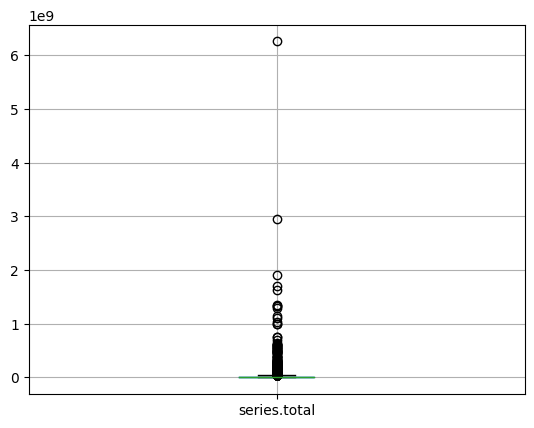

In [134]:
crunch[['series.total']].boxplot();

In [135]:
crunch['traffic.monthly'].isna().value_counts()

True     84088
False    50690
Name: traffic.monthly, dtype: int64

In [136]:
crunch.columns

Index(['_id', 'country_code', 'employee_range', 'min_revenues', 'series.total',
       'traffic.monthly', 'industries_list', 'investors_list',
       'industries_cleaned', 'funds_binary'],
      dtype='object')

### AS FOLLOWS, FROM ALL COMPANIES THAT RAISED, 2506 HAVE traffic.monthly values, and 1305 not

In [137]:
crunch[crunch['funds_binary']==1]['traffic.monthly'].notna().value_counts()

True     2506
False    1305
Name: traffic.monthly, dtype: int64

### WHAT DO I DO HERE?


In [138]:
#crunch.duplicated()

In [139]:
crunch.shape

(134778, 10)

In [140]:
crunch.isnull().sum().sort_values(ascending=False) 

series.total          130953
traffic.monthly        84088
min_revenues           55226
_id                        0
country_code               0
employee_range             0
industries_list            0
investors_list             0
industries_cleaned         0
funds_binary               0
dtype: int64

In [141]:
#crunch['investors_list'].replace('[]', np.nan, inplace=True)

In [142]:
crunch['investors_list'] = crunch['investors_list'].replace('[]', np.nan)

/var/folders/fg/0mh3ddwn6ls4kf4146hxrxb00000gn/T/ipykernel_3872/726007104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crunch['investors_list'] = crunch['investors_list'].replace('[]', np.nan)


### MAYBE WITH THE FOLLOWING THING I CAN REPLACE THE VALUES IN INVESTORS

In [143]:
crunch[crunch['investors_list'].astype(str).eq('[]')]

,_id,country_code,employee_range,min_revenues,series.total,traffic.monthly,industries_list,investors_list,industries_cleaned,funds_binary
8,a489b489-4b8f-4907-afda-313b8b7a0a94,gb,30,NaN,10297243.0,3887.0,"[Bitcoin, Cryptocurrency, Financial Exchanges,...",[],{Financial},1
12,e9ba26a7-a1a3-42c3-9a5c-dc1dd6a83a3e,gb,5,NaN,4300000.0,NaN,"[Clean Energy, Energy, Industrial Engineering,...",[],"{environmental_services_and_equipment, energy_...",1
15,826a923c-a90c-b01d-144d-140a976e7657,gb,30,NaN,NaN,2357.0,"[Angel Investment, Finance, Financial Services...",[],{Financial},0
93,6d0eba08-9d95-4ea6-a3de-a48682e3d1ec,gb,30,NaN,780000.0,NaN,"[Banking, Financial Services, FinTech, Mobile ...",[],{Financial},1
114,02b0329b-894a-aba0-b5e1-bac590ad3618,gb,75,NaN,992015546.0,94950.0,"[Government, Non Profit]",[],{Business_Products_And_Services},1
...,...,...,...,...,...,...,...,...,...,...
311409,a70808ad-93c0-4ad2-b859-699a25c79ed8,it,5,0.0,NaN,NaN,"[Accounting, Consulting, Legal]",[],{Business_Products_And_Services},0
311410,c3bc2993-9072-419e-99a3-08d51802dfc5,it,5,NaN,NaN,NaN,"[Graphic Design, Marketing, Web Development]",[],"{software, Business_Products_And_Services}",0
311411,8c003064-a0f0-4d79-9ddc-46854a957894,it,30,1000000.0,NaN,NaN,"[Direct Marketing, Marketing]",[],{Business_Products_And_Services},0
311412,1bab4fea-ea50-4bc1-a28a-91d6de49f921,it,5,NaN,NaN,NaN,"[Brand Marketing, Personal Branding]",[],"{hr_people_needs, Business_Products_And_Services}",0


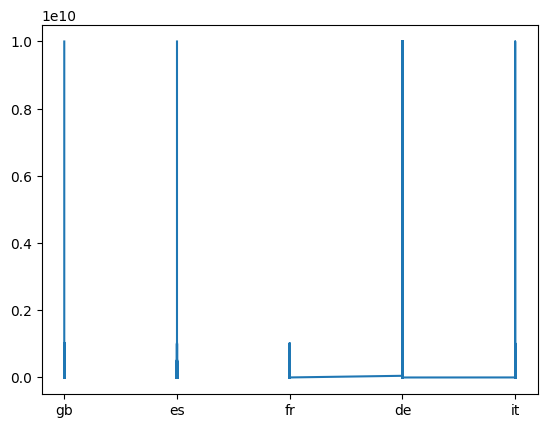

In [144]:
#sns.regplot(x=crunch['country_code'], y=crunch['min_revenues'])
plt.plot(crunch['country_code'], crunch['min_revenues'])
plt.show()

<b>IN THE FOLLOWING PLOT, IT SEEMS SMALL COMPANIES CAN HAVE MILLIONS OF EUROS IN REVENUES.
WAS THIS THE REVENUE <b>when they raised?</b> OR IS THIS THE CURRENT REVENUE?
SAME WITH EMPLOYEES, IS THIS THE CURRENT NUMBER OF EMPLOYEES, OR THIS IS THE NUM OF EMPLOYEES when THEY RAISED

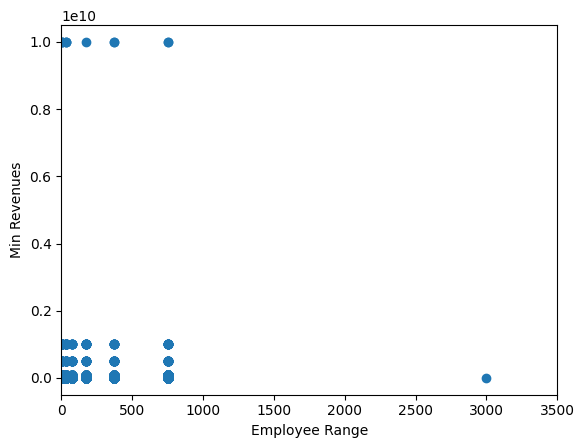

In [145]:
plt.scatter(crunch['employee_range'], crunch['min_revenues'])
plt.xlim([0, 3500])
plt.xlabel('Employee Range')
plt.ylabel('Min Revenues')
plt.show()

In [146]:
crunch.isna().sum().sort_values(ascending=False) 

series.total          130953
traffic.monthly        84088
min_revenues           55226
_id                        0
country_code               0
employee_range             0
industries_list            0
investors_list             0
industries_cleaned         0
funds_binary               0
dtype: int64

1. quel modèles scikitlearn classifier
2. 
- country_code = onehotencoder
- investors list onehotencoder
- industries_cleaned = onehotencoder
- employee_range onehotencoder


In [147]:
crunch[crunch['funds_binary']==1]['funds_binary'].value_counts()

1    3811
Name: funds_binary, dtype: int64

In [148]:
crunch.columns

Index(['_id', 'country_code', 'employee_range', 'min_revenues', 'series.total',
       'traffic.monthly', 'industries_list', 'investors_list',
       'industries_cleaned', 'funds_binary'],
      dtype='object')

In [149]:
for column in crunch.columns:
    if column in ['employee_range', 'min_revenues', 'traffic.monthly']:
        print(f"The Column {column} has the following notna")
        print(crunch[crunch['funds_binary']==1][column].notna().value_counts())
        print()

The Column employee_range has the following notna
True    3811
Name: employee_range, dtype: int64

The Column min_revenues has the following notna
False    3810
True        1
Name: min_revenues, dtype: int64

The Column traffic.monthly has the following notna
True     2506
False    1305
Name: traffic.monthly, dtype: int64



THANKS TO THE PREVIOUS WE REALIZE THAT <BR>
    - 99.9% of companies that raised, had no info on min_revenues or 0.1% of companies had info on revenues <br>
    - THAT 65% OF COMPANIES THat raised, had info traffic.monthly

In [150]:
for column in crunch.columns:
    if column in ['employee_range', 'min_revenues', 'traffic.monthly']:
        print(f"The Column {column} has the following notna")
        print(crunch[crunch['funds_binary']==0][column].notna().value_counts())
        print()

The Column employee_range has the following notna
True    130967
Name: employee_range, dtype: int64

The Column min_revenues has the following notna
True     79551
False    51416
Name: min_revenues, dtype: int64

The Column traffic.monthly has the following notna
False    82783
True     48184
Name: traffic.monthly, dtype: int64



In [151]:
mask_raised = crunch['funds_binary']==1

In [152]:
mask_not_raised = crunch['funds_binary']==0

IN THE FOLLOWING CELL I DIDN'T KNOW HOW TO ORDER VALUES BY RANGES

In [153]:
#crunch[mask_raised]['employee_range'].sum().sort_values(ascending=True)

In [154]:
crunch[mask_raised]['employee_range'].value_counts()

30     1813
5       966
75      452
175     359
375     135
750      86
Name: employee_range, dtype: int64

In [155]:
crunch[mask_raised]['employee_range'].describe()

count    3811.000000
mean       71.128313
std       128.866804
min         5.000000
25%         5.000000
50%        30.000000
75%        75.000000
max       750.000000
Name: employee_range, dtype: float64

In [156]:
crunch[mask_raised]['min_revenues'].describe()

count          1.0
mean     1000000.0
std            NaN
min      1000000.0
25%      1000000.0
50%      1000000.0
75%      1000000.0
max      1000000.0
Name: min_revenues, dtype: float64

In [157]:
crunch[mask_not_raised]['employee_range'].describe()

count    130967.000000
mean         50.428009
std         120.526546
min           5.000000
25%           5.000000
50%          30.000000
75%          30.000000
max        7500.000000
Name: employee_range, dtype: float64

In [158]:
crunch[mask_not_raised]['min_revenues'].describe()

count    7.955100e+04
mean     5.596070e+06
std      1.234743e+08
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+06
75%      1.000000e+06
max      1.000000e+10
Name: min_revenues, dtype: float64

In [159]:
5.596070e+06

5596070.0

In [160]:
mask_nr_min_rev = crunch[mask_not_raised]['min_revenues'].notna()

In [161]:
mask_nr_no_min_rev = crunch[mask_not_raised]['min_revenues'].isna()

<B> WHY CAN'T I DO THIS? A MASK OF A MASK???

In [162]:
#crunch[mask_nr_min_rev]

<B> HAVE TO CREATE A DATA FRAME TO TRY IT THIS WAY

In [163]:
test_notraised = crunch[mask_not_raised]

<B> THE FOLLOWING CELL IS THE COMPANIES THAT DID NOT RAISE, WHOSE MIN_REVENUES HAS A VALUE OTHER THAN NAN
    <BR> THE NAME OR RESULT OF THAT IS TEST_NOTRAISED_MIN_REVENUES

In [164]:
test_notraised_min_revenues = test_notraised[test_notraised['min_revenues'].notna()]

In [165]:
test_notraised_min_revenues[test_notraised_min_revenues['min_revenues']== 0.0]['min_revenues'].value_counts()

0.0    34186
Name: min_revenues, dtype: int64

In [166]:
rev_eq_zero = test_notraised_min_revenues[test_notraised_min_revenues['min_revenues']== 0.0]

<B>THE FOLLOWING TWO CELLS IS ALL THE COMPANIES THAT DID NOT RAISED, WHOSE MIN_REVENUES HAS A VALUE OTHER THAN NAN, AND THAT VALUE IS = 0

In [167]:
rev_eq_zero['employee_range'].value_counts()

5      25757
30      6604
75       808
175      562
375      274
750      181
Name: employee_range, dtype: int64

In [168]:
rev_eq_zero['employee_range'].describe()

count    34186.000000
mean        21.188644
std         66.974445
min          5.000000
25%          5.000000
50%          5.000000
75%          5.000000
max        750.000000
Name: employee_range, dtype: float64

<b>THE FOLLOWING TWO CELLS IS ALL THE COMPANIES THAT DID NOT RAISED, WHOSE MIN_REVENUES HAS A VALUE OTHER THAN NAN, AND THAT VALUE IS > 0

21 mean employees revenue 0.    
63 mean employees revenue 9.813138e+06
<br>
70 mean employees revenue what? 

In [169]:
(9.813138e+06-21)/63

155763.7619047619

In [170]:
155763*70+21

10903431

In [171]:
x=0

In [172]:
revenue = 155763*x +21

In [173]:
from sklearn.linear_model import LinearRegression

In [174]:
crunch[crunch['min_revenues'].notna()]['series.total'].notna().value_counts()

False    79551
True         1
Name: series.total, dtype: int64

in the following cell we see that index 573 is the only value of the company that raised, that has min_revenues

In [175]:
crunch[crunch['min_revenues'].notna()]

,_id,country_code,employee_range,min_revenues,series.total,traffic.monthly,industries_list,investors_list,industries_cleaned,funds_binary
573,832b657b-79ee-6f38-3fe7-fd1d2c7e8055,gb,75,1000000.0,9048580.0,7363.0,"[Financial Services, Information Technology, P...",[Business Growth Fund],"{software, Business_Products_And_Services, Fin...",1
3289,fab343c8-c3e0-2efc-2354-aaf7e17ad1c6,gb,30,0.0,NaN,NaN,"[Computer, EdTech, Education, Information Tech...",[],"{Computer_Hardware_And_Services, Education, hr...",0
3292,8c47aebe-3734-36f1-f01e-ef70c4c4ded0,gb,30,1000000.0,NaN,NaN,"[Compliance, Content, Content Delivery Network...",[],"{Mobile_And_Telecommunications, software, inte...",0
3294,89d5ddec-9280-4420-9129-b6f6c0dd14a6,gb,30,0.0,NaN,1169.0,"[Artificial Intelligence, Big Data, Bioinforma...",[],"{artificial_intelligence, Healthcare, software}",0
3303,aad4b7cf-ea76-4a66-a9ff-5c86c2191c88,gb,5,1000000.0,NaN,401.0,"[Computer, Video Games]",[],{Computer_Hardware_And_Services},0
...,...,...,...,...,...,...,...,...,...,...
311407,2e361ac4-4d85-49d2-b099-5f457fe57219,it,5,0.0,NaN,NaN,"[Banking, Financial Services, Wealth Management]",[],{Financial},0
311408,3bca68ce-674e-4b29-a0c6-52185b2eea96,it,5,0.0,NaN,NaN,"[Accounting, Employment, Online Portals]",[],"{hr_people_needs, Business_Products_And_Servic...",0
311409,a70808ad-93c0-4ad2-b859-699a25c79ed8,it,5,0.0,NaN,NaN,"[Accounting, Consulting, Legal]",[],{Business_Products_And_Services},0
311411,8c003064-a0f0-4d79-9ddc-46854a957894,it,30,1000000.0,NaN,NaN,"[Direct Marketing, Marketing]",[],{Business_Products_And_Services},0


In [176]:
crunch_rev = crunch[crunch['min_revenues'].notna()]

In [177]:
crunch_not_rev = crunch[crunch['min_revenues'].isna()]

In [178]:
crunch_rev

,_id,country_code,employee_range,min_revenues,series.total,traffic.monthly,industries_list,investors_list,industries_cleaned,funds_binary
573,832b657b-79ee-6f38-3fe7-fd1d2c7e8055,gb,75,1000000.0,9048580.0,7363.0,"[Financial Services, Information Technology, P...",[Business Growth Fund],"{software, Business_Products_And_Services, Fin...",1
3289,fab343c8-c3e0-2efc-2354-aaf7e17ad1c6,gb,30,0.0,NaN,NaN,"[Computer, EdTech, Education, Information Tech...",[],"{Computer_Hardware_And_Services, Education, hr...",0
3292,8c47aebe-3734-36f1-f01e-ef70c4c4ded0,gb,30,1000000.0,NaN,NaN,"[Compliance, Content, Content Delivery Network...",[],"{Mobile_And_Telecommunications, software, inte...",0
3294,89d5ddec-9280-4420-9129-b6f6c0dd14a6,gb,30,0.0,NaN,1169.0,"[Artificial Intelligence, Big Data, Bioinforma...",[],"{artificial_intelligence, Healthcare, software}",0
3303,aad4b7cf-ea76-4a66-a9ff-5c86c2191c88,gb,5,1000000.0,NaN,401.0,"[Computer, Video Games]",[],{Computer_Hardware_And_Services},0
...,...,...,...,...,...,...,...,...,...,...
311407,2e361ac4-4d85-49d2-b099-5f457fe57219,it,5,0.0,NaN,NaN,"[Banking, Financial Services, Wealth Management]",[],{Financial},0
311408,3bca68ce-674e-4b29-a0c6-52185b2eea96,it,5,0.0,NaN,NaN,"[Accounting, Employment, Online Portals]",[],"{hr_people_needs, Business_Products_And_Servic...",0
311409,a70808ad-93c0-4ad2-b859-699a25c79ed8,it,5,0.0,NaN,NaN,"[Accounting, Consulting, Legal]",[],{Business_Products_And_Services},0
311411,8c003064-a0f0-4d79-9ddc-46854a957894,it,30,1000000.0,NaN,NaN,"[Direct Marketing, Marketing]",[],{Business_Products_And_Services},0


In [179]:
type(crunch_rev['employee_range'][573])

numpy.int64

In [180]:
X_reg = crunch_rev[['employee_range']]

In [181]:
y_reg = crunch_rev['min_revenues']

In [182]:
reg = LinearRegression().fit(X_reg, y_reg)

In [183]:
crunch_not_rev['employee_range'][0]

750

In [184]:
test_reg = pd.DataFrame(reg.predict(pd.DataFrame(crunch_not_rev['employee_range'][:10])))

In [185]:
test_reg

,0
0,6.434604e+07
1,4.333931e+06
2,6.434604e+07
3,1.641970e+07
4,3.308973e+07
5,1.641970e+07
6,3.308973e+07
7,3.308973e+07
8,4.333931e+06
9,8.084688e+06


In [186]:
employee_dataframe = crunch_not_rev[['employee_range']]

In [187]:
employee_dataframe.columns

Index(['employee_range'], dtype='object')

In [188]:
test_revenues_from_reg = pd.DataFrame( reg.predict(employee_dataframe), index=employee_dataframe.index, \
                                      columns=['revenues_from_reg'] )

In [189]:
employee_dataframe

,employee_range
0,750
1,30
2,750
3,175
4,375
...,...
311403,5
311404,5
311406,375
311410,5


In [190]:
test_revenues_from_reg

,revenues_from_reg
0,6.434604e+07
1,4.333931e+06
2,6.434604e+07
3,1.641970e+07
4,3.308973e+07
...,...
311403,2.250178e+06
311404,2.250178e+06
311406,3.308973e+07
311410,2.250178e+06


In [191]:
crunch_not_rev['revenues_from_reg'] = test_revenues_from_reg

/var/folders/fg/0mh3ddwn6ls4kf4146hxrxb00000gn/T/ipykernel_3872/4109662929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crunch_not_rev['revenues_from_reg'] = test_revenues_from_reg


In [192]:
crunch_not_rev

,_id,country_code,employee_range,min_revenues,series.total,traffic.monthly,industries_list,investors_list,industries_cleaned,funds_binary,revenues_from_reg
0,ca17699b-2f49-91f4-5863-7216fc07a64e,gb,750,NaN,2.227000e+08,20525524.0,"[Finance, Financial Services, FinTech, Marketp...","[Cubit Investments, BRM Capital, Spark Capital...","{internet, Financial}",1,6.434604e+07
1,792dcc41-3650-4496-68ba-481f52ccd99e,gb,30,NaN,3.824077e+07,709.0,"[Analytics, Artificial Intelligence, Asset Man...","[Parkwalk Advisors, Techstars, Global Brain Co...","{artificial_intelligence, software, environmen...",1,4.333931e+06
2,35d239af-cf06-4f04-9387-64a079b641cd,gb,750,NaN,2.617301e+08,7464935.0,"[E-Commerce, Fitness, Lifestyle, Retail, Sport...",[General Atlantic],{Retail_NonInternetMobile},1,6.434604e+07
3,bb06c586-aac4-4657-39d1-1e428f3f08da,gb,175,NaN,6.986406e+07,210454.0,"[Banking, Finance, Financial Services, FinTech]","[Oxford Capital Partners, Samos Investments, E...",{Financial},1,1.641970e+07
4,99c2b07b-bbf5-dcac-f768-7b905e940c0e,gb,375,NaN,1.142175e+09,95169.0,"[Biopharma, Biotechnology, Genetics, Health Di...","[IP Group Plc, Lansdowne Partners, Invesco, Il...",{Healthcare},1,3.308973e+07
...,...,...,...,...,...,...,...,...,...,...,...
311403,1185b69f-b38a-4973-3a60-03084ec74a40,it,5,NaN,NaN,NaN,"[Guides, Information Technology, Tourism, Travel]",[],{software},0,2.250178e+06
311404,808733f1-89a2-4c19-8d1b-6fa1bf5d3ec0,it,5,NaN,NaN,NaN,"[Analytics, Consulting, Data Integration, Mana...",[],"{software, Business_Products_And_Services}",0,2.250178e+06
311406,1861fa07-0988-4127-9b5e-906e406da98b,it,375,NaN,NaN,NaN,"[Computer, Hardware, Hospitality, Marketing]",[],"{Computer_Hardware_And_Services, Business_Prod...",0,3.308973e+07
311410,c3bc2993-9072-419e-99a3-08d51802dfc5,it,5,NaN,NaN,NaN,"[Graphic Design, Marketing, Web Development]",[],"{software, Business_Products_And_Services}",0,2.250178e+06


In [193]:
crunch_not_rev.drop(columns=['min_revenues'], inplace=True)

/var/folders/fg/0mh3ddwn6ls4kf4146hxrxb00000gn/T/ipykernel_3872/2872743425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crunch_not_rev.drop(columns=['min_revenues'], inplace=True)


In [194]:
crunch_not_rev

,_id,country_code,employee_range,series.total,traffic.monthly,industries_list,investors_list,industries_cleaned,funds_binary,revenues_from_reg
0,ca17699b-2f49-91f4-5863-7216fc07a64e,gb,750,2.227000e+08,20525524.0,"[Finance, Financial Services, FinTech, Marketp...","[Cubit Investments, BRM Capital, Spark Capital...","{internet, Financial}",1,6.434604e+07
1,792dcc41-3650-4496-68ba-481f52ccd99e,gb,30,3.824077e+07,709.0,"[Analytics, Artificial Intelligence, Asset Man...","[Parkwalk Advisors, Techstars, Global Brain Co...","{artificial_intelligence, software, environmen...",1,4.333931e+06
2,35d239af-cf06-4f04-9387-64a079b641cd,gb,750,2.617301e+08,7464935.0,"[E-Commerce, Fitness, Lifestyle, Retail, Sport...",[General Atlantic],{Retail_NonInternetMobile},1,6.434604e+07
3,bb06c586-aac4-4657-39d1-1e428f3f08da,gb,175,6.986406e+07,210454.0,"[Banking, Finance, Financial Services, FinTech]","[Oxford Capital Partners, Samos Investments, E...",{Financial},1,1.641970e+07
4,99c2b07b-bbf5-dcac-f768-7b905e940c0e,gb,375,1.142175e+09,95169.0,"[Biopharma, Biotechnology, Genetics, Health Di...","[IP Group Plc, Lansdowne Partners, Invesco, Il...",{Healthcare},1,3.308973e+07
...,...,...,...,...,...,...,...,...,...,...
311403,1185b69f-b38a-4973-3a60-03084ec74a40,it,5,NaN,NaN,"[Guides, Information Technology, Tourism, Travel]",[],{software},0,2.250178e+06
311404,808733f1-89a2-4c19-8d1b-6fa1bf5d3ec0,it,5,NaN,NaN,"[Analytics, Consulting, Data Integration, Mana...",[],"{software, Business_Products_And_Services}",0,2.250178e+06
311406,1861fa07-0988-4127-9b5e-906e406da98b,it,375,NaN,NaN,"[Computer, Hardware, Hospitality, Marketing]",[],"{Computer_Hardware_And_Services, Business_Prod...",0,3.308973e+07
311410,c3bc2993-9072-419e-99a3-08d51802dfc5,it,5,NaN,NaN,"[Graphic Design, Marketing, Web Development]",[],"{software, Business_Products_And_Services}",0,2.250178e+06


In [195]:
crunch_not_rev.rename(columns={'revenues_from_reg': 'min_revenues'}, inplace = True)

/var/folders/fg/0mh3ddwn6ls4kf4146hxrxb00000gn/T/ipykernel_3872/1118252949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crunch_not_rev.rename(columns={'revenues_from_reg': 'min_revenues'}, inplace = True)


In [196]:
crunch_not_rev.head()

,_id,country_code,employee_range,series.total,traffic.monthly,industries_list,investors_list,industries_cleaned,funds_binary,min_revenues
0,ca17699b-2f49-91f4-5863-7216fc07a64e,gb,750,2.227000e+08,20525524.0,"[Finance, Financial Services, FinTech, Marketp...","[Cubit Investments, BRM Capital, Spark Capital...","{internet, Financial}",1,6.434604e+07
1,792dcc41-3650-4496-68ba-481f52ccd99e,gb,30,3.824077e+07,709.0,"[Analytics, Artificial Intelligence, Asset Man...","[Parkwalk Advisors, Techstars, Global Brain Co...","{artificial_intelligence, software, environmen...",1,4.333931e+06
2,35d239af-cf06-4f04-9387-64a079b641cd,gb,750,2.617301e+08,7464935.0,"[E-Commerce, Fitness, Lifestyle, Retail, Sport...",[General Atlantic],{Retail_NonInternetMobile},1,6.434604e+07
3,bb06c586-aac4-4657-39d1-1e428f3f08da,gb,175,6.986406e+07,210454.0,"[Banking, Finance, Financial Services, FinTech]","[Oxford Capital Partners, Samos Investments, E...",{Financial},1,1.641970e+07
4,99c2b07b-bbf5-dcac-f768-7b905e940c0e,gb,375,1.142175e+09,95169.0,"[Biopharma, Biotechnology, Genetics, Health Di...","[IP Group Plc, Lansdowne Partners, Invesco, Il...",{Healthcare},1,3.308973e+07


In [197]:
crunch_not_rev.shape

(55226, 10)

In [198]:
crunch_rev.shape

(79552, 10)

In [199]:
crunch_not_rev[['employee_range']].index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            311383, 311385, 311387, 311388, 311393, 311403, 311404, 311406,
            311410, 311412],
           dtype='int64', length=55226)

In [200]:
df = pd.concat([crunch_rev, crunch_not_rev], axis=0).sample(frac=1)

In [201]:
df.shape

(134778, 10)

In [202]:
df.head()

,_id,country_code,employee_range,min_revenues,series.total,traffic.monthly,industries_list,investors_list,industries_cleaned,funds_binary
297384,a97700f7-9c2b-7fdc-2e1d-bf909820cc9d,de,5,2.250178e+06,NaN,NaN,"[Art, Concerts, Events, Internet, Journalism, ...",[],"{internet, media_traditional}",0
259855,0741b358-75b3-a5b2-4e02-f66f02af7a56,fr,75,1.000000e+06,NaN,NaN,[Finance],[],{Financial},0
99160,50c1d6f4-97ce-46ff-9ae8-5e238e4cd527,gb,75,8.084688e+06,NaN,2541.0,[Information and Communications Technology (IC...,[],"{software, Business_Products_And_Services}",0
214795,d7bd3638-df6b-b044-39c7-356bbc0611a3,gb,75,1.000000e+07,NaN,NaN,[Charity],[],{Business_Products_And_Services},0
171745,5384f981-70f3-41e1-bbd9-4eb4d23e3844,gb,30,4.333931e+06,NaN,NaN,"[Electrical Distribution, Electronics, Lighting]",[],"{energy_and_utilities, Electronics}",0


In [203]:
df['min_revenues'].isna().value_counts()

False    134778
Name: min_revenues, dtype: int64

In [204]:
#test_reg = pd.DataFrame(reg.predict(pd.DataFrame(crunch_not_rev['employee_range'][:10])), columns='min_revenues')

### <b> FINISHED IMPUTING À-LA-MANO! MIN_REVENUES FROM A LINEAR REGRESSION WITH EMPLOYEE_RANGE AS X

### WILL TRY AND SEE HOW CAN I DO THE SAME THING WITH TRAFFIC.MONTHLY

In [205]:
len(df[df['traffic.monthly']==0.0]['traffic.monthly'])

0

In [206]:
valid_traffic_mask = df['traffic.monthly'].notna()

WHEN DOING THE FOLLOWING CELL, REALIZED WE HAVE EMPTY VALUES OF INDUSTRIES_CLEANED, IN THE FORM OF EMPTY SETS <BR>
    1. FIRST, HOW CAN WE SEARCH IN BOOLEAN MASK IF VALUES ARE EQUAL TO EMPTY SET <br>
    2. SECOND, I SHOULD FIND WHAT ARE THE VALUES THAT ARE MISSING. FOR THE MOMENT IS Leisure, Lifestyle, Travel

In [207]:
df[valid_traffic_mask]

,_id,country_code,employee_range,min_revenues,series.total,traffic.monthly,industries_list,investors_list,industries_cleaned,funds_binary
99160,50c1d6f4-97ce-46ff-9ae8-5e238e4cd527,gb,75,8.084688e+06,NaN,2541.0,[Information and Communications Technology (IC...,[],"{software, Business_Products_And_Services}",0
813,63fdf2e2-2fbf-4fb4-8758-a5919df4d68b,gb,30,4.333931e+06,7728216.0,55613.0,"[FinTech, Gift Card, Internet, SaaS]","[Eamon Jubbawy, Trend Investment Group, James ...","{Retail_NonInternetMobile, software, internet,...",1
14610,7d3344fe-402d-367d-5a47-a1edd9ab0832,gb,750,6.434604e+07,NaN,1313.0,"[Consulting, Pharmaceutical]",[],"{Healthcare, Business_Products_And_Services}",0
303013,30313d12-9527-ff61-f2e0-032f936bf068,it,30,1.000000e+06,NaN,57490.0,"[Automotive, E-Commerce, Internet, Logistics, ...",[],"{transportation, Retail_NonInternetMobile, Bus...",0
52577,1d59664d-51cd-4d1f-8113-c4b2ec34f149,gb,30,0.000000e+00,NaN,100.0,[Information Technology],[],{software},0
...,...,...,...,...,...,...,...,...,...,...
280197,29a1c9d5-a866-bd6c-d3da-862246745807,de,5,0.000000e+00,NaN,287735.0,"[Consulting, Management Consulting, Management...",[],"{software, Business_Products_And_Services}",0
243327,f7d13921-686a-4a63-bb36-3c0ef3ec6298,es,5,0.000000e+00,NaN,22132.0,"[Consumer Goods, E-Commerce, Home Improvement]",[],{Retail_NonInternetMobile},0
82056,415dcbd0-5b7e-0237-2876-a30ea137c7c3,gb,175,1.000000e+07,NaN,507.0,[Textiles],[],{},0
298928,93a50e0e-204a-4034-af90-c645dcf02c4b,de,30,1.000000e+06,NaN,499.0,"[Apps, Consulting, IT Infrastructure]",[],"{Mobile_And_Telecommunications, Computer_Hardw...",0


<B> LET'S CONTINUE WITH VALID TRAFFIC MASK

In [208]:
df[valid_traffic_mask]['employee_range'].value_counts()

30      20113
5       16720
75       4809
175      4643
375      2504
750      1899
7500        1
3000        1
Name: employee_range, dtype: int64

In [209]:
df[valid_traffic_mask]['employee_range'].describe()

count    50690.000000
mean        83.526139
std        161.353155
min          5.000000
25%          5.000000
50%         30.000000
75%         75.000000
max       7500.000000
Name: employee_range, dtype: float64

In [210]:
df[~valid_traffic_mask]['employee_range'].value_counts()

5       49432
30      27225
75       3141
175      2541
375      1111
750       637
3000        1
Name: employee_range, dtype: int64

In [211]:
df[~valid_traffic_mask]['employee_range'].describe()

count    84088.000000
mean        31.413935
std         81.737760
min          5.000000
25%          5.000000
50%          5.000000
75%         30.000000
max       3000.000000
Name: employee_range, dtype: float64

I CHECKED IF THERE IS A RELATIONSHIP WITH THE EMPLOYEES, LET'S NOW CHECK WITH INDUSTRIES

In [212]:
a = set()

In [213]:
b = set([1,1,1,1,1,3])

In [214]:
type(a)

set

In [215]:
b

{1, 3}

In [216]:
if a =={}:
    print("yes it is empty")

In [217]:
if b =={}:
    print("yes it is empty")

In [218]:
if a:
    print("bla bla")

In [219]:
if b:
    print("bla bla")

bla bla


In [220]:
if not a:
    print("it is an empty set")

it is an empty set


In [233]:
#if a.empty():
#    print("raca") #doesn't work caus set object as no attribute empty

# I DIDN'T RUN THE FOLLOWING BLOC BEGINNING FROM HERE

In [ ]:
type(list(a))

In [ ]:
str(a)

In [ ]:
str(b)

### count how many values in cleaned industries are empty sets

In [ ]:
#count how many values in cleaned industries are empty sets
empty_sets = 0

In [ ]:
count_sets = lambda x: int(1) if x.empty() else int(0)

In [ ]:
testing_empty_sets_industries = df[['industries_cleaned']]

In [ ]:
#testing_empty_sets_industries.apply(count_sets) #DOESN'T WORK DUNNO WHY

In [ ]:
testing_empty_sets_industries[testing_empty_sets_industries==False]

In [ ]:
test_all_df = df

In [ ]:
test_all_df[test_all_df['industries_cleaned']==False]

In [ ]:
test_all_df['industries_cleaned'].replace(set(), np.nan, inplace=True)

In [ ]:
test_all_df['industries_cleaned'].isna().value_counts()

In [ ]:
test_all_df['industries_cleaned'] = test_all_df['industries_cleaned'].apply(lambda x: str(x))

In [ ]:
test_all_df[test_all_df['industries_cleaned']=="set()"]['industries_cleaned'].value_counts()

In [ ]:
test_all_df[test_all_df['industries_cleaned']=="set()"]['industries_cleaned']

In [ ]:
test_all_df['industries_cleaned'][232064]

In [ ]:
test_all_df[test_all_df['industries_cleaned']=="set()"]['industries_list']

In [ ]:
keep_track = []
for index, colname in enumerate(test_all_df[test_all_df['industries_cleaned']=="set()"]['industries_list']):
    for ele in colname:
        keep_track.append(ele)

In [ ]:
industries_dict_complete.keys()


In [ ]:
keep_track

In [ ]:
keep_track_set = set(keep_track)

In [ ]:
len(keep_track_set)

In [ ]:
keep_track_set

In [ ]:
for ele in keep_track:
    if ele in industries_dict_complete.keys():
        print(ele)

In [ ]:
df = df.drop(columns=['series.total', 'industries_list', '_id'])

In [ ]:
df

In [ ]:
df[df['funds_binary']==1]['traffic.monthly'].isna().value_counts()


In [ ]:
test_raised = df[df['funds_binary']==1]

In [ ]:
test_raised[test_raised['traffic.monthly'].notna()]['employee_range'].value_counts()

In [ ]:
test_raised[test_raised['traffic.monthly'].notna()]['employee_range'].describe()

In [ ]:
test_raised[test_raised['traffic.monthly'].isna()]['employee_range'].value_counts()

In [ ]:
test_raised[test_raised['traffic.monthly'].isna()]['employee_range'].describe()

In [ ]:
test_notraised_min_revenues[test_notraised_min_revenues['min_revenues']>0.0]['min_revenues'].value_counts()

In [ ]:
test_notraised_min_revenues[test_notraised_min_revenues['min_revenues']>0.0]['min_revenues'].describe()

In [ ]:
test_notraised_min_revenues[test_notraised_min_revenues['min_revenues']>0.0]['employee_range'].describe()

# UNTIL HERE

<B>WE SEE THAT WHERE REVENUE IS 0 THE MEAN OF EMPLOYEES IS 21, WHEN REVENUE IS >0, THE MEAN OF EMPLOYEES IS 63

<B>THIS "MEANS" THAT IF I CAN FIND THE MEAN OF THE EMPLOYEES OF THE COMPANIES THAT RAISED, MAYBE I CAN IMPUTE IT IN A BETTER WAY

In [222]:
crunch[mask_raised]['employee_range'].describe()

count    3811.000000
mean       71.128313
std       128.866804
min         5.000000
25%         5.000000
50%        30.000000
75%        75.000000
max       750.000000
Name: employee_range, dtype: float64

In [223]:
crunch['min_revenues'].notna().value_counts()

True     79552
False    55226
Name: min_revenues, dtype: int64

In [224]:
rev = crunch[crunch['min_revenues'].notna()]['min_revenues']

In [225]:
employee_for_rev = crunch[crunch['min_revenues'].notna()]['employee_range']

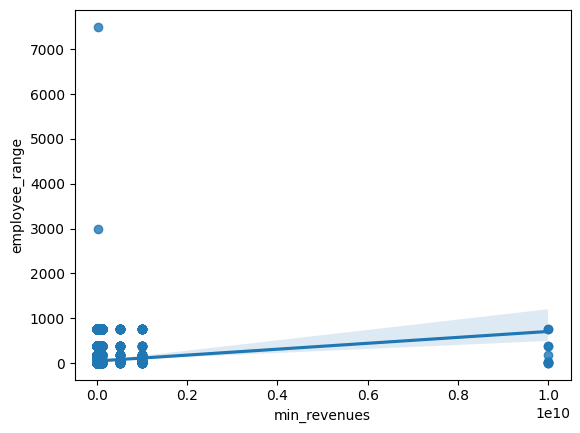

In [226]:
sns.regplot(x=rev, y=employee_for_rev, scatter=True)
plt.show()

i would like to IMPUTE with KNN OR MULTI IMPUTE THING HERE<BR>
https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html
<BR>UNIVARIATE VS MULTIVARIATE <BR>
https://scikit-learn.org/stable/modules/impute.html
<BR>ITERATIVE<BR>
https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer
<BR>EXAMPLE OF ITERATIVE<BR>
https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html#sphx-glr-auto-examples-impute-plot-missing-values-py

<B> UNTIL HERE UNTIL HERE UNTIL HERE UNTIL HERE
    <B> UNTIL HERE UNTIL HERE UNTIL HERE UNTIL HERE
        <B> UNTIL HERE UNTIL HERE UNTIL HERE UNTIL HERE
            <B> UNTIL HERE UNTIL HERE UNTIL HERE UNTIL HERE
                <B> UNTIL HERE UNTIL HERE UNTIL HERE UNTIL HERE
                    <B> UNTIL HERE UNTIL HERE UNTIL HERE UNTIL HERE
                        <B> UNTIL HERE UNTIL HERE UNTIL HERE UNTIL HERE
                            

In [227]:
df

,_id,country_code,employee_range,min_revenues,series.total,traffic.monthly,industries_list,investors_list,industries_cleaned,funds_binary
297384,a97700f7-9c2b-7fdc-2e1d-bf909820cc9d,de,5,2.250178e+06,NaN,NaN,"[Art, Concerts, Events, Internet, Journalism, ...",[],"{internet, media_traditional}",0
259855,0741b358-75b3-a5b2-4e02-f66f02af7a56,fr,75,1.000000e+06,NaN,NaN,[Finance],[],{Financial},0
99160,50c1d6f4-97ce-46ff-9ae8-5e238e4cd527,gb,75,8.084688e+06,NaN,2541.0,[Information and Communications Technology (IC...,[],"{software, Business_Products_And_Services}",0
214795,d7bd3638-df6b-b044-39c7-356bbc0611a3,gb,75,1.000000e+07,NaN,NaN,[Charity],[],{Business_Products_And_Services},0
171745,5384f981-70f3-41e1-bbd9-4eb4d23e3844,gb,30,4.333931e+06,NaN,NaN,"[Electrical Distribution, Electronics, Lighting]",[],"{energy_and_utilities, Electronics}",0
...,...,...,...,...,...,...,...,...,...,...
240020,6bb80df0-909c-40b3-a736-86bd2b10baf8,es,5,0.000000e+00,NaN,NaN,[Manufacturing],[],{},0
308910,563672a9-459b-4941-9b08-118bf3710908,it,30,1.000000e+06,NaN,383.0,"[Logistics, Transaction Processing, Transporta...",[],"{transportation, Business_Products_And_Services}",0
258861,9a433867-9495-45fd-8f9f-0ef3de9b5748,fr,5,1.000000e+06,NaN,NaN,"[Internet, Network Hardware]",[],"{Computer_Hardware_And_Services, internet}",0
165689,68b82b20-de97-4ecc-9cc4-4194e3e8d2dc,gb,5,1.000000e+06,NaN,NaN,"[Advertising, Advertising Platforms, Supply Ch...",[],"{Business_Products_And_Services, media_traditi...",0


In [228]:
column_to_impute = ['traffic.monthly']
columns_to_num = ['traffic.monthly', 'min_revenues']
columns_to_ohe = ['employee_range', 'country_code']
columns_to_mb = ['investors_list', 'industries_cleaned']

HOW TO MAKE IMPUTER DEPENDING ON COLUMN, or probably creating another processed thing

In [229]:
from sklearn.preprocessing import MultiLabelBinarizer



### INT HE FOLLOWING CELL I POP THE COLUMN INDUSTRIES_CLEANED, IS IT NECESSARY? CUZ I HAVE TO RAN ALL CELLS AGAIN

DO NOT RUN THE FOLLOWING CELL


In [266]:
#IN THIS WAY I POP THE COLUMN FROM THE DATAFRAME
#mlb = MultiLabelBinarizer(sparse_output=True)

df_ind_cleaned = df.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df.pop('industries_cleaned')),
                index=df.index,
                columns=mlb.classes_))

KeyError: 'industries_cleaned'

<B>IN THE FOLLOWING CELL, I DON'T POP THE COLUMN

In [267]:
mlb = MultiLabelBinarizer(sparse_output=True)

df_ind_cleaned = df.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df['industries_cleaned']),
                index=df.index,
                columns=mlb.classes_))

KeyError: 'industries_cleaned'

In [232]:
print(df.shape, df_new_test.shape)

(134778, 9) (134778, 29)


In [2]:
crunch

NameError: name 'crunch' is not defined

In [235]:
df_new_test

,_id,country_code,employee_range,min_revenues,series.total,traffic.monthly,industries_list,investors_list,funds_binary,Business_Products_And_Services,...,artificial_intelligence,energy_and_utilities,environmental_services_and_equipment,hr_people_needs,internet,media_traditional,real_estate,risk_and_security,software,transportation
297384,a97700f7-9c2b-7fdc-2e1d-bf909820cc9d,de,5,2.250178e+06,NaN,NaN,"[Art, Concerts, Events, Internet, Journalism, ...",[],0,0,...,0,0,0,0,1,1,0,0,0,0
259855,0741b358-75b3-a5b2-4e02-f66f02af7a56,fr,75,1.000000e+06,NaN,NaN,[Finance],[],0,0,...,0,0,0,0,0,0,0,0,0,0
99160,50c1d6f4-97ce-46ff-9ae8-5e238e4cd527,gb,75,8.084688e+06,NaN,2541.0,[Information and Communications Technology (IC...,[],0,1,...,0,0,0,0,0,0,0,0,1,0
214795,d7bd3638-df6b-b044-39c7-356bbc0611a3,gb,75,1.000000e+07,NaN,NaN,[Charity],[],0,1,...,0,0,0,0,0,0,0,0,0,0
171745,5384f981-70f3-41e1-bbd9-4eb4d23e3844,gb,30,4.333931e+06,NaN,NaN,"[Electrical Distribution, Electronics, Lighting]",[],0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240020,6bb80df0-909c-40b3-a736-86bd2b10baf8,es,5,0.000000e+00,NaN,NaN,[Manufacturing],[],0,0,...,0,0,0,0,0,0,0,0,0,0
308910,563672a9-459b-4941-9b08-118bf3710908,it,30,1.000000e+06,NaN,383.0,"[Logistics, Transaction Processing, Transporta...",[],0,1,...,0,0,0,0,0,0,0,0,0,1
258861,9a433867-9495-45fd-8f9f-0ef3de9b5748,fr,5,1.000000e+06,NaN,NaN,"[Internet, Network Hardware]",[],0,0,...,0,0,0,0,1,0,0,0,0,0
165689,68b82b20-de97-4ecc-9cc4-4194e3e8d2dc,gb,5,1.000000e+06,NaN,NaN,"[Advertising, Advertising Platforms, Supply Ch...",[],0,1,...,0,0,0,0,0,1,0,0,0,0


In [238]:


mlb = MultiLabelBinarizer(sparse_output=True)

df_investors = df_new_test.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df_new_test['investors_list']),
                index=df_new_test.index,
                columns=mlb.classes_))

In [240]:
df_new_test.shape

(134778, 29)

In [241]:
df_investors.shape

(134778, 5535)

### DO NOT RUN THE FOLLOWING

In [1]:
preproc_numerical_imputer_traffic = make_pipeline(
    SimpleImputer())

preproc_numerical_baseline = make_pipeline(
    SimpleImputer(),
    StandardScaler())


preproc_categorical_baseline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preproc_baseline = make_column_transformer(
    (preproc_numerical_imputer_traffic, column_to_impute),
    (preproc_numerical_baseline, columns_to_num),
    (preproc_categorical_baseline, columns_to_ohe),
    remainder="drop")

preproc_baseline

NameError: name 'make_pipeline' is not defined

In [243]:
from sklearn.linear_model import LogisticRegression

In [244]:
pipe_baseline = make_pipeline(preproc_baseline, LogisticRegression())
pipe_baseline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  ['traffic.monthly']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['traffic.monthly',
                                                   'min_revenues']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['employee_range',
                                                   'country_code'])])),
                ('logisticregression', LogisticRegression())])

In [245]:
#cross_val_score(pipe_baseline) #ou gridsearch

In [246]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
#model = LogisticRegression()



In [248]:
df_investors.shape

(134778, 5535)

In [249]:
funds_binary_1_again = df_investors[df_investors['funds_binary']==1]

In [250]:
funds_binary_2_again = df_investors[df_investors['funds_binary']==0]

In [251]:
funds_binary_1_again.shape

(3811, 5535)

In [252]:
funds_binary_2_again.shape

(130967, 5535)

In [253]:
funds_binary_2_again = funds_binary_2_again.sample(6000)

In [254]:
funds_binary_2_again.shape

(6000, 5535)

In [255]:
reduced_df = pd.concat([funds_binary_1_again, funds_binary_2_again], axis=0).sample(frac=1)

In [256]:
X = reduced_df.drop(columns=['funds_binary'])

In [258]:
X= X.drop(columns=['_id', 'industries_list', 'investors_list', 'series.total'])

In [259]:
X.columns

Index(['country_code', 'employee_range', 'min_revenues', 'traffic.monthly',
       'Business_Products_And_Services', 'Computer_Hardware_And_Services',
       'Education', 'Electronics', 'Financial', 'Food_And_Beverages',
       ...
       'seed + speed Ventures', 'steve leach', 'tokentus investment AG',
       'ustwo', 'v1.vc', 'venBio Partners', 'Ã˜rsted', 'Électricité de France',
       'Özge Özpirinçci', '​Ben Heald ​'],
      dtype='object', length=5530)

In [260]:
y = reduced_df['funds_binary']

In [261]:
y

53178     0
249623    0
4223      0
3645      0
268864    0
         ..
280656    0
507       1
1796      1
3916      1
173420    0
Name: funds_binary, Length: 9811, dtype: int64

In [262]:
score_baseline = cross_val_score(pipe_baseline, X, y, cv=5).mean()

In [263]:
score_baseline

0.6115584802017757

In [264]:
results = cross_validate(pipe_baseline, X, y, cv = 5) # returns test_score, fit_time and score_time


<B>ENDED HERE ENDED HERE<BR>
    
<B>ENDED HERE ENDED HERE<BR>
    
<B>ENDED HERE ENDED HERE<BR>
    
<B>ENDED HERE ENDED HERE<BR>
    
<B>ENDED HERE ENDED HERE<BR>
    
<B>ENDED HERE ENDED HERE<BR>
    
<B>ENDED HERE ENDED HERE<BR>
    
<B>ENDED HERE ENDED HERE<BR>
    
<B>ENDED HERE ENDED HERE<BR>
    
<B>ENDED HERE ENDED HERE<BR>
    
<B>ENDED HERE ENDED HERE<BR>
    
<B>ENDED HERE ENDED HERE<BR>
    
<B>ENDED HERE ENDED HERE<BR>
    

In [265]:
funds_binary_1 = df[df['funds_binary']==1]
funds_binary_0 = df[df['funds_binary']==0]
funds_binary_0 = funds_binary_0.sample(6000)
reduced_df = pd.concat([funds_binary_0, funds_binary_1], axis=0).sample(frac=1)
X_first = reduced_df.drop(columns=['funds_binary'])
y_first = reduced_df['funds_binary']

In [ ]:
encoder = OneHotEncoder()

encoder.fit(df[columns_to_encode])

one_hot_encoded_columns = encoder.transform(df[columns_to_encode]).toarray()

one_hot_encoded_df = pd.DataFrame(one_hot_encoded_columns, columns=encoder.get_feature_names(columns_to_encode))

df = pd.concat([df, one_hot_encoded_df], axis=1)

In [ ]:

# Check unique values for streets (3)
print(f"The unique values for 'Street' are {df.employee_range.unique()}")

# Instantiate the OneHotEncoder
ohe = OneHotEncoder(sparse = False) 

# Fit encoder
ohe.fit(df[['employee_range']]) 

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe.categories_}")

# Display the generated names
print(f"The column names for the encoded values are {ohe.get_feature_names_out()}")

# Transform the current "Street" column
df[ohe.get_feature_names_out()] = ohe.transform(df[['employee_range']])

# Drop the column "Street" which has been encoded
df.drop(columns = ["employee_range"], inplace = True)

# Show the dataset
df.head(3)

#['investors_list', 'industries_cleaned', 'employee_range', 'country_code']

In [ ]:
#changed this one, so do not run it
preproc_numerical_imputer_traffic = make_pipeline(
    SimpleImputer())

preproc_numerical_baseline = make_pipeline(
    SimpleImputer(),
    StandardScaler())


preproc_categorical_baseline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preproc_multi_label = make_pipeline(
    MultiLabelBinarizer(sparse_output=True))

preproc_baseline_bad_version = make_column_transformer(
    (preproc_numerical_imputer_traffic, column_to_impute),
    (preproc_numerical_baseline, columns_to_num),
    (preproc_categorical_baseline, columns_to_ohe),
    (preproc_multi_label, columns_to_mb),
    remainder="drop")

#preproc_baseline_bad_version

In [ ]:
#sns.histplot(data['GrLivArea'], bins=200,kde = True); #for distribution
#sns.boxplot(data=data, x='GrLivArea') #for outliers
# Saving the indexes corresponding to rows 
# without the absurd -1 value
# and without the mansion
boolean_mask = (data['GrLivArea']>0) & (data['GrLivArea']<5000)

# Applying the boolean filteraing
data = data[boolean_mask].reset_index(drop=True)

# Visualize boxplot again
data[['GrLivArea']].boxplot(); 


In [ ]:

# Heatmap of pairwise correlations
correlation_matrix = data.corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");

In [ ]:
len(industries_dict_complete.keys())

In [ ]:
industries_dict_complete.keys()

In [ ]:
industries_dict_complete.values()

In [ ]:
testing_industries = df

In [ ]:
my_columns = list(industries_dict_complete.keys())

In [ ]:
testing_industries[my_columns] = int(0)

In [ ]:
testing_industries['industries_cleaned'][0]

In [ ]:
for ele in testing_industries['industries_cleaned'][0]:
    print(ele)

In [ ]:
my_list = [2]
for ele in my_list:
    print(ele)

In [ ]:
list(testing_industries['industries_cleaned'][0])

In [ ]:
type(testing_industries['industries_cleaned'][0])

In [ ]:
testing_industries['industries_cleaned']

In [ ]:
#testing_industries['industries_cleaned'].apply(lambda x: for ele in x)

In [ ]:
testing_industries = df

In [ ]:
testing_industries['industries_cleaned']

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
pd.DataFrame(mlb.fit_transform(testing_industries['industries_cleaned']),
             columns=mlb.classes_, index=testing_industries.index)

<B> THE FOLLOWING À-LA-MANO ONEHOTENCODER TAKES TOO LONG!
    

In [ ]:
for index, column in enumerate(testing_industries['industries_cleaned']):
    for ele in column:
        testing_industries.at[index, ele] = 1

In [ ]:
testing_industries

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

cross_validate(model, X, y, cv = 5) # returns test_score, fit_time and score_time

In [ ]:
# Create a set of all possible colors
#all_colors = set([color for colors in df['colors'] for color in colors])
all_industries = set(industries_dict_complete.keys())

In [ ]:
df.columns

In [ ]:
all_industries

In [ ]:
test_lucas = df

In [ ]:
df['industries_cleaned']

In [ ]:

# Define a function to create the new columns
def create_new_columns(row):
    new_row = {}
    for industry in all_industries:
        if industry in row['industries_cleaned']:
            new_row[industry] = 1
        else:
            new_row[industry] = 0
    return new_row



In [ ]:
# Apply the function to each row of the DataFrame
new_test_lucas = test_lucas.apply(lambda row: pd.Series(create_new_columns(row)), axis=1)

# Concatenate the original DataFrame with the new DataFrame
#df = pd.concat([df, new_df_testing], axis=1)

# Drop the original 'colors' column
#df.drop('colors', axis=1, inplace=True)

#print(df)

In [ ]:
testing_industries

In [ ]:
testing_industries['industries_cleaned']

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

df_new_test = testing_industries.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(testing_industries.pop('industries_cleaned')),
                index=testing_industries.index,
                columns=mlb.classes_))

In [ ]:
mlb

In [ ]:
df_new_test.shape

In [ ]:
df_new_test.columns

In [ ]:
columns_to_encode = ['employee_range', 'country_code']
encoder = OneHotEncoder()

encoder.fit(df_new_test[columns_to_encode])

one_hot_encoded_columns = encoder.transform(df_new_test[columns_to_encode]).toarray()




In [ ]:
one_hot_encoded_columns 

In [ ]:
df_new_test.shape

In [ ]:
one_hot_encoded_df.shape

In [ ]:
df_new_test.shape[0]+one_hot_encoded_df.shape[0]

In [ ]:
encoder.get_feature_names_out()

In [ ]:
#one_hot_encoded_df = pd.DataFrame(one_hot_encoded_columns, columns=encoder.get_feature_names(columns_to_encode))

#df_all_ohe = pd.concat([df_new_test, one_hot_encoded_df], axis=1)

In [ ]:
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_columns,
                                  columns=encoder.get_feature_names_out(),
                                  index = df_new_test.index)

df_all_ohe = pd.concat([df_new_test, one_hot_encoded_df], axis=1)


In [ ]:
one_hot_encoded_df.index

In [ ]:
df_new_test.index

In [ ]:
df_new_test.shape , one_hot_encoded_df.shape

In [ ]:
df_all_ohe.shape

In [ ]:
df_all_ohe.columns

In [ ]:
df_all_ohe.shape

In [ ]:
df_all_ohe.columns

In [ ]:
df_all_ohe

In [ ]:
#result = df.join(df_all_ohe, df_new_test)

In [ ]:
results = pd.concat([df_all_ohe, df_new_test], axis=1)

In [ ]:
df_all_ohe.columns

In [ ]:
for column in results.columns:
    print(column)

In [ ]:

scaler = StandardScaler() 

# Step 1- Fit the scaler to the `GrLiveArea`
# to "learn" the median value and the IQR

scaler.fit(df[['min_revenues']]) 

# 2-Scale/Transform
# <-> apply the transformation (value - median) / IQR for every house

df['min_revenues_scaled'] = scaler.transform(df[['min_revenues']]) 

df.head()

columns_to_standardize = ['traffic.monthly', 'min_revenues']
some_columns_ohe = ['investors_list', 'industries_cleaned', 'employee_range', 'country_code']


In [ ]:
df_imputer = df[['min_revenues', 'traffic.monthly']]

In [ ]:
df_imputer

In [ ]:
df

In [ ]:
scaler_v2 = StandardScaler() 

# Step 1- Fit the scaler to the `GrLiveArea`
# to "learn" the median value and the IQR

scaler_v2.fit(df[['traffic.monthly']]) 

# 2-Scale/Transform
# <-> apply the transformation (value - median) / IQR for every house

df['traffic.monthly_scaled'] = scaler_v2.transform(df[['traffic.monthly']]) 

df.head()



In [ ]:
almost_there_scaled =df[['min_revenues_scaled', 'traffic.monthly_scaled']] 

In [ ]:
almost_there_scaled.shape

In [ ]:
almost_there_scaled

In [ ]:
df_all_ohe.loc[:, 'Business_Products_And_Services':'country_code_it']

In [ ]:
df_all_ohe.shape

In [ ]:
df_all_ohe.columns

In [ ]:
df.columns

In [ ]:
crunch.columns

In [ ]:
crunch.industries_list

In [ ]:
investors = list
industries = set

In [ ]:
df_all_ohe.columns

In [ ]:
df_new_test.columns

In [ ]:
results = pd.concat([df_all_ohe, almost_there_scaled], axis=1)


In [ ]:
for column in results.columns:
    print(column)

In [ ]:
results = results.drop(columns = ['descriptions.short','traffic.monthly', 'investors_list','country_code', 'min_revenues', 'employee_range'])


In [ ]:
results.columns

In [ ]:
my_series = []
for ele in results.columns:
    if 'series' in ele:
        my_series.append(ele)
print(my_series)

In [ ]:
results_less_col = results.drop(columns = my_series)

In [ ]:
results_less_col.columns

In [ ]:
results_less_col[results_less_col['funds_binary']==1]['funds_binary'].value_counts()

In [ ]:
results_less_col[results_less_col['funds_binary']==1]['funds_binary']

In [ ]:
df_raised = results_less_col[results_less_col['funds_binary']==1]

In [ ]:
df_raised

In [ ]:
df_not_raised = results_less_col[results_less_col['funds_binary']==0]

In [ ]:
df_not_raised

In [ ]:
for index, colname in enumerate(df_not_raised):
    print(colname)

In [ ]:
print("THIS DATA SET IS FROM COMPANIES THAT RAISED")
for column in df_raised.columns:
    print(f"this column is {column}")
    print("nan values are")
    print(df_raised[column].isna().value_counts())
    print("\n->unique values are")
    print(df_raised[column].unique())
    print("\nNEXT")

In [ ]:
print("THIS DATA SET IS FROM COMPANIES THAT DIDN'T RAISE")
for column in df_not_raised.columns:
    print(f"this column is {column}")
    print("nan values are")
    print(df_not_raised[column].isna().value_counts())
    print("\n->unique values are")
    print(df_not_raised[column].unique())
    print("\nNEXT")

### ASK QUESTION ABOUT IN RAISED, THERE ARE 99% OF NOT REVENUES. IN NOT RAISED, THERE IS 50% OF NOT REVENUES, AND 50% OF REVENUES. SO HOW DO WE TAKE THAT 6000 COMPANIES?

In [ ]:
df_raised
df_not_raised

In [ ]:
round(len(df_raised)*1.5)


In [ ]:
df_not_raised_small = df_not_raised.sample(round(len(df_raised)*float(1.5)))

In [ ]:
df_not_raised_small

In [ ]:
balanced_df = pd.concat([df_not_raised_small, df_raised], axis=0).sample(frac=1)

In [ ]:
balanced_df

In [ ]:
X = balanced_df.drop(columns=['funds_binary'])

In [ ]:
X

In [ ]:
y=balanced_df['funds_binary']

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

In [ ]:
X_train

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

cross_validate(model, X, y, cv = 5) # returns test_score, fit_time and score_time

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression(max_iter=1000) 

# Scoring on multiple folds aka Cross Validation
scores = cross_val_score(log_reg, X, y, cv=10)
scores.mean()

In [ ]:
X_new = X.drop(columns=['_id', 'name'])

In [ ]:
X_new_imputed = X_new

<B>POUR QUOI CELA N'A PAS MARCHÉ!?

In [ ]:
X_new_imputed[X_new_imputed['traffic.monthly_scaled'].isna()]['traffic.monthly_scaled']=0

In [ ]:
X_new_imputed.replace(np.nan, float(0.0), inplace=True)

In [ ]:
X_new_imputed

In [ ]:
type(X['_id'][0])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression(max_iter=1000) 

# Scoring on multiple folds aka Cross Validation
scores = cross_val_score(log_reg, X_new_imputed, y, cv=10)
scores.mean()

In [ ]:
X_new.columns

In [ ]:
df_imputer

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='most_frequent') #mean, mode, median
df_imputed = imputer.fit_transform(df_imputer)
df_imputed = pd.DataFrame(df_imputed, columns = df_imputer.columns)


In [ ]:
df_imputed.isna().value_counts()

In [ ]:
sns.histplot(df_imputed['min_revenues'])

In [ ]:
plt.hist(df_imputed['min_revenues'])

In [ ]:
df_imputed.describe()

In [ ]:
df['employee_range']